In [108]:
require(data.table)
require(dada2)
require(phyloseq)
require(vegan)
require(RColorBrewer)
require(DESeq2)
require(ggplot2)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: vegan

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-2



In [2]:
meta=fread("~/Documents/DE/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [3]:
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [434]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
negcounts[,colSums(negcounts)>0]
contam=negcounts[,colSums(negcounts)>0]

TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
2019____EC_01_BAC  0                                                                                                                                                                                                                                                             
2019____EC_02_BAC  0                                                                                                                                                                                                                                                             
Neg1              20                                                                                                                                                                                                                                                             
Neg2               7                                                                                                                                                                                                                                                             
Neg3              22                                                                                                                                                                                                                                                             
Neg4              17                                                                                                                                                                                                                                                             
                  TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGCGGTTTATTAAGTCTGAAGTTAAAGCTCGGTGCTCAACACCGACCCGCTTTGGATACTGATAGACTAGAGTTATATAGAGGTTAGCGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAGCTAACTGGATATACACTGACGCTGAGGAACGAAAGCGTGGGGAGCAAACAGG
2019____EC_01_BAC  0                                                                                                                                                                                                                                                          
2019____EC_02_BAC  0                                                                                                                                                                                                                                                          
Neg1               2                                                                                                                                                                                                                                                          
Neg2              12                                                                                                                                                                                                                                                          
Neg3              16                                                                                                                                                                                                                                                          
Neg4               6                                                                                                                                                                                                                                                          
                  TACGTATGTCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGAGTCTAGGCGGTTTGTTAAGTCAGATGTGAAAATGCGGGGCTCAACTCCGTATGGCCTTTGATACTGGCAAACTAGAGTACTGGAGAGGTGGGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGC

In [5]:
#not removing asvs found in negative controls bc of likely cross-contam.  
#asv_all=asv_all[,!colnames(asv_all) %in% colnames(contam)]

In [7]:
#pull out the Carryover effect samples
meta_ce=as.data.frame(meta[meta$Experiment=="CE18",])

In [8]:
asv_ce=asv_all[rownames(asv_all) %in% meta_ce$UniqueID,]
asv_ce=asv_ce[,colSums(asv_ce)>0]

In [11]:
taxa_ce=taxa[rownames(taxa)%in% colnames(asv_ce),]

In [12]:
taxa_ce=as.matrix(taxa_ce)

In [13]:
meta_ce$First_exposure=paste(meta_ce$Phase_1_DO, meta_ce$Phase_1_temp)

In [14]:
meta_ce$Second_exposure=paste(meta_ce$Phase_2_DO, meta_ce$Phase_2_Temp)

In [15]:
row.names(meta_ce)=meta_ce$UniqueID

In [16]:
meta_ce=meta_ce[c(2,6,7,9,13:NCOL(meta_ce))]

In [18]:
#save metadata of CE 
write.csv(meta_ce, file="~/Documents/CE_oyster18/CE18_16S_meta.csv")

In [22]:
#read in growth data
growth=read.csv("~/Documents/CE_oyster18/CE18_16S_growth.csv")

In [25]:
meta_ce_g=merge(meta_ce, growth, by.x="UniqueID", by.y="Sample_name")

In [32]:
rownames(meta_ce_g)=meta_ce_g$UniqueID

In [33]:
OTU = otu_table(t(asv_ce), taxa_are_rows = TRUE)
TAX = tax_table(taxa_ce)
Samp= sample_data(meta_ce_g)

In [36]:
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

In [37]:
CE = phyloseq(OTU, TAX, Samp)

In [58]:
CE.ord <- ordinate(CE, "NMDS", "bray")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1115951 
Run 1 stress 0.1124858 
Run 2 stress 0.1164069 
Run 3 stress 0.1272032 
Run 4 stress 0.1236157 
Run 5 stress 0.1224897 
Run 6 stress 0.1135368 
Run 7 stress 0.1308501 
Run 8 stress 0.1129393 
Run 9 stress 0.1164069 
Run 10 stress 0.1101587 
... New best solution
... Procrustes: rmse 0.03771267  max resid 0.129397 
Run 11 stress 0.1382089 
Run 12 stress 0.1272031 
Run 13 stress 0.1232517 
Run 14 stress 0.1115951 
Run 15 stress 0.1031912 
... New best solution
... Procrustes: rmse 0.1024808  max resid 0.3227148 
Run 16 stress 0.1232641 
Run 17 stress 0.1131186 
Run 18 stress 0.1101587 
Run 19 stress 0.1235409 
Run 20 stress 0.1115951 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


In [61]:
unique(meta_ce$Overall_treatment)

[1] "WBBB" "WPBP" "BBBB" "BPBP"

In [ ]:
WBBB=normoxic ambient, hypoxic ambient, 
WPBP=normoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient, 
BPBP=hypoxic warm, hypoxic warm 

In [105]:
# convert the sample_data() within a phyloseq object to a vegan compatible data object
pssd2veg <- function(physeq) {
  sd <- sample_data(physeq)
  return(as(sd,"data.frame"))
}

# convert the otu_table() within a phyloseq object to a vegan compatible data object
psotu2veg <- function(physeq) {
  OTU <- otu_table(physeq)
  if (taxa_are_rows(OTU)) {
    OTU <- t(OTU)
  }
  return(as(OTU, "matrix"))
}

In [124]:
CEsd=pssd2veg(CE)
CEotu=psotu2veg(CE)

In [134]:
adonis2(vegdist(CEotu, method="bray") ~ Phase_1_DO*Phase_1_temp, data = CEsd)


Df SumOfSqs  R2         F         Pr(>F)
Phase_1_DO               1 1.2779840 0.20389806 3.4734823 0.002 
Phase_1_temp             1 0.2764853 0.04411230 0.7514702 0.702 
Phase_1_DO:Phase_1_temp  1 0.2981796 0.04757356 0.8104339 0.633 
Residual                12 4.4151106 0.70441608        NA    NA 
Total                   15 6.2677596 1.00000000        NA    NA

In [273]:
CE.mds=metaMDS(CEotu, distance="bray", autotransform=FALSE, trymax=100)

Run 0 stress 0.09874066 
Run 1 stress 0.2460736 
Run 2 stress 0.1995441 
Run 3 stress 0.09874062 
... New best solution
... Procrustes: rmse 8.940801e-05  max resid 0.0002896259 
... Similar to previous best
Run 4 stress 0.103749 
Run 5 stress 0.1572053 
Run 6 stress 0.09874065 
... Procrustes: rmse 7.782326e-05  max resid 0.0002442957 
... Similar to previous best
Run 7 stress 0.09974892 
Run 8 stress 0.1037491 
Run 9 stress 0.103749 
Run 10 stress 0.1622958 
Run 11 stress 0.104218 
Run 12 stress 0.104218 
Run 13 stress 0.09874063 
... Procrustes: rmse 3.922356e-05  max resid 0.0001127109 
... Similar to previous best
Run 14 stress 0.09297054 
... New best solution
... Procrustes: rmse 0.06202681  max resid 0.2051246 
Run 15 stress 0.1016007 
Run 16 stress 0.09988846 
Run 17 stress 0.1586764 
Run 18 stress 0.1601916 
Run 19 stress 0.1995441 
Run 20 stress 0.09256065 
... New best solution
... Procrustes: rmse 0.01408076  max resid 0.04477548 
Run 21 stress 0.09256062 
... New best sol

In [147]:
full_permanova=adonis2(vegdist(CEotu, method="bray") ~ Phase_1_DO*Phase_1_temp, data = CEsd)


In [148]:
print(full_permanova)

Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = vegdist(CEotu, method = "bray") ~ Phase_1_DO * Phase_1_temp, data = CEsd)
                        Df SumOfSqs      R2      F Pr(>F)   
Phase_1_DO               1   1.2780 0.20390 3.4735  0.002 **
Phase_1_temp             1   0.2765 0.04411 0.7515  0.688   
Phase_1_DO:Phase_1_temp  1   0.2982 0.04757 0.8104  0.622   
Residual                12   4.4151 0.70442                 
Total                   15   6.2678 1.00000                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


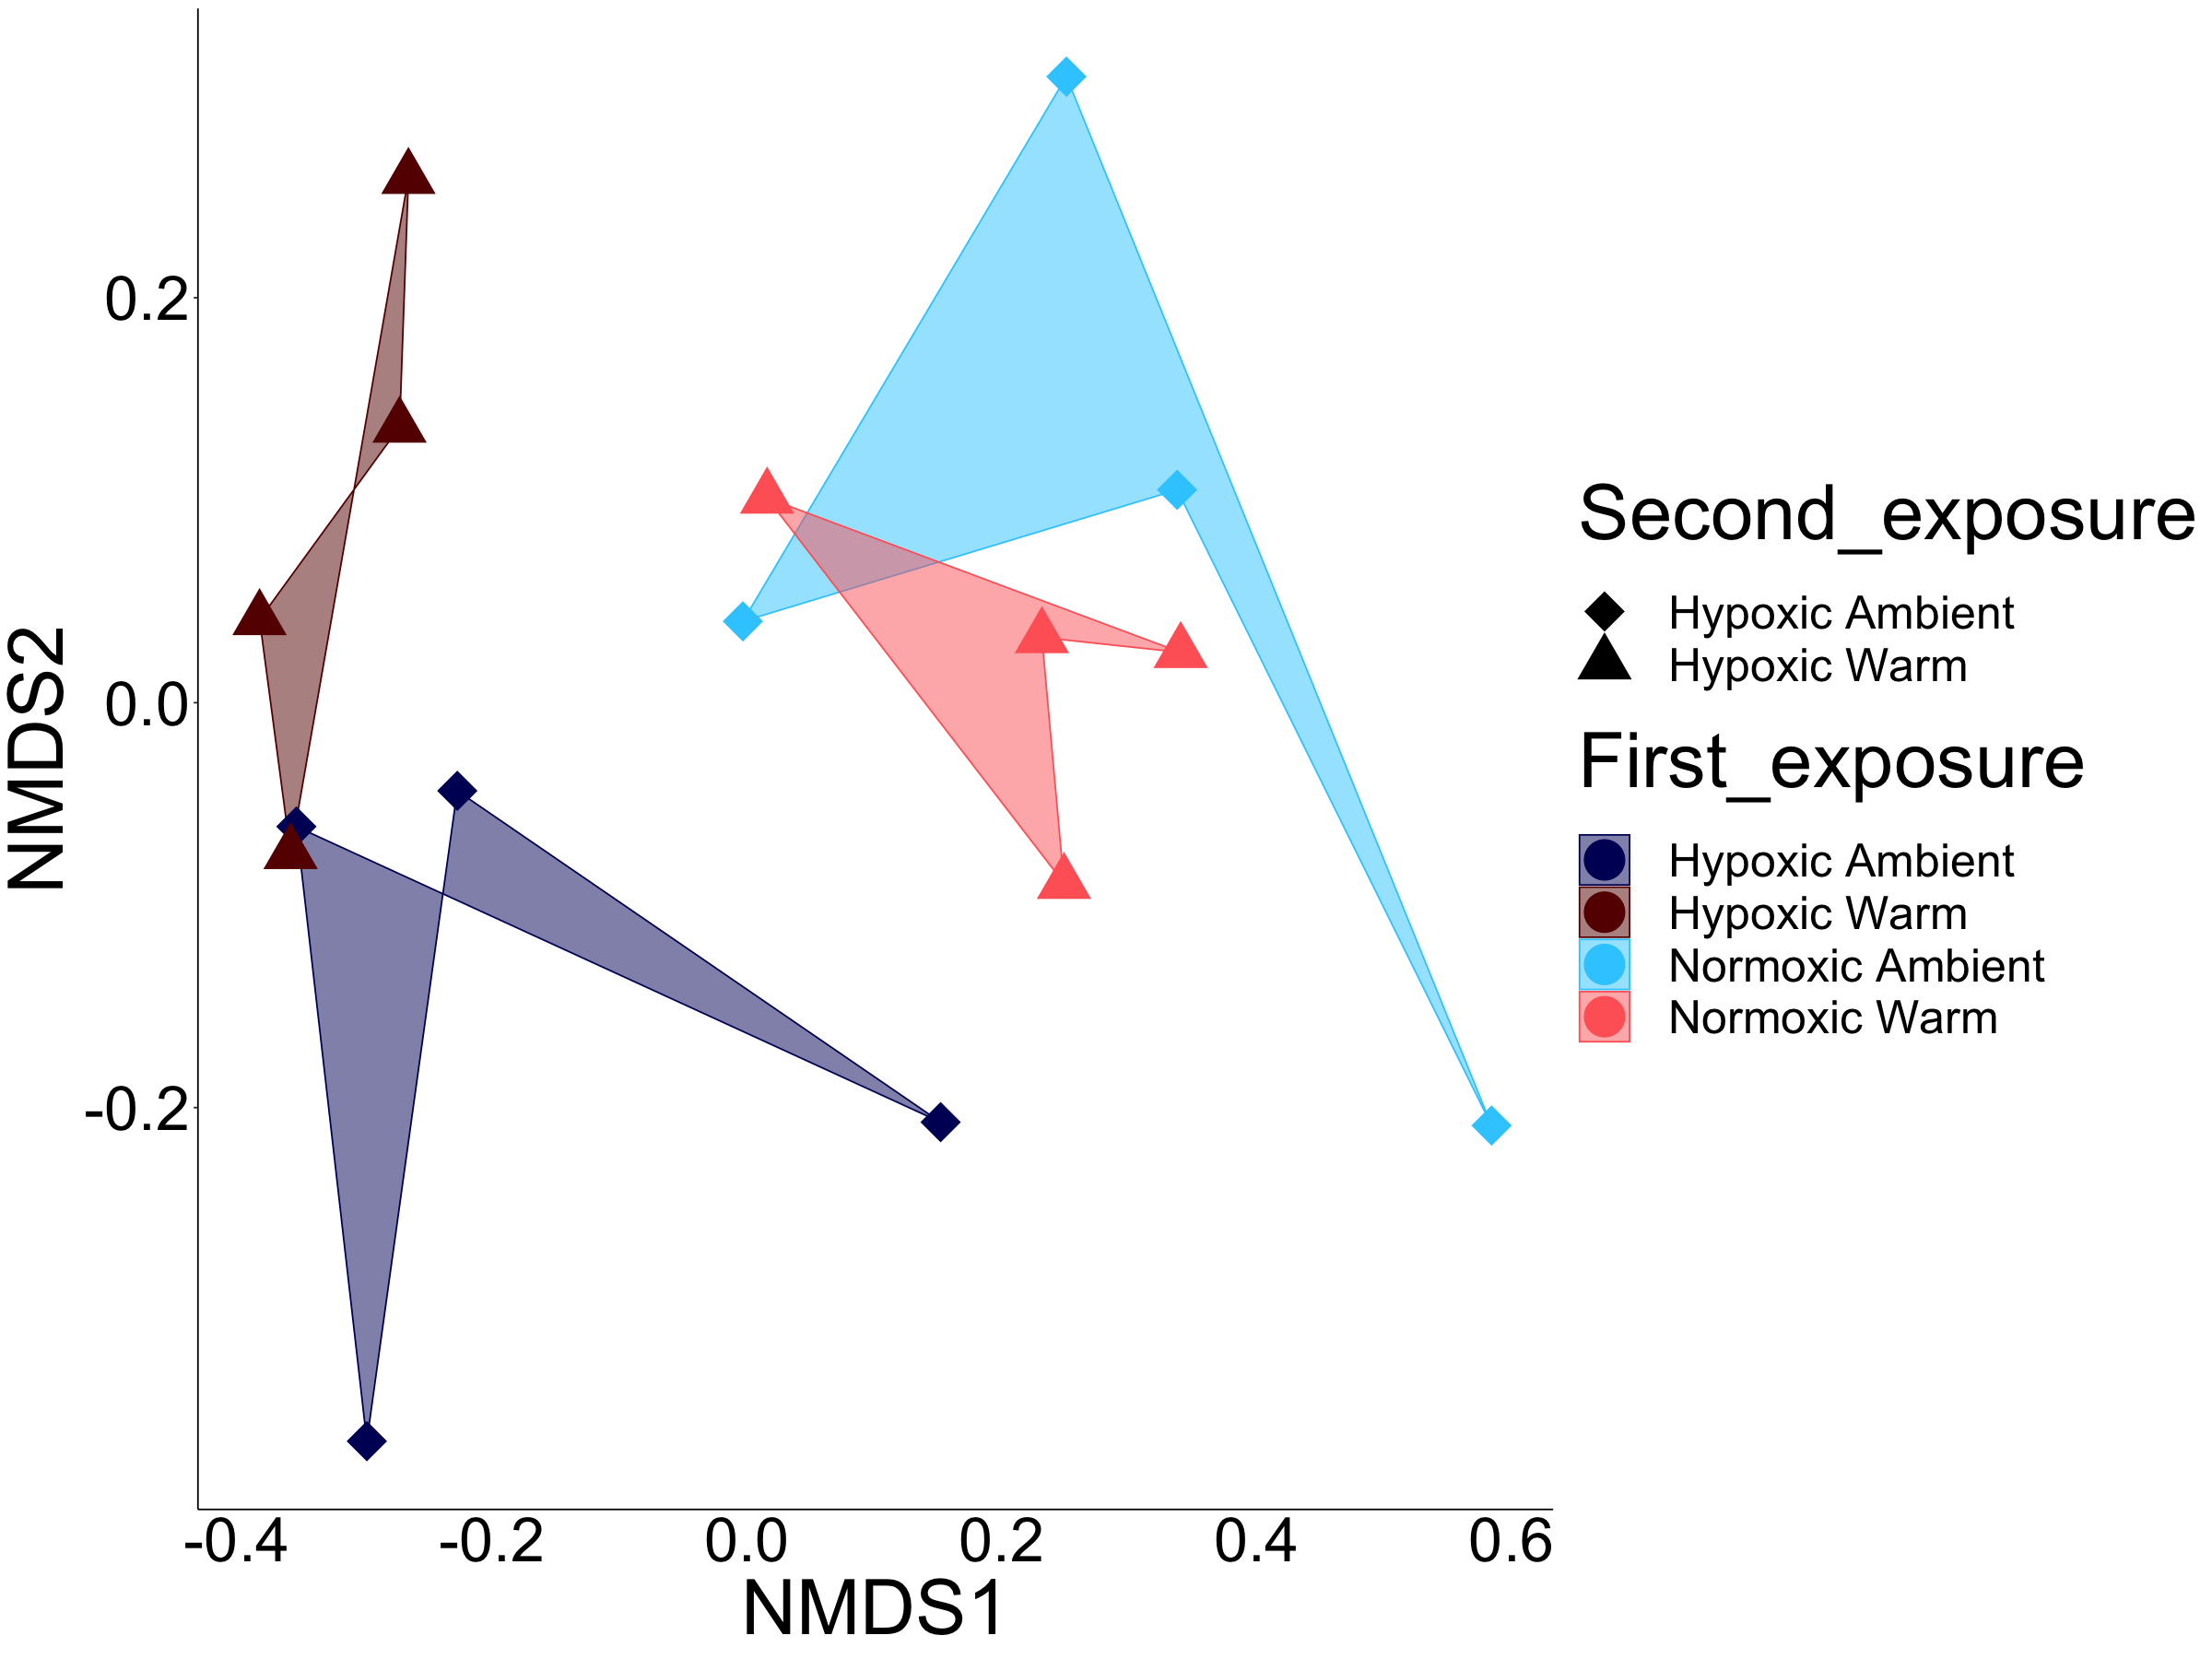

In [145]:
plot_ordination(CE, CE.ord, type="samples", color="First_exposure", shape="Second_exposure")+ 
geom_polygon(aes(fill=First_exposure), alpha=0.5)+ 
geom_point(size=12)+
theme_bw()+
scale_color_manual(values=c("#000066", "#660000", "#33CCFF","#FF6666" ))+
scale_fill_manual(values=c("#000066", "#660000", "#33CCFF","#FF6666"))+
scale_shape_manual(values=c(18, 17))+


 theme(legend.position="right", legend.text=element_text(size=30), panel.border = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=50))

WB=light blue
WP= light red
BB= dark blue
BP=dark red

WBBB=normoxic ambient, hypoxic ambient, 
WPBP=normoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient, 
BPBP=hypoxic warm, hypoxic warm 

In [65]:
ggsave(width=10, height=8, file="~/Documents/DE/DE_16S/CEnMDS.pdf")

BPBP=hypoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient

WBBB=normoxic ambient, hypoxic ambient
WPBP=normoxic warm, hypoxic warm


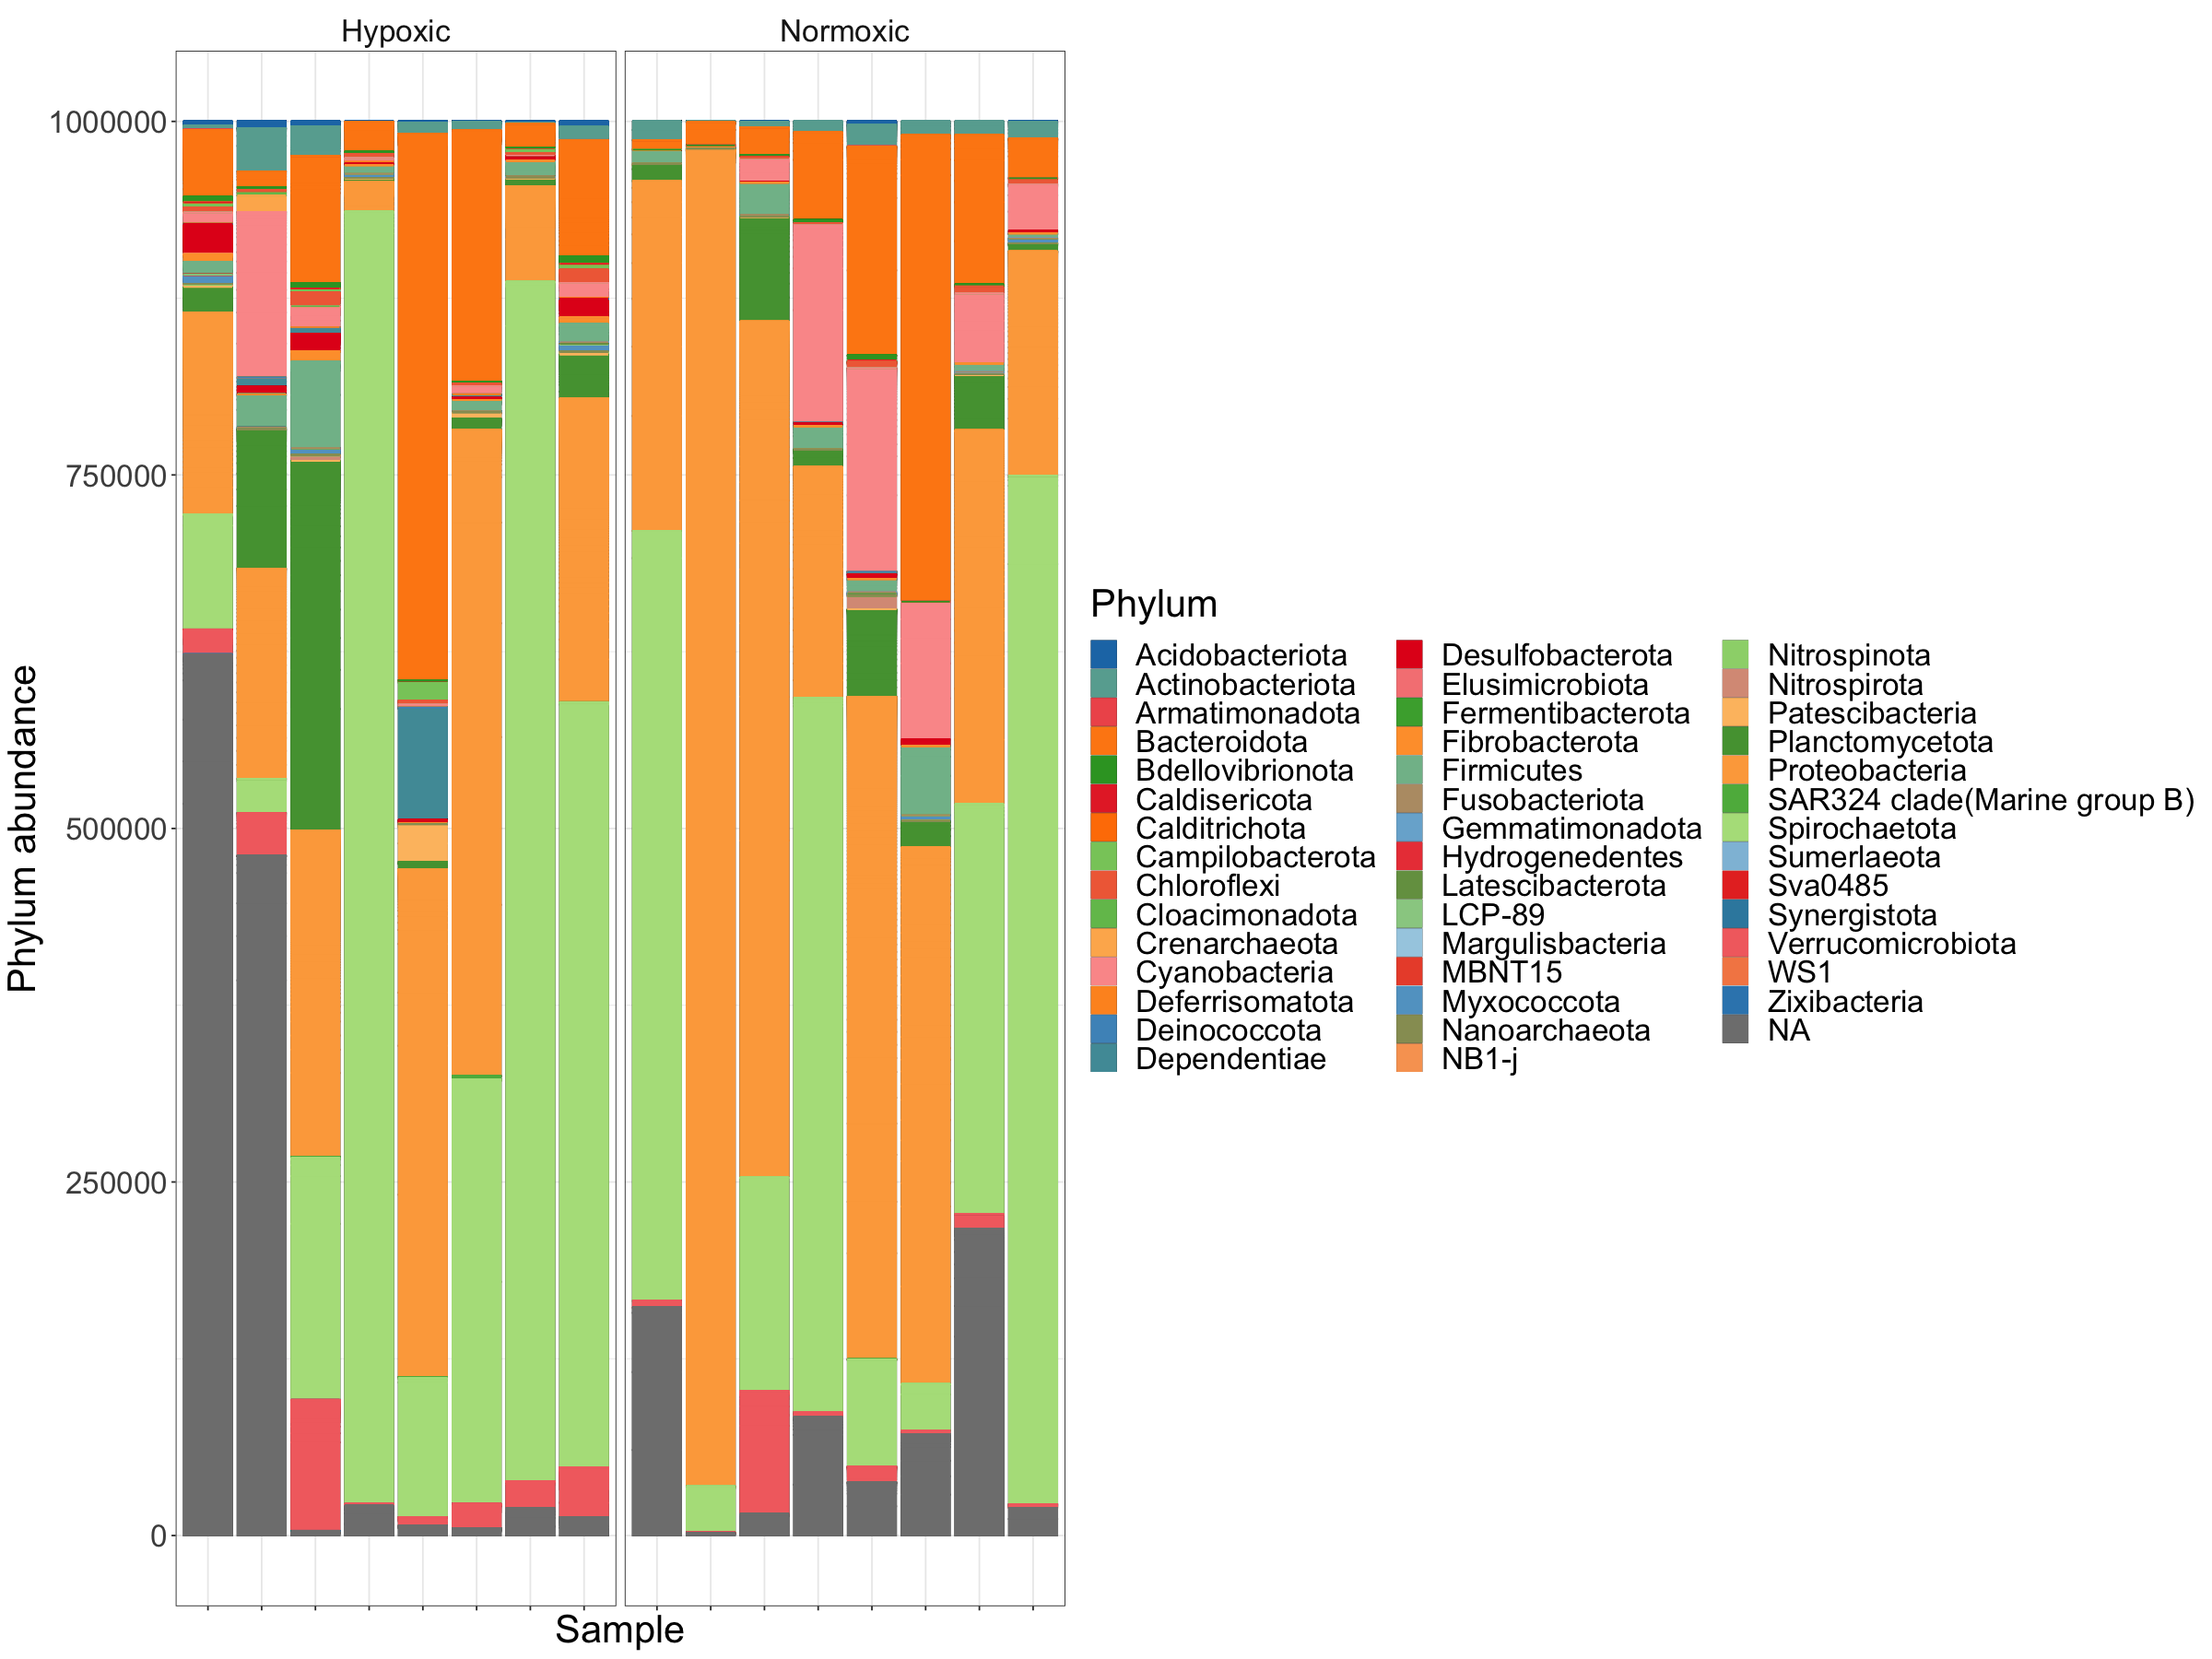

In [438]:
mycolors= colorRampPalette(brewer.pal(8, "Paired"))(43)
mycolors=sample(mycolors, 43)

plot_bar(CE, fill="Phylum")+
geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+
theme_bw()+
scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
facet_grid(.~Phase_1_DO, scales="free_x")+
 ylab("Phylum abundance")+
theme(legend.position = "right",  text = element_text(size=25), axis.text.x = element_blank(), strip.background = element_blank())


In [481]:
OTU = otu_table(t(asv_ce), taxa_are_rows = TRUE)
TAX = tax_table(taxa_ce)
Samp= sample_data(meta_ce_g)
CEraw=phyloseq(OTU, TAX, Samp)

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


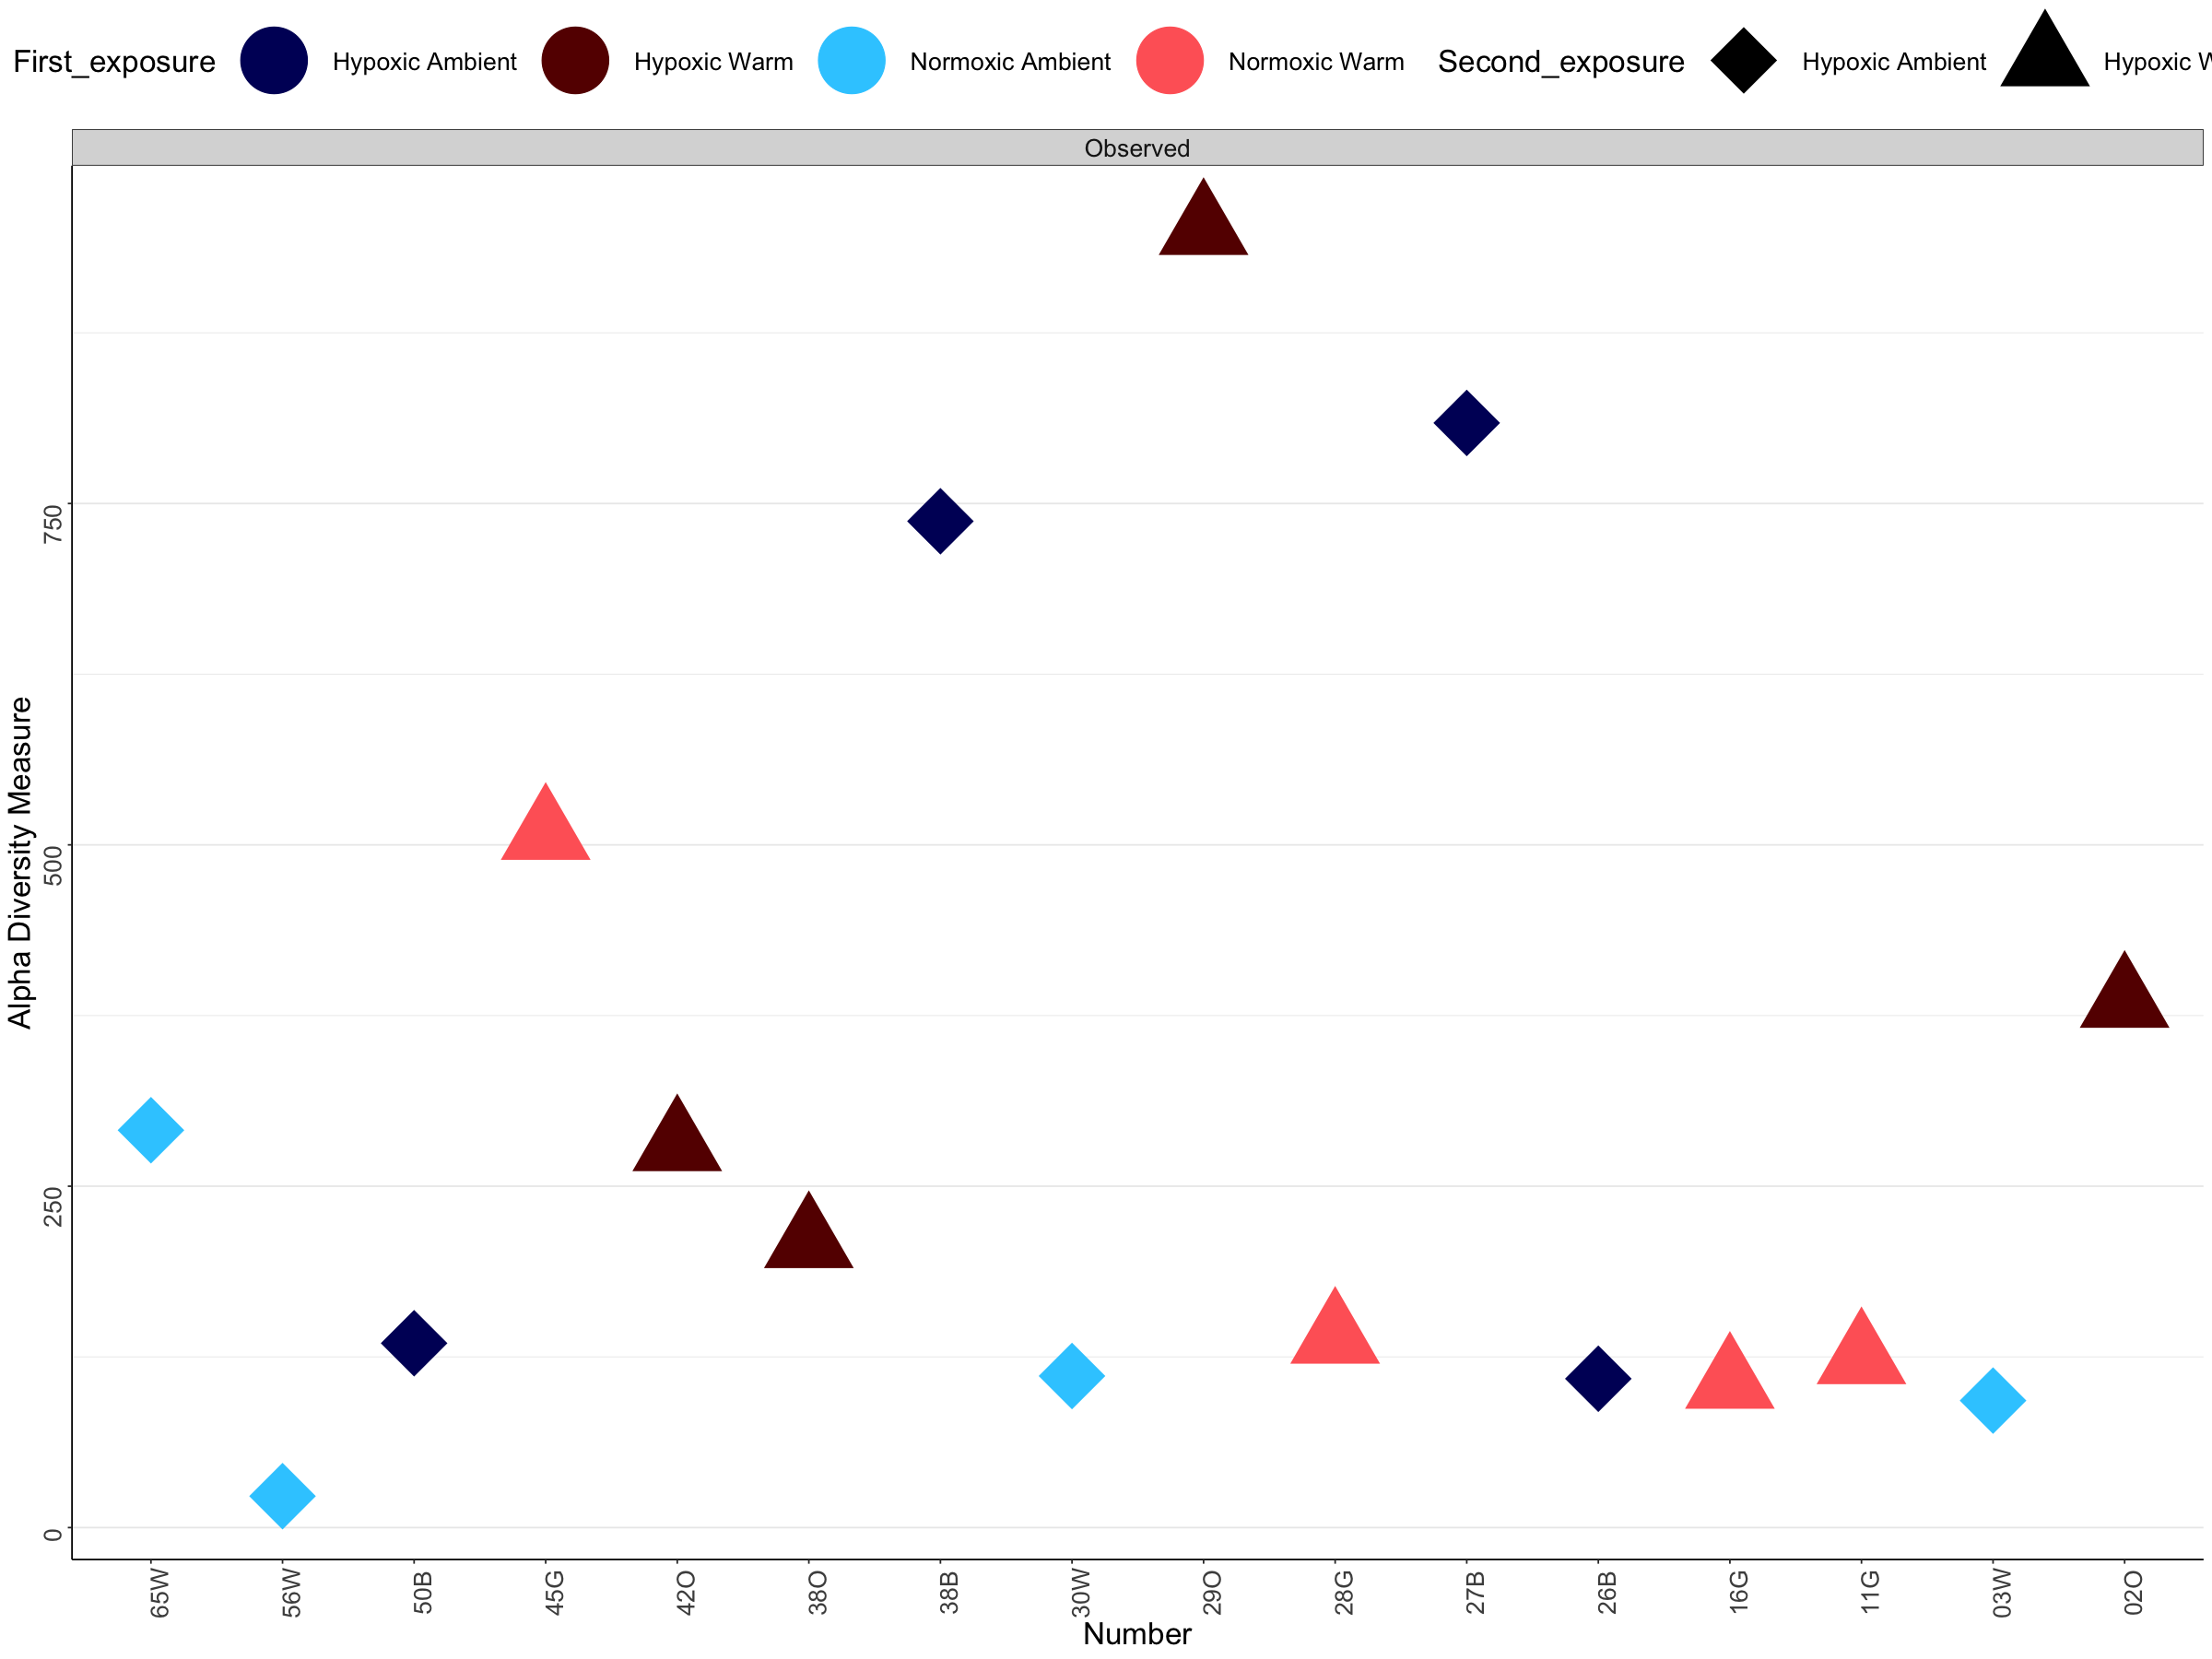

In [483]:
plot_richness(CEraw, color="First_exposure", shape="Second_exposure", x="Number", measures= "Observed")+
geom_point(size=20)+
#geom_vline(xintercept = 16)+
theme_bw()+
scale_x_discrete(limits = rev)+
scale_color_manual(values=c("#000066", "#660000", "#33CCFF","#FF6666" ))+
scale_shape_manual(values=c(18, 17))+
theme(legend.position="top", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

## effect of phase 1 DO and temp

In [408]:
#convert to DEseq
CEdds = phyloseq_to_deseq2(CE, ~ Phase_1_DO*Phase_1_temp)
#calculate arithmetic means because of zeros.
#arith_mean=function(row) if (all(row == 0)) 0 else exp(mean(log(row[row != 0])))
#arithmeans = apply(otu_table(CEdds), 1, arith_mean) 
#CEdds = estimateSizeFactors(CEdds, geoMeans=arithmeans, locfunc=shorth)
#run GLMs
CEdds = DESeq(CEdds, test="Wald", fitType="parametric")

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [409]:
resultsNames(CEdds)

[1] "Intercept"                           "Phase_1_DO_Normoxic_vs_Hypoxic"     
[3] "Phase_1_temp_Warm_vs_Ambient"        "Phase_1_DONormoxic.Phase_1_tempWarm"

## effect of phase one DO

In [410]:
## focusing on effect of DO since permanova indicates that it affects microbiome
res=results(CEdds, name="Phase_1_DO_Normoxic_vs_Hypoxic")

In [412]:
sig1_oxy = as.data.frame(res[which(res$padj < 0.05), ])


In [413]:
sig1_oxy = cbind(as(sig1_oxy, "data.frame"), as(tax_table(CE)[rownames(sig1_oxy), ], "matrix"))

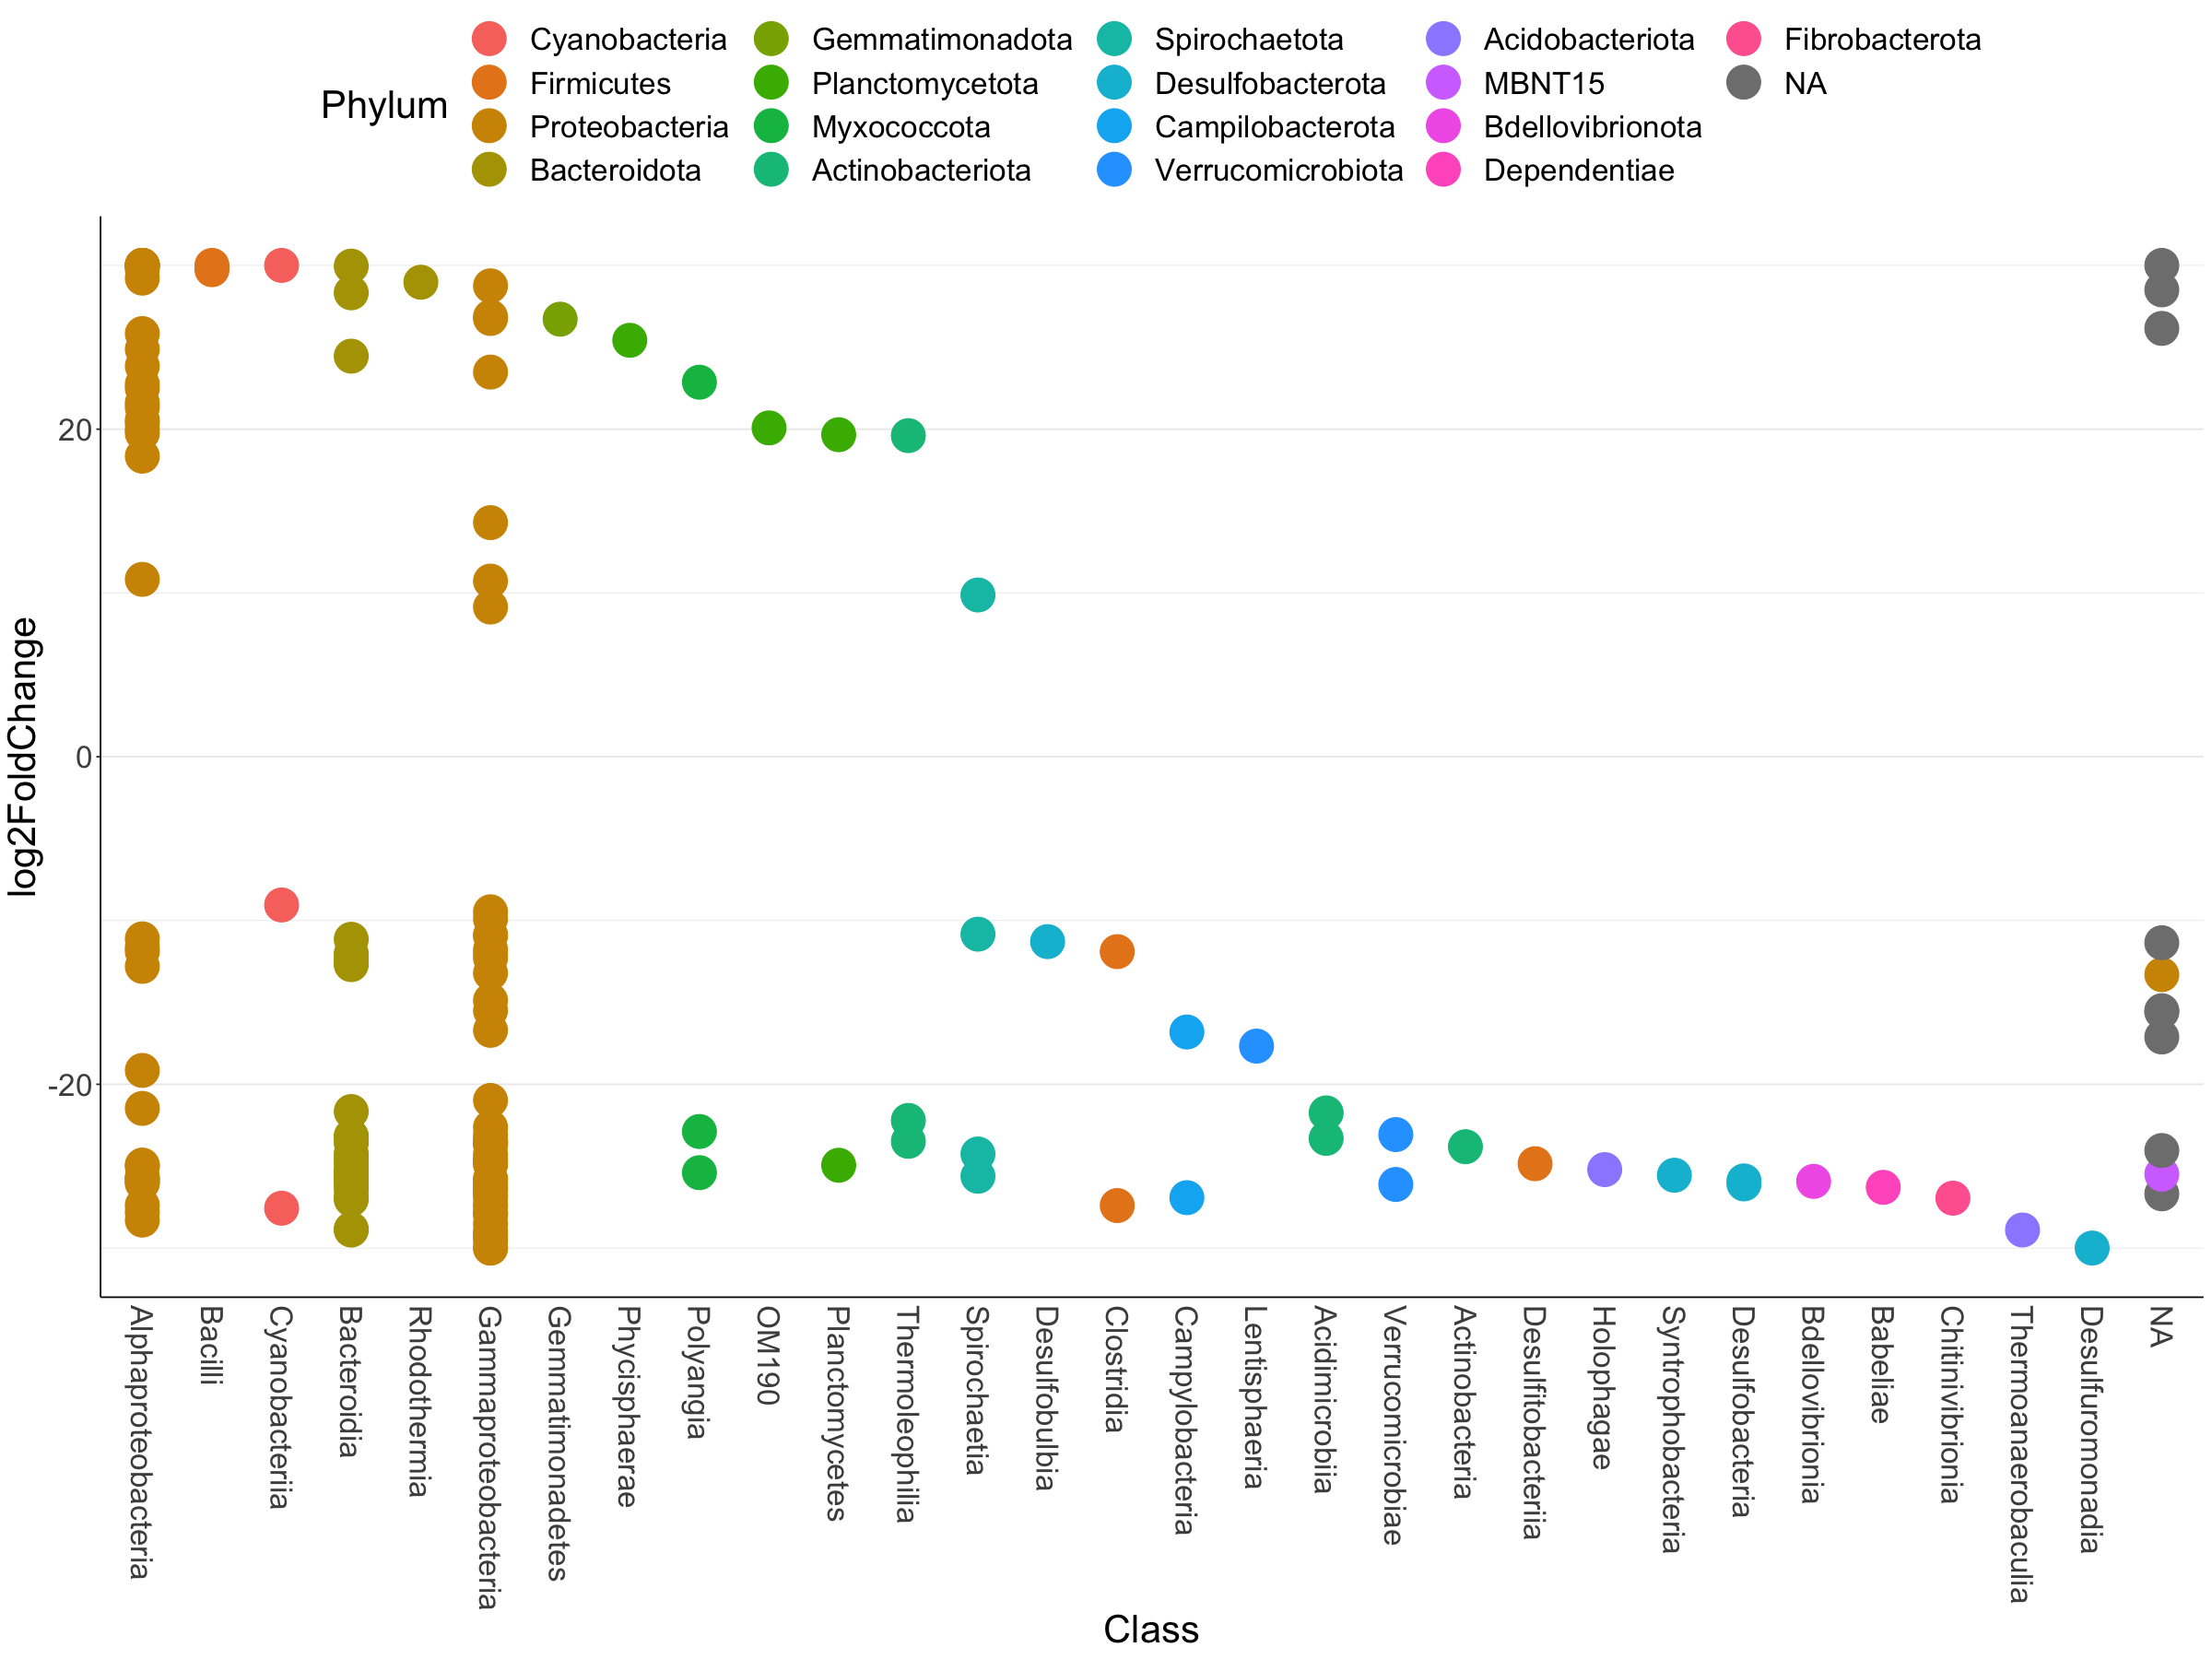

In [439]:
x = tapply(sig1_oxy$log2FoldChange, sig1_oxy$Phylum, function(x) max(x))
x = sort(x, TRUE)
sig1_oxy$Phylum = factor(as.character(sig1_oxy$Phylum), levels= names(x))

#Class = Variable 2
x = tapply(sig1_oxy$log2FoldChange, sig1_oxy$Class, function(x) max(x))
x = sort(x, TRUE)
sig1_oxy$Class = factor(as.character(sig1_oxy$Class), levels= names(x))
           
           ggplot(sig1_oxy, aes(x=Class, y=log2FoldChange, color=Phylum))+
  geom_point(size=10)+ 
theme_bw()+
theme(legend.position="top",legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=25), axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))


negative= more abundant in hypoxia

In [157]:
CE_oxy=prune_taxa(rownames(sig1_oxy), CE)

In [455]:
names=meta_ce$UniqueID

Warning message:
“Transformation introduced infinite values in discrete y-axis”


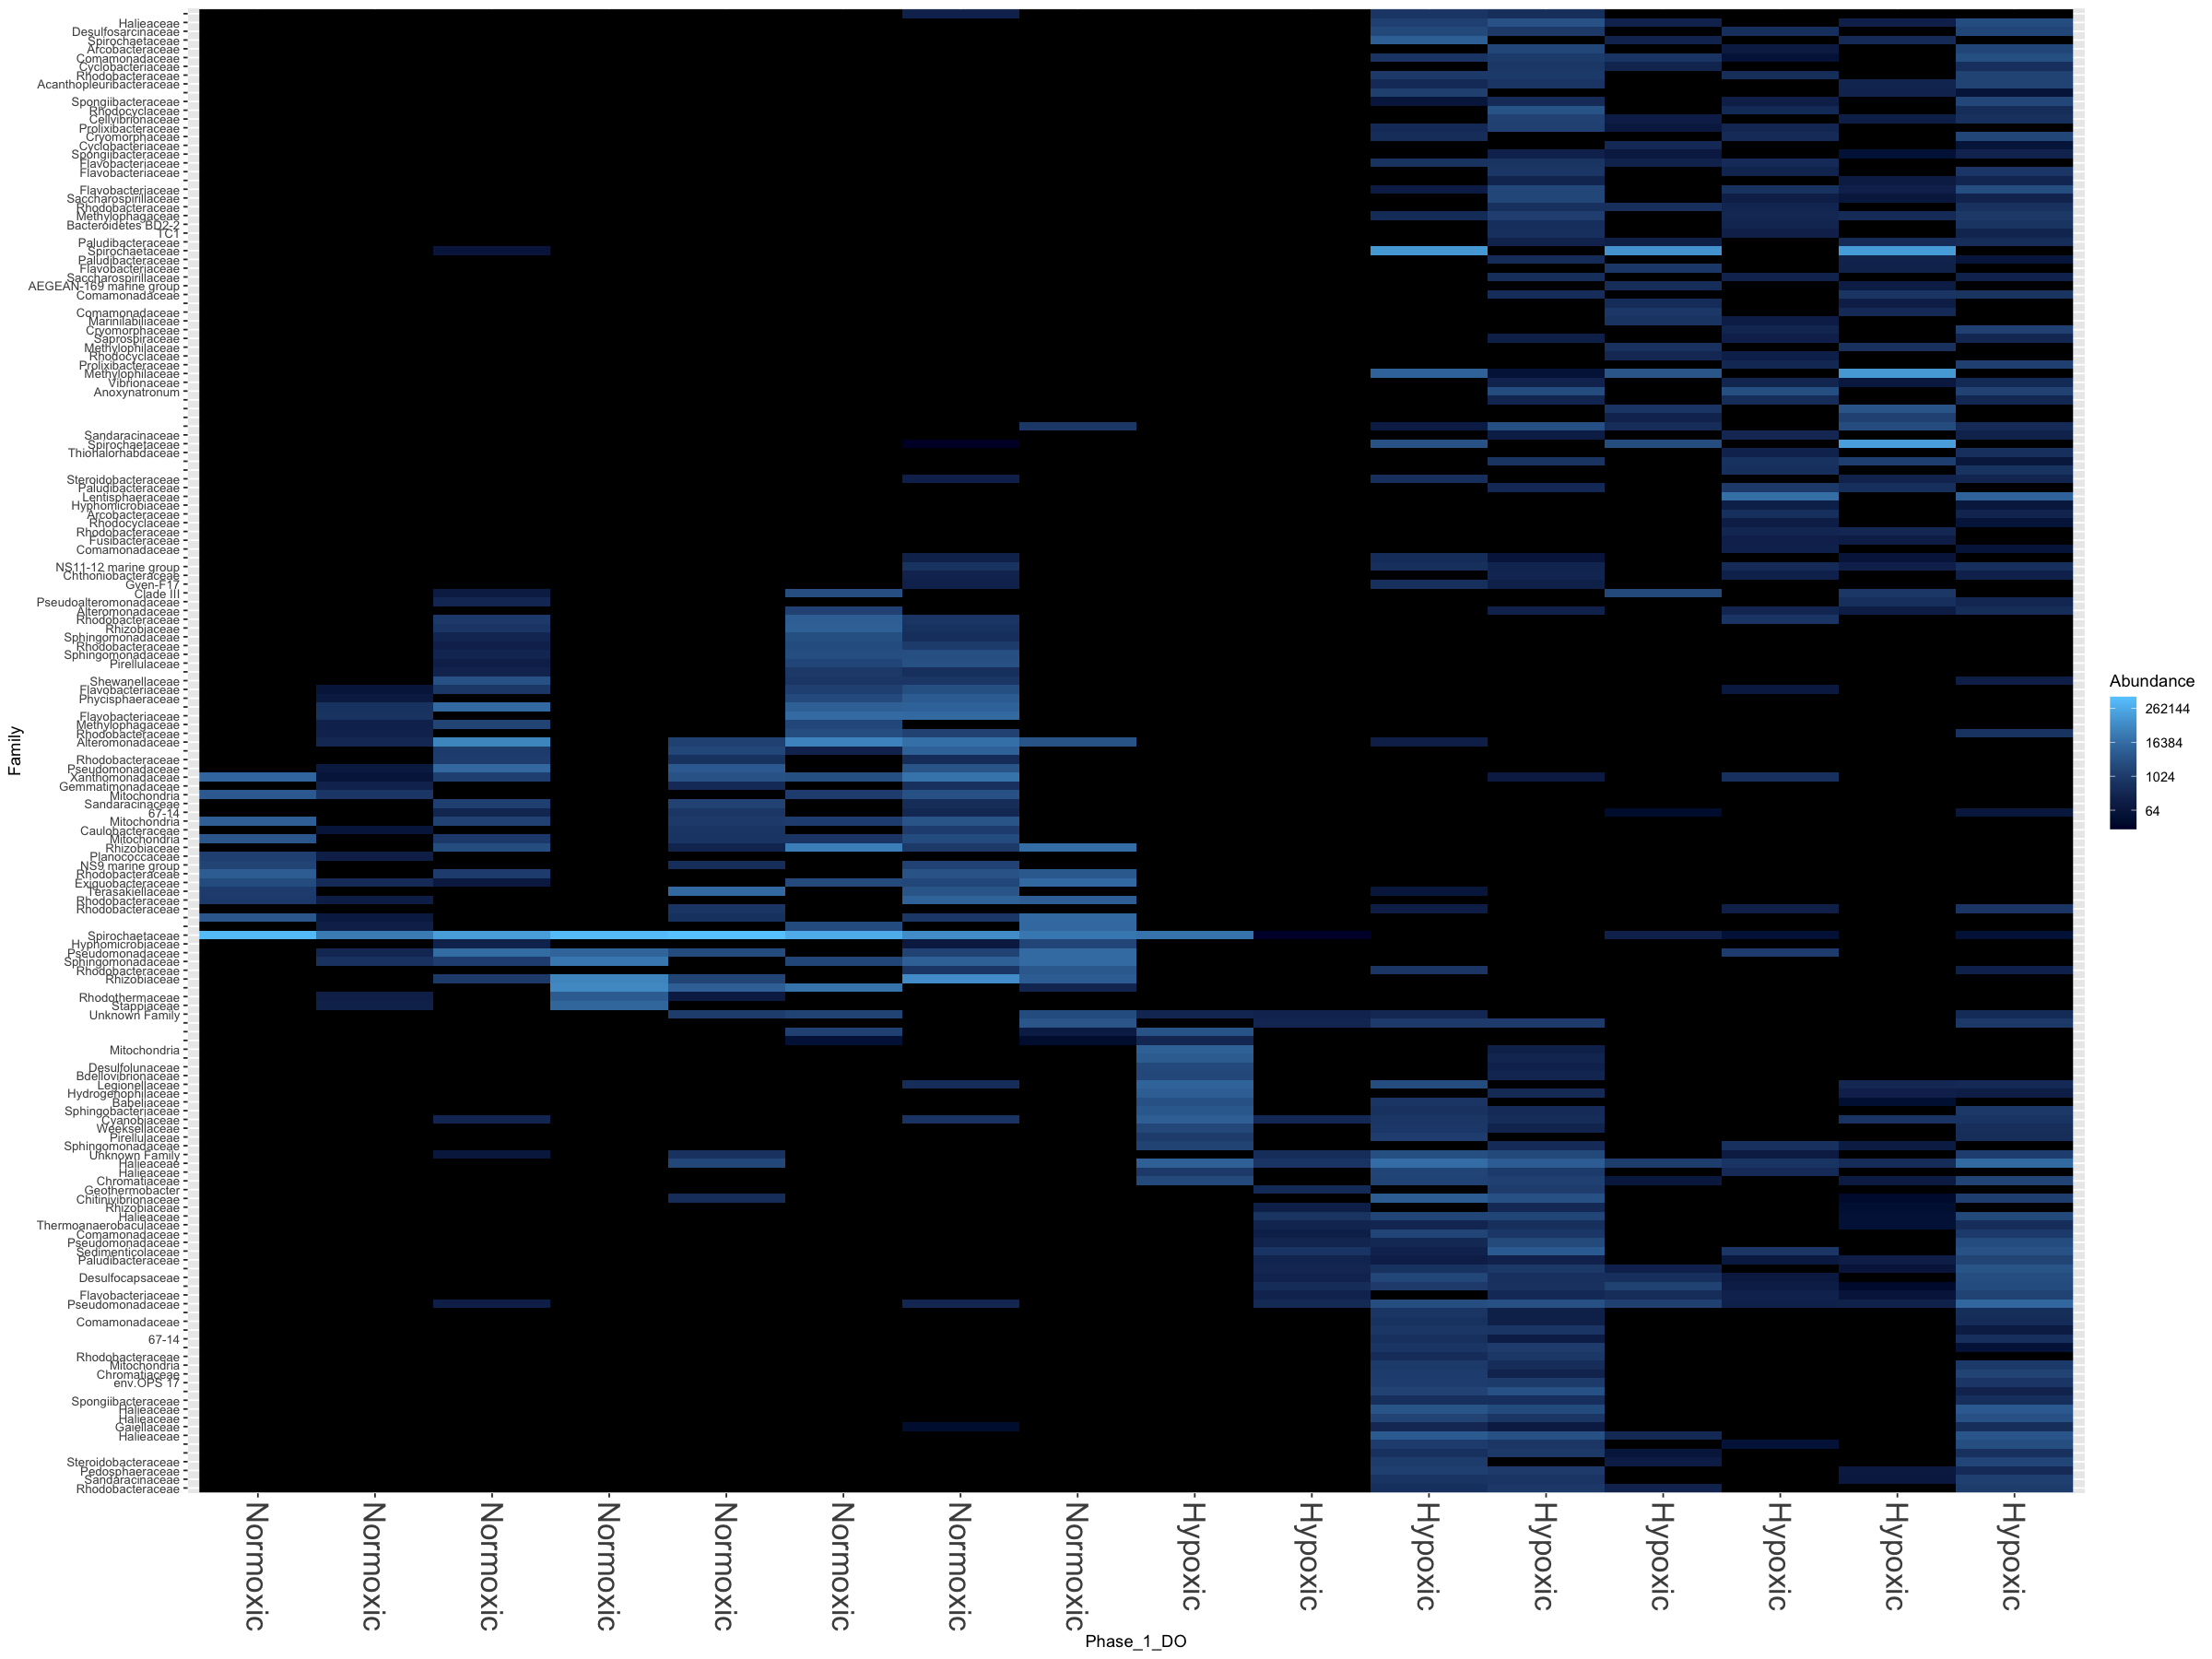

In [456]:
plot_heatmap(CE_oxy, "NMDS", "bray", "Phase_1_DO", "Family", sample.order=names)+
theme(legend.position = "right", axis.text.y = element_text(size=8), axis.text.x = element_text(size=20))


reorder by taxa

In [ ]:
oxytax=as.data.frame(tax_table(CE_oxy))
oxytax=oxytax[order(oxytax$Family),]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


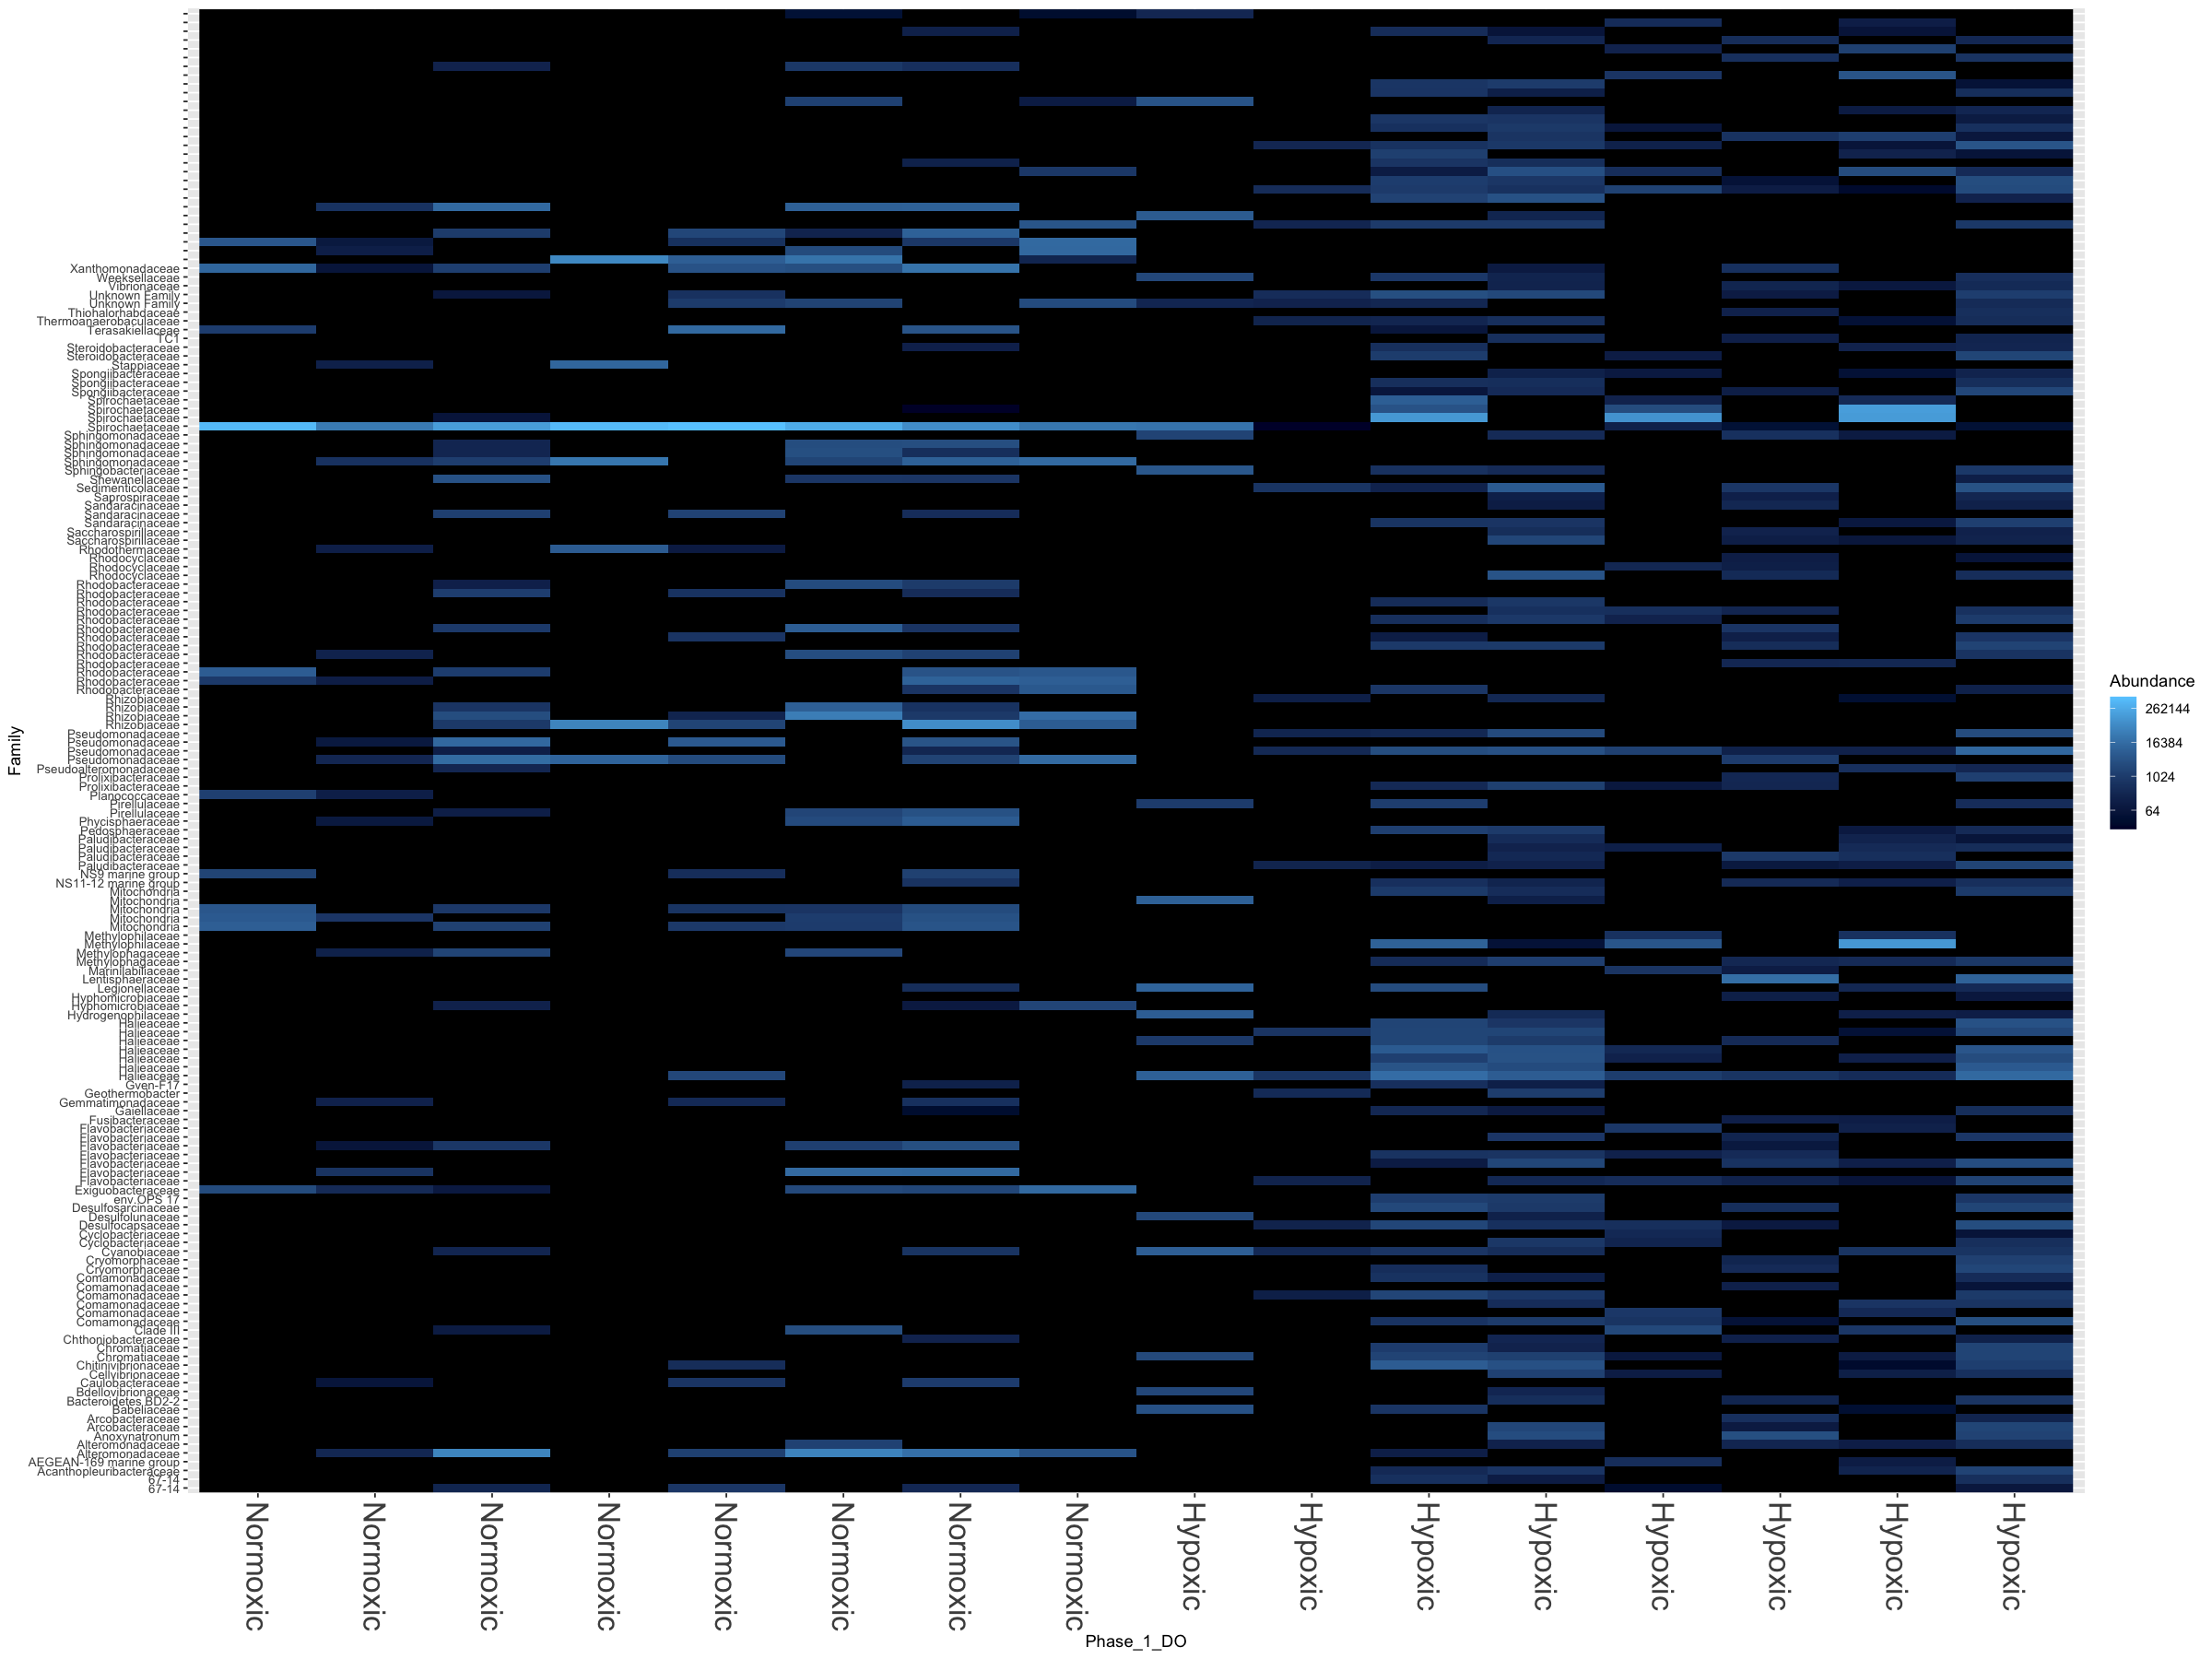

In [265]:
plot_heatmap(CE_oxy, "NMDS", "bray", "Phase_1_DO", "Family", sample.order=names, taxa.order=rownames(oxytax))+
theme(legend.position = "right", axis.text.y = element_text(size=8), axis.text.x = element_text(size=20))


In [441]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(17)
mycolors=sample(mycolors, 17)

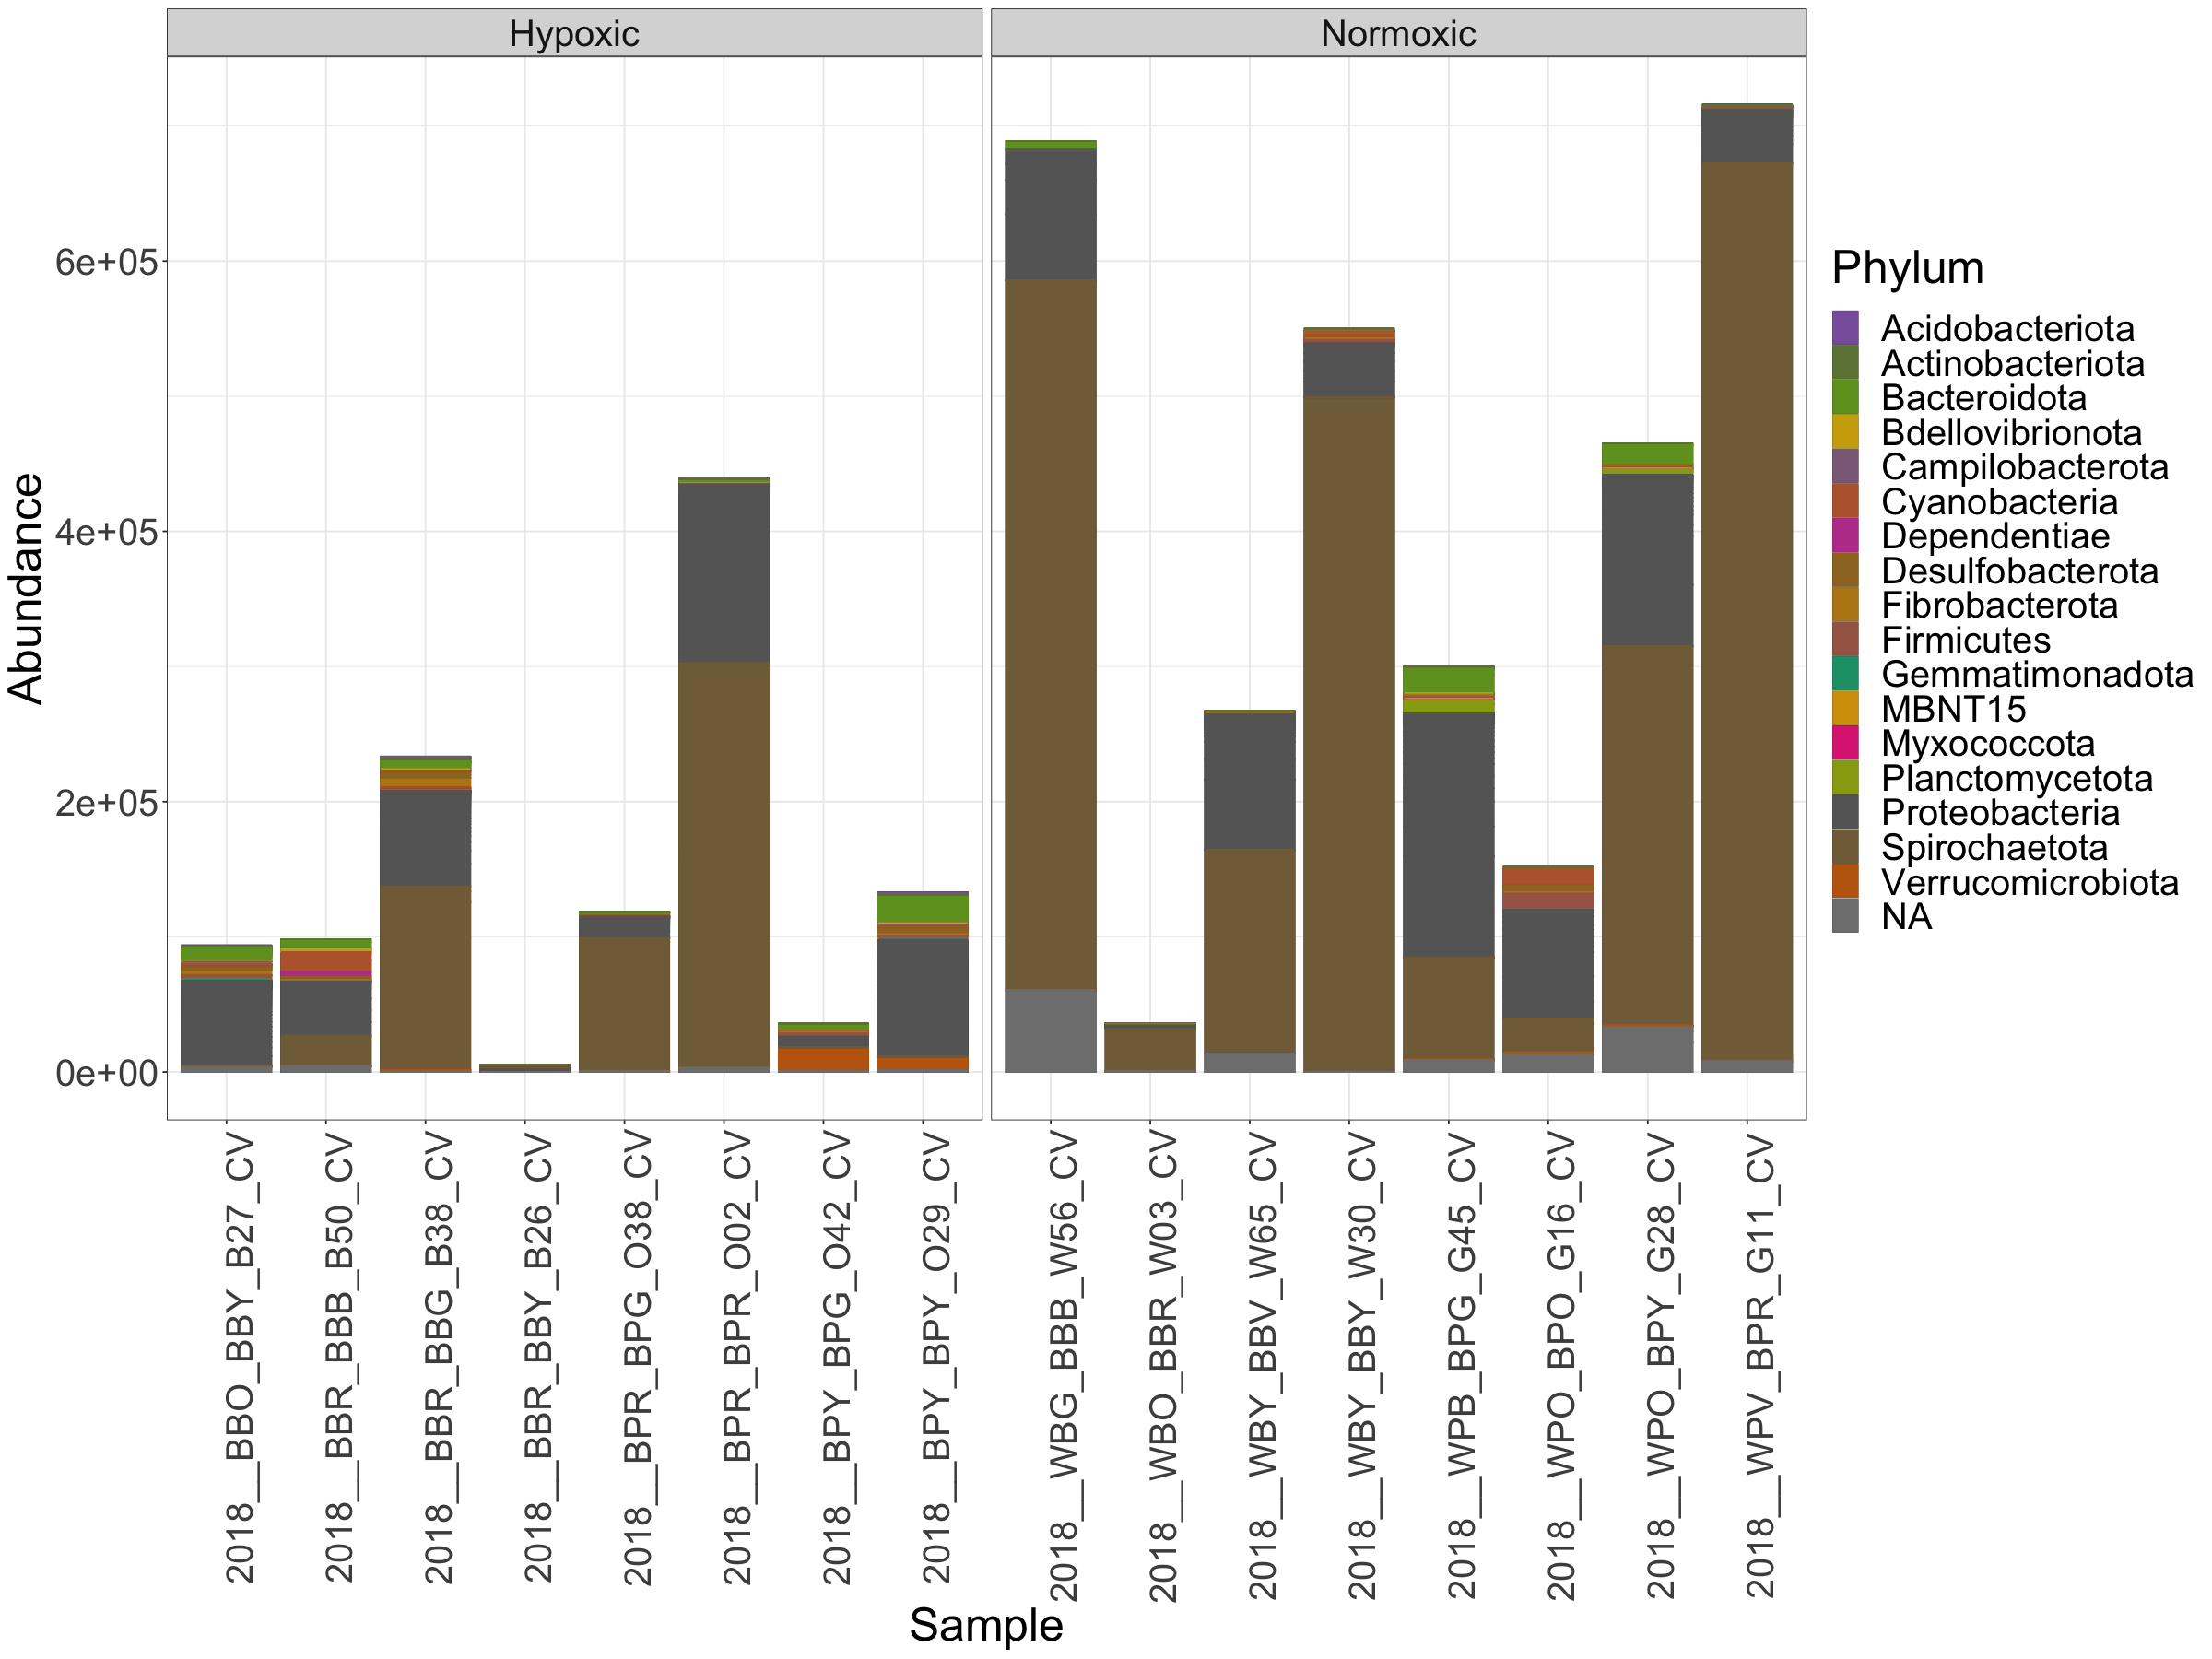

In [442]:
plot_bar(CE_oxy, fill="Phylum")+
geom_bar(aes(color=Phylum), stat="identity", position="stack")+

scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
facet_grid(.~Phase_1_DO, scales="free_x")+
theme(legend.position = "right", text = element_text(size=30), axis.text.x = element_text(angle=90))

## spirochetes

In [489]:
CE_Spiro = subset_taxa(CE, Phylum=="Spirochaetota")
CE_Spirof = filter_taxa(CE_Spiro, function(x) mean(x) > 500, TRUE)

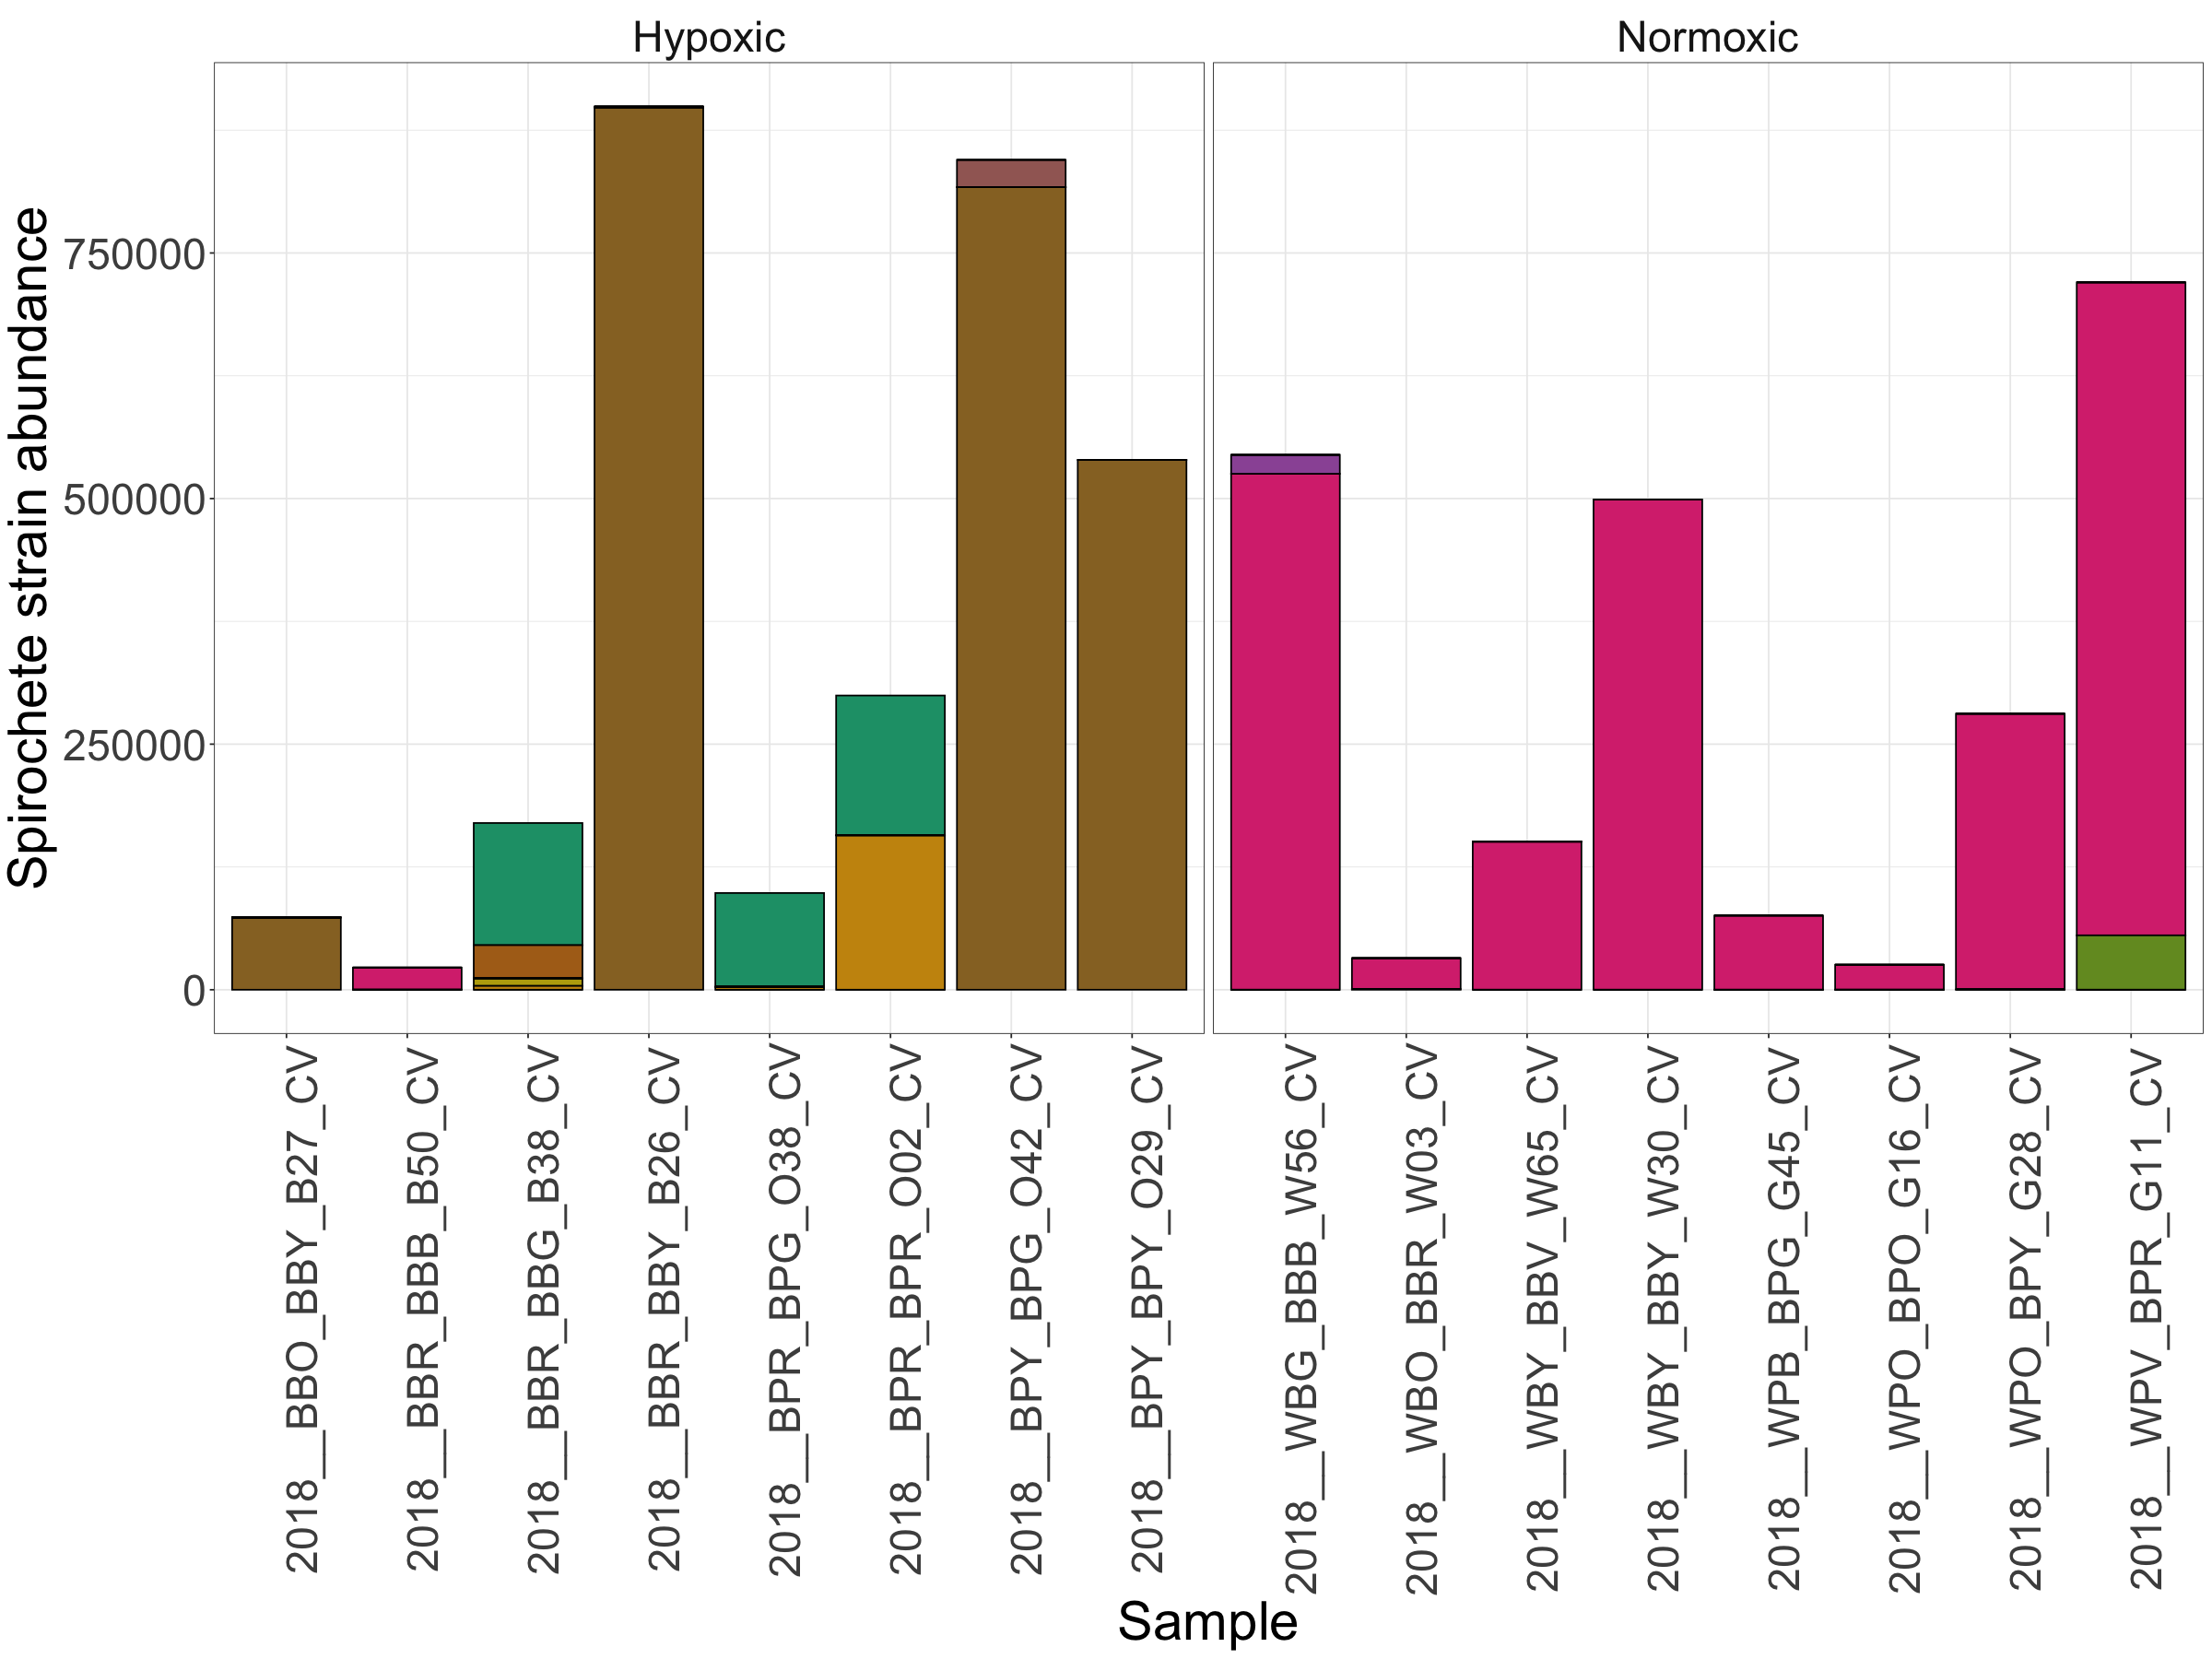

In [491]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(10)
plot_bar(CE_Spirof, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme_bw()+
facet_grid(.~Phase_1_DO, scales="free_x")+
 ylab("Spirochete strain abundance")+
theme(legend.position = "none",  text = element_text(size=35), axis.text.x = element_text(angle=90), strip.background = element_blank())



Warning message:
“Transformation introduced infinite values in discrete y-axis”


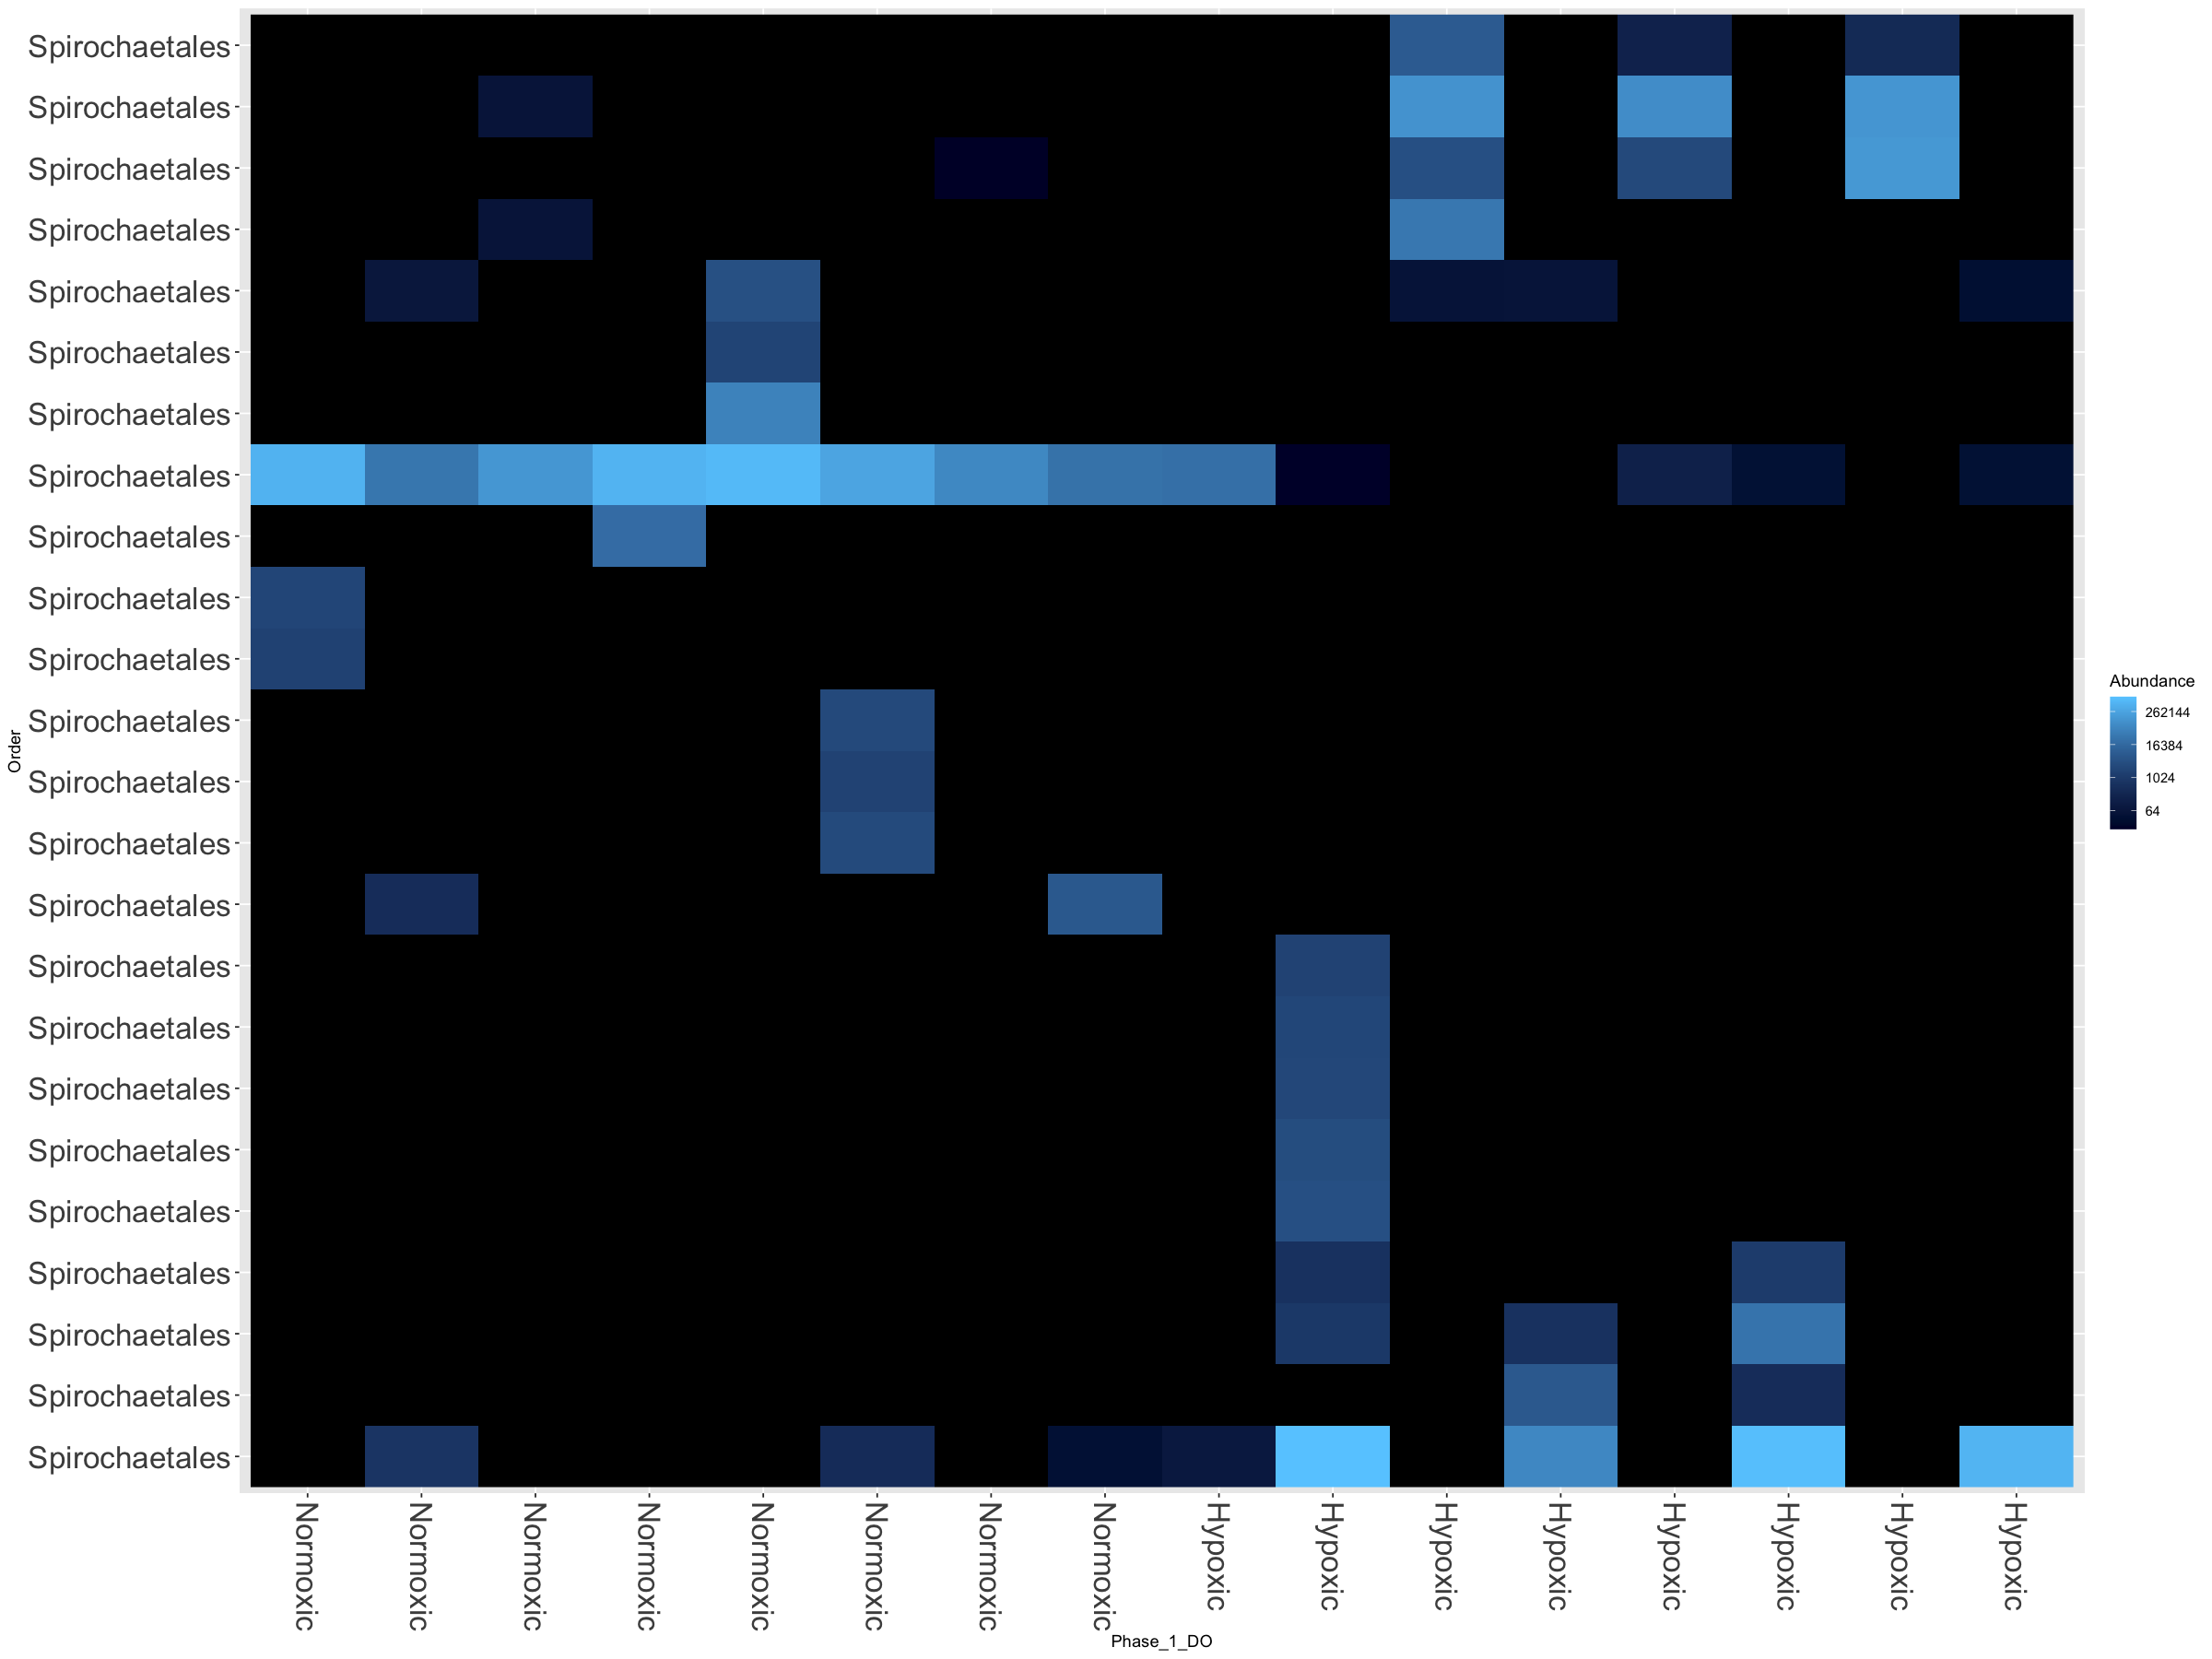

In [485]:
plot_heatmap(CE_Spirof, "NMDS", "bray", "Phase_1_DO", "Order", sample.order=names)+
theme(legend.position = "right", axis.text.y = element_text(size=20), axis.text.x = element_text(size=20))


## effect of phase one temp

In [469]:
res=results(CEdds, name="Phase_1_temp_Warm_vs_Ambient")

In [470]:
sig1_temp = as.data.frame(res[which(res$padj < 0.05), ])

In [472]:
sig1_temp = cbind(as(sig1_temp, "data.frame"), as(tax_table(CE)[rownames(sig1_temp), ], "matrix"))

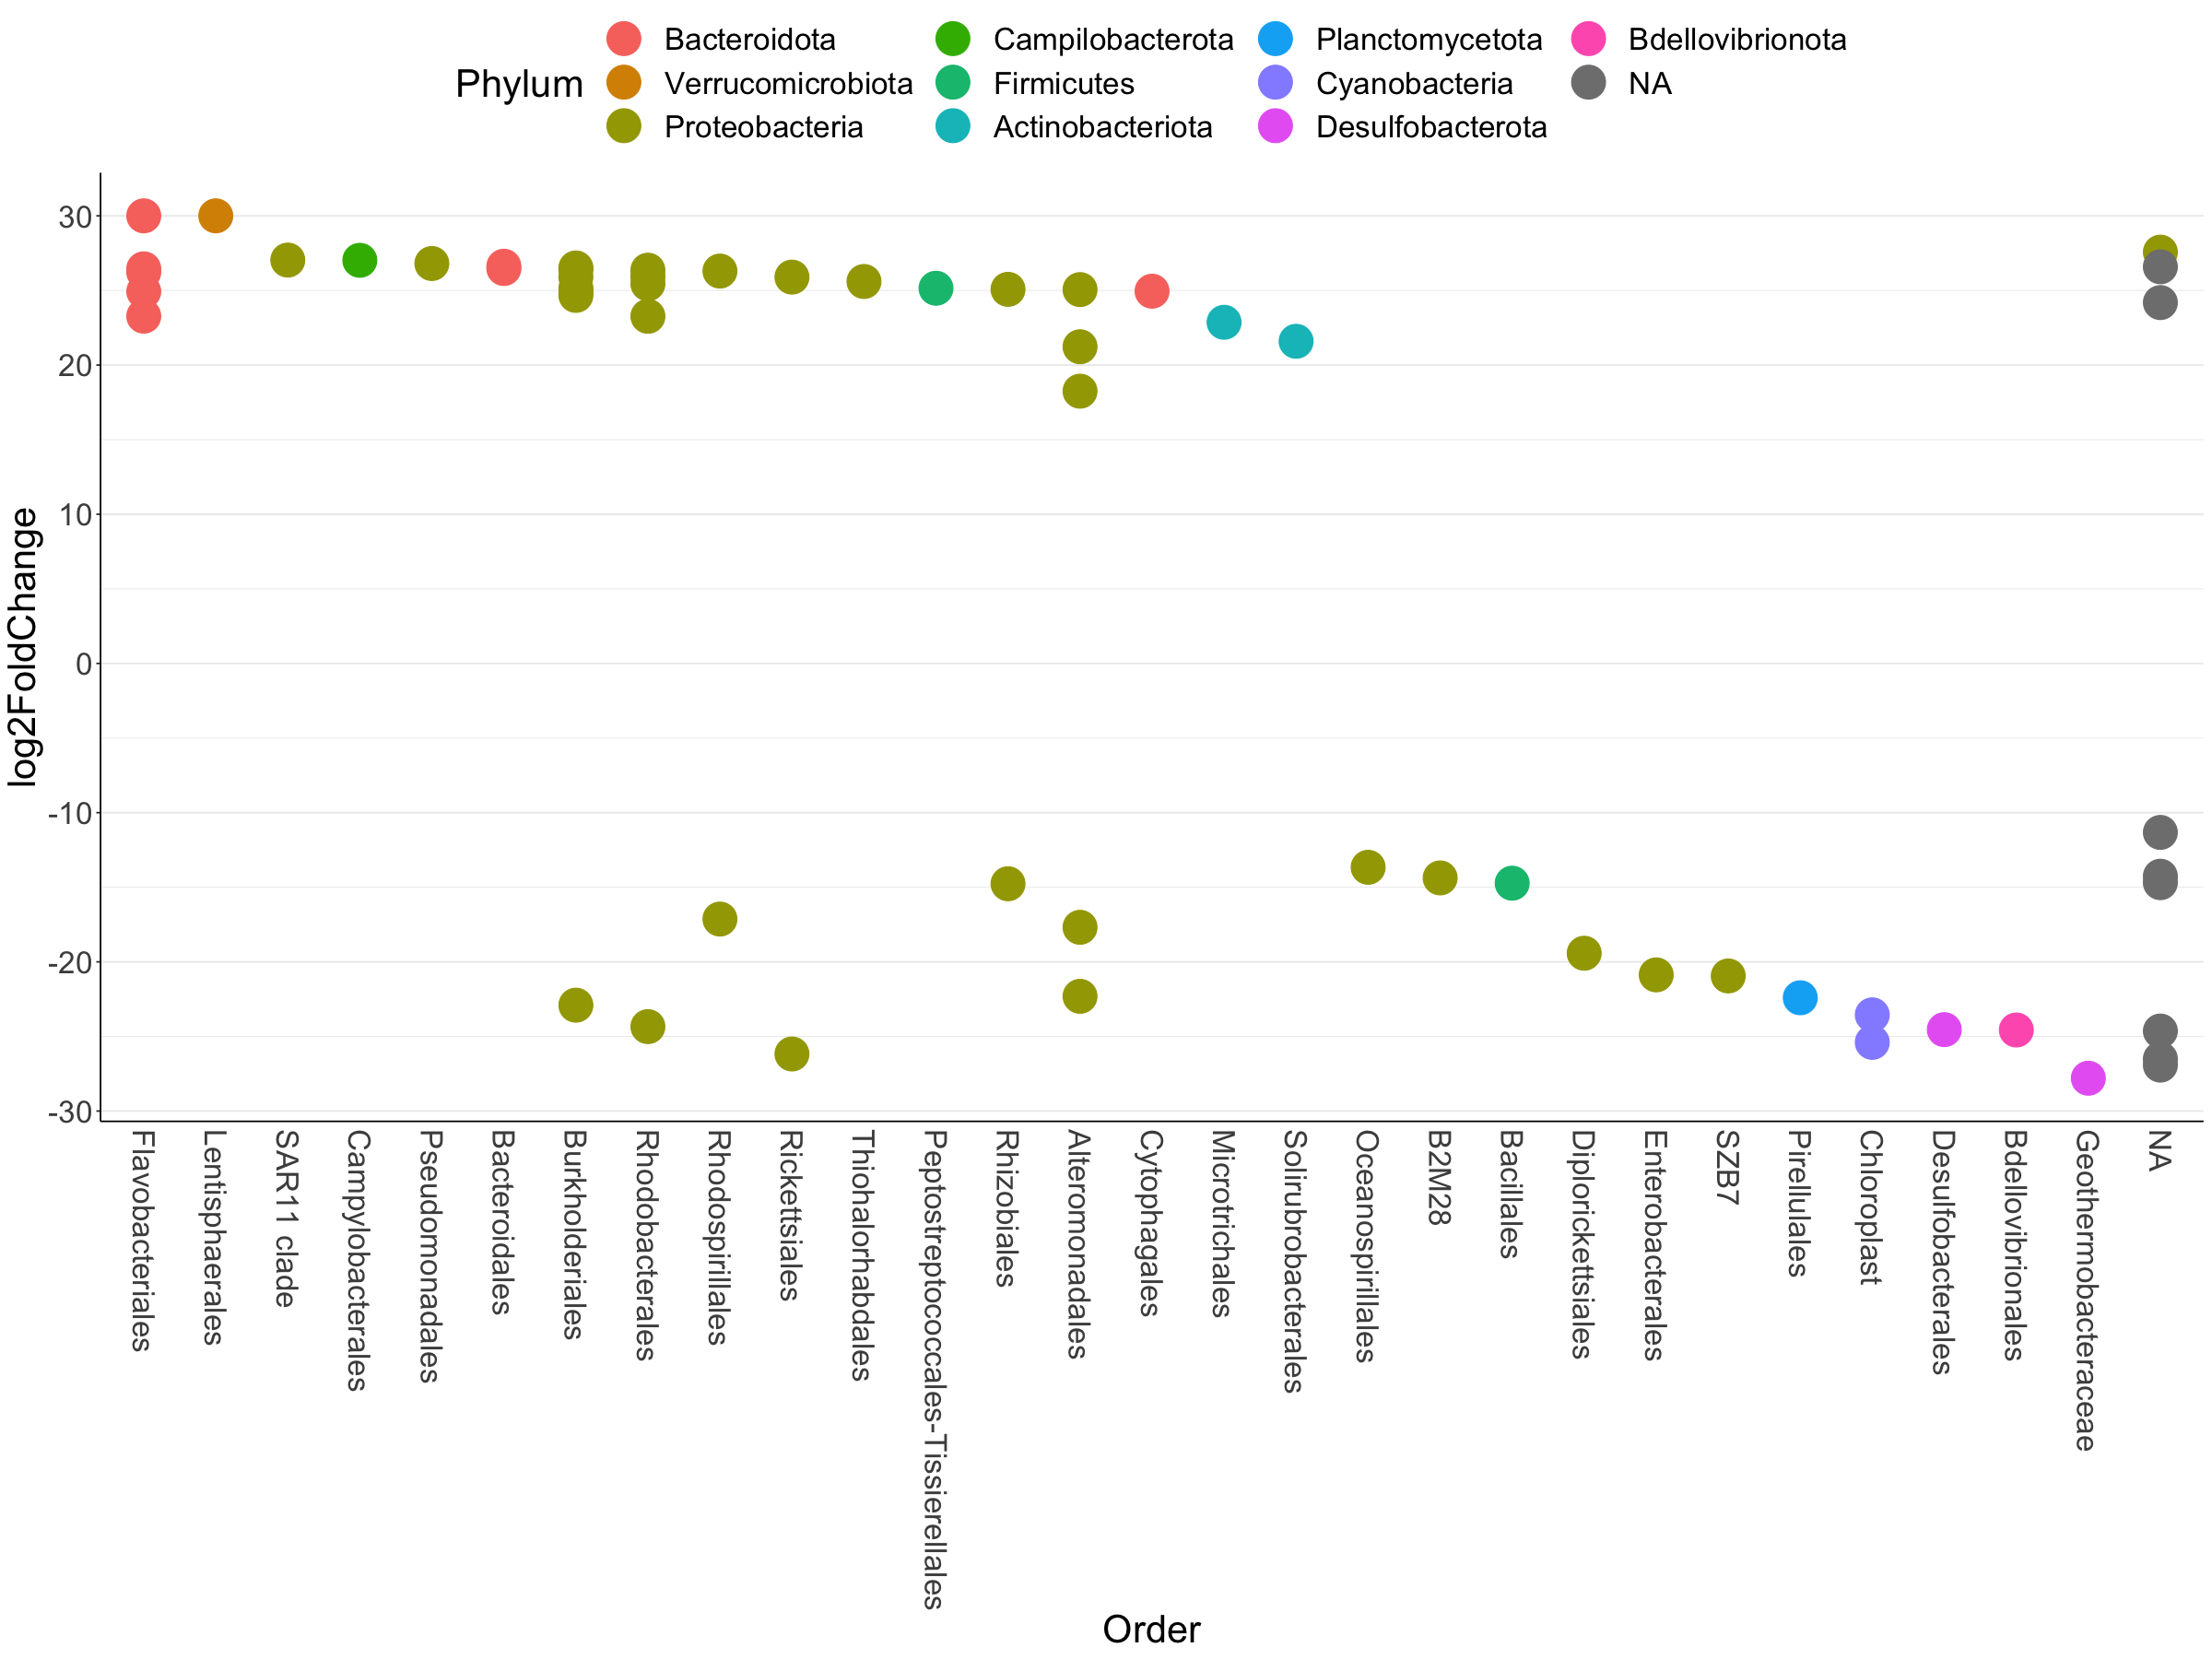

In [478]:
x = tapply(sig1_temp$log2FoldChange, sig1_temp$Phylum, function(x) max(x))
x = sort(x, TRUE)
sig1_temp$Phylum = factor(as.character(sig1_temp$Phylum), levels= names(x))

#Class = Variable 2
x = tapply(sig1_temp$log2FoldChange, sig1_temp$Order, function(x) max(x))
x = sort(x, TRUE)
sig1_temp$Order = factor(as.character(sig1_temp$Order), levels= names(x))
           
           ggplot(sig1_temp, aes(x=Order, y=log2FoldChange, color=Phylum))+
  geom_point(size=10)+ 
theme_bw()+
theme(legend.position="top",legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=25), axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))


In [492]:
CE_temp=prune_taxa(rownames(sig1_temp), CE)

In [494]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(28)

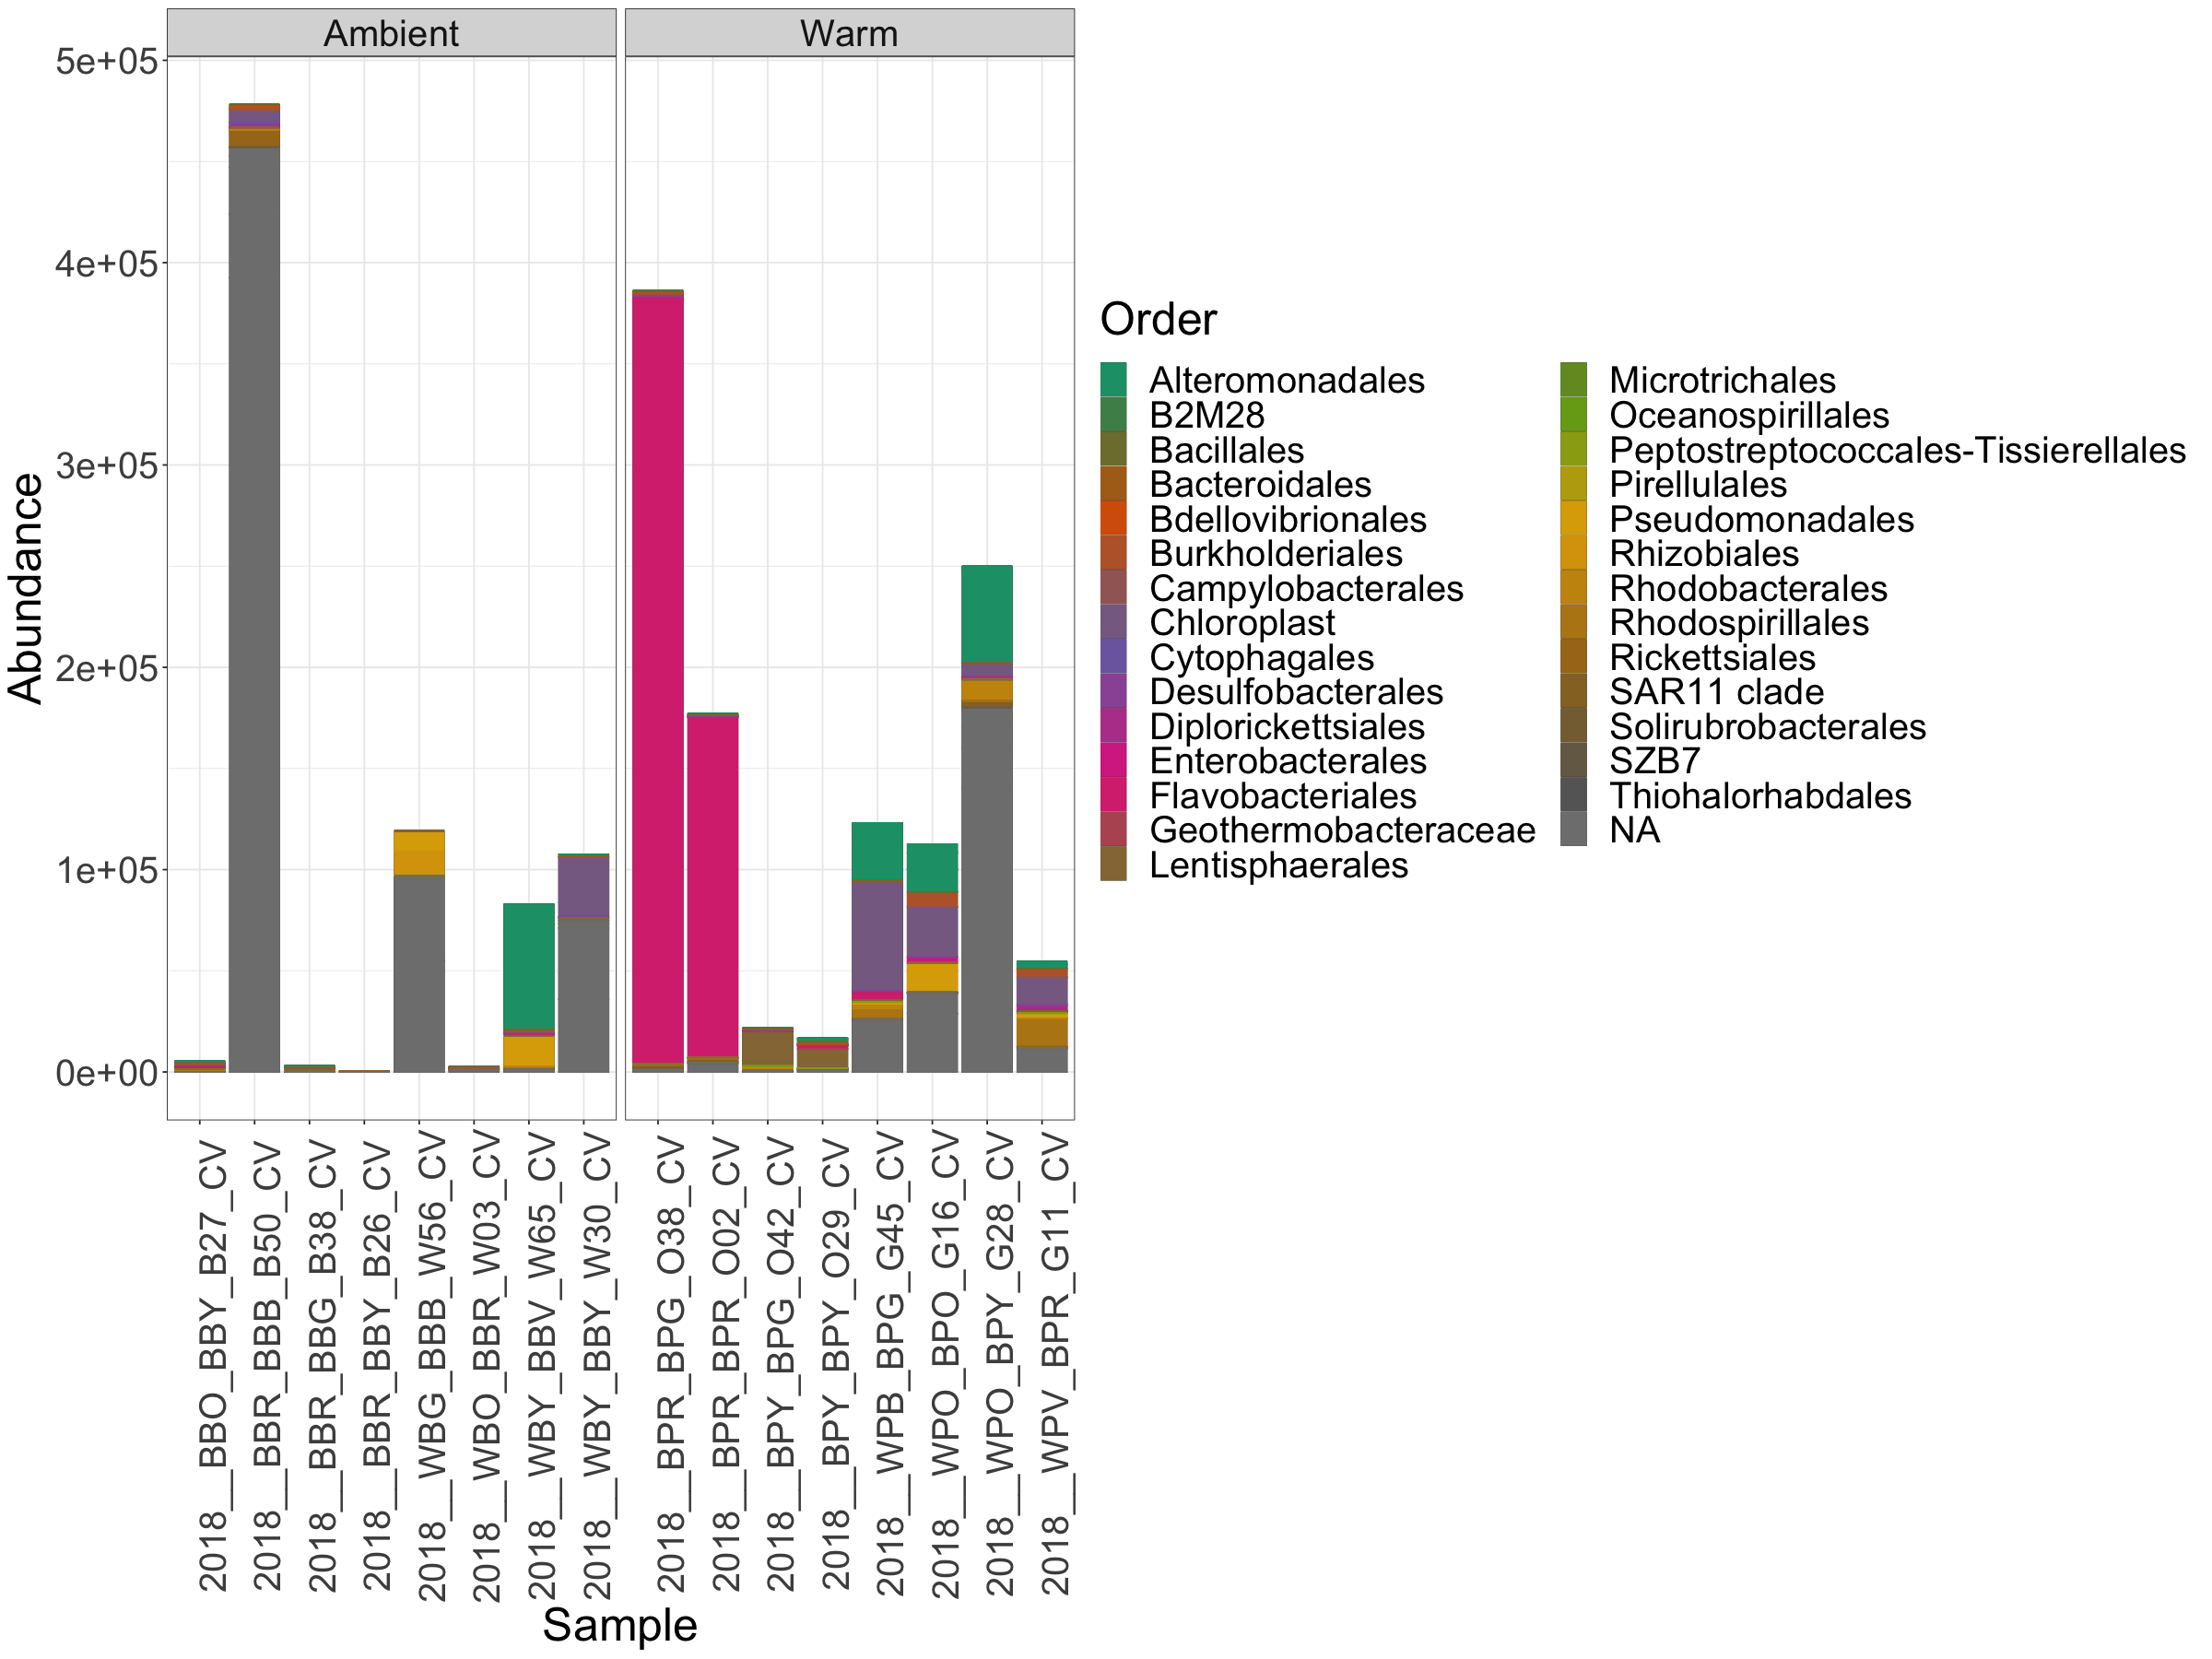

In [496]:
plot_bar(CE_temp, fill="Order")+
geom_bar(aes(color=Order), stat="identity", position="stack")+

scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
facet_grid(.~Phase_1_temp, scales="free_x")+
theme(legend.position = "right", text = element_text(size=30), axis.text.x = element_text(angle=90))

In [ ]:
BPBP=hypoxic warm, hypoxic warm
BBBB=hypoxic ambient, hypoxic ambient

WBBB=normoxic ambient, hypoxic ambient
WPBP=normoxic warm, hypoxic warm


## Thinking about a mechanism

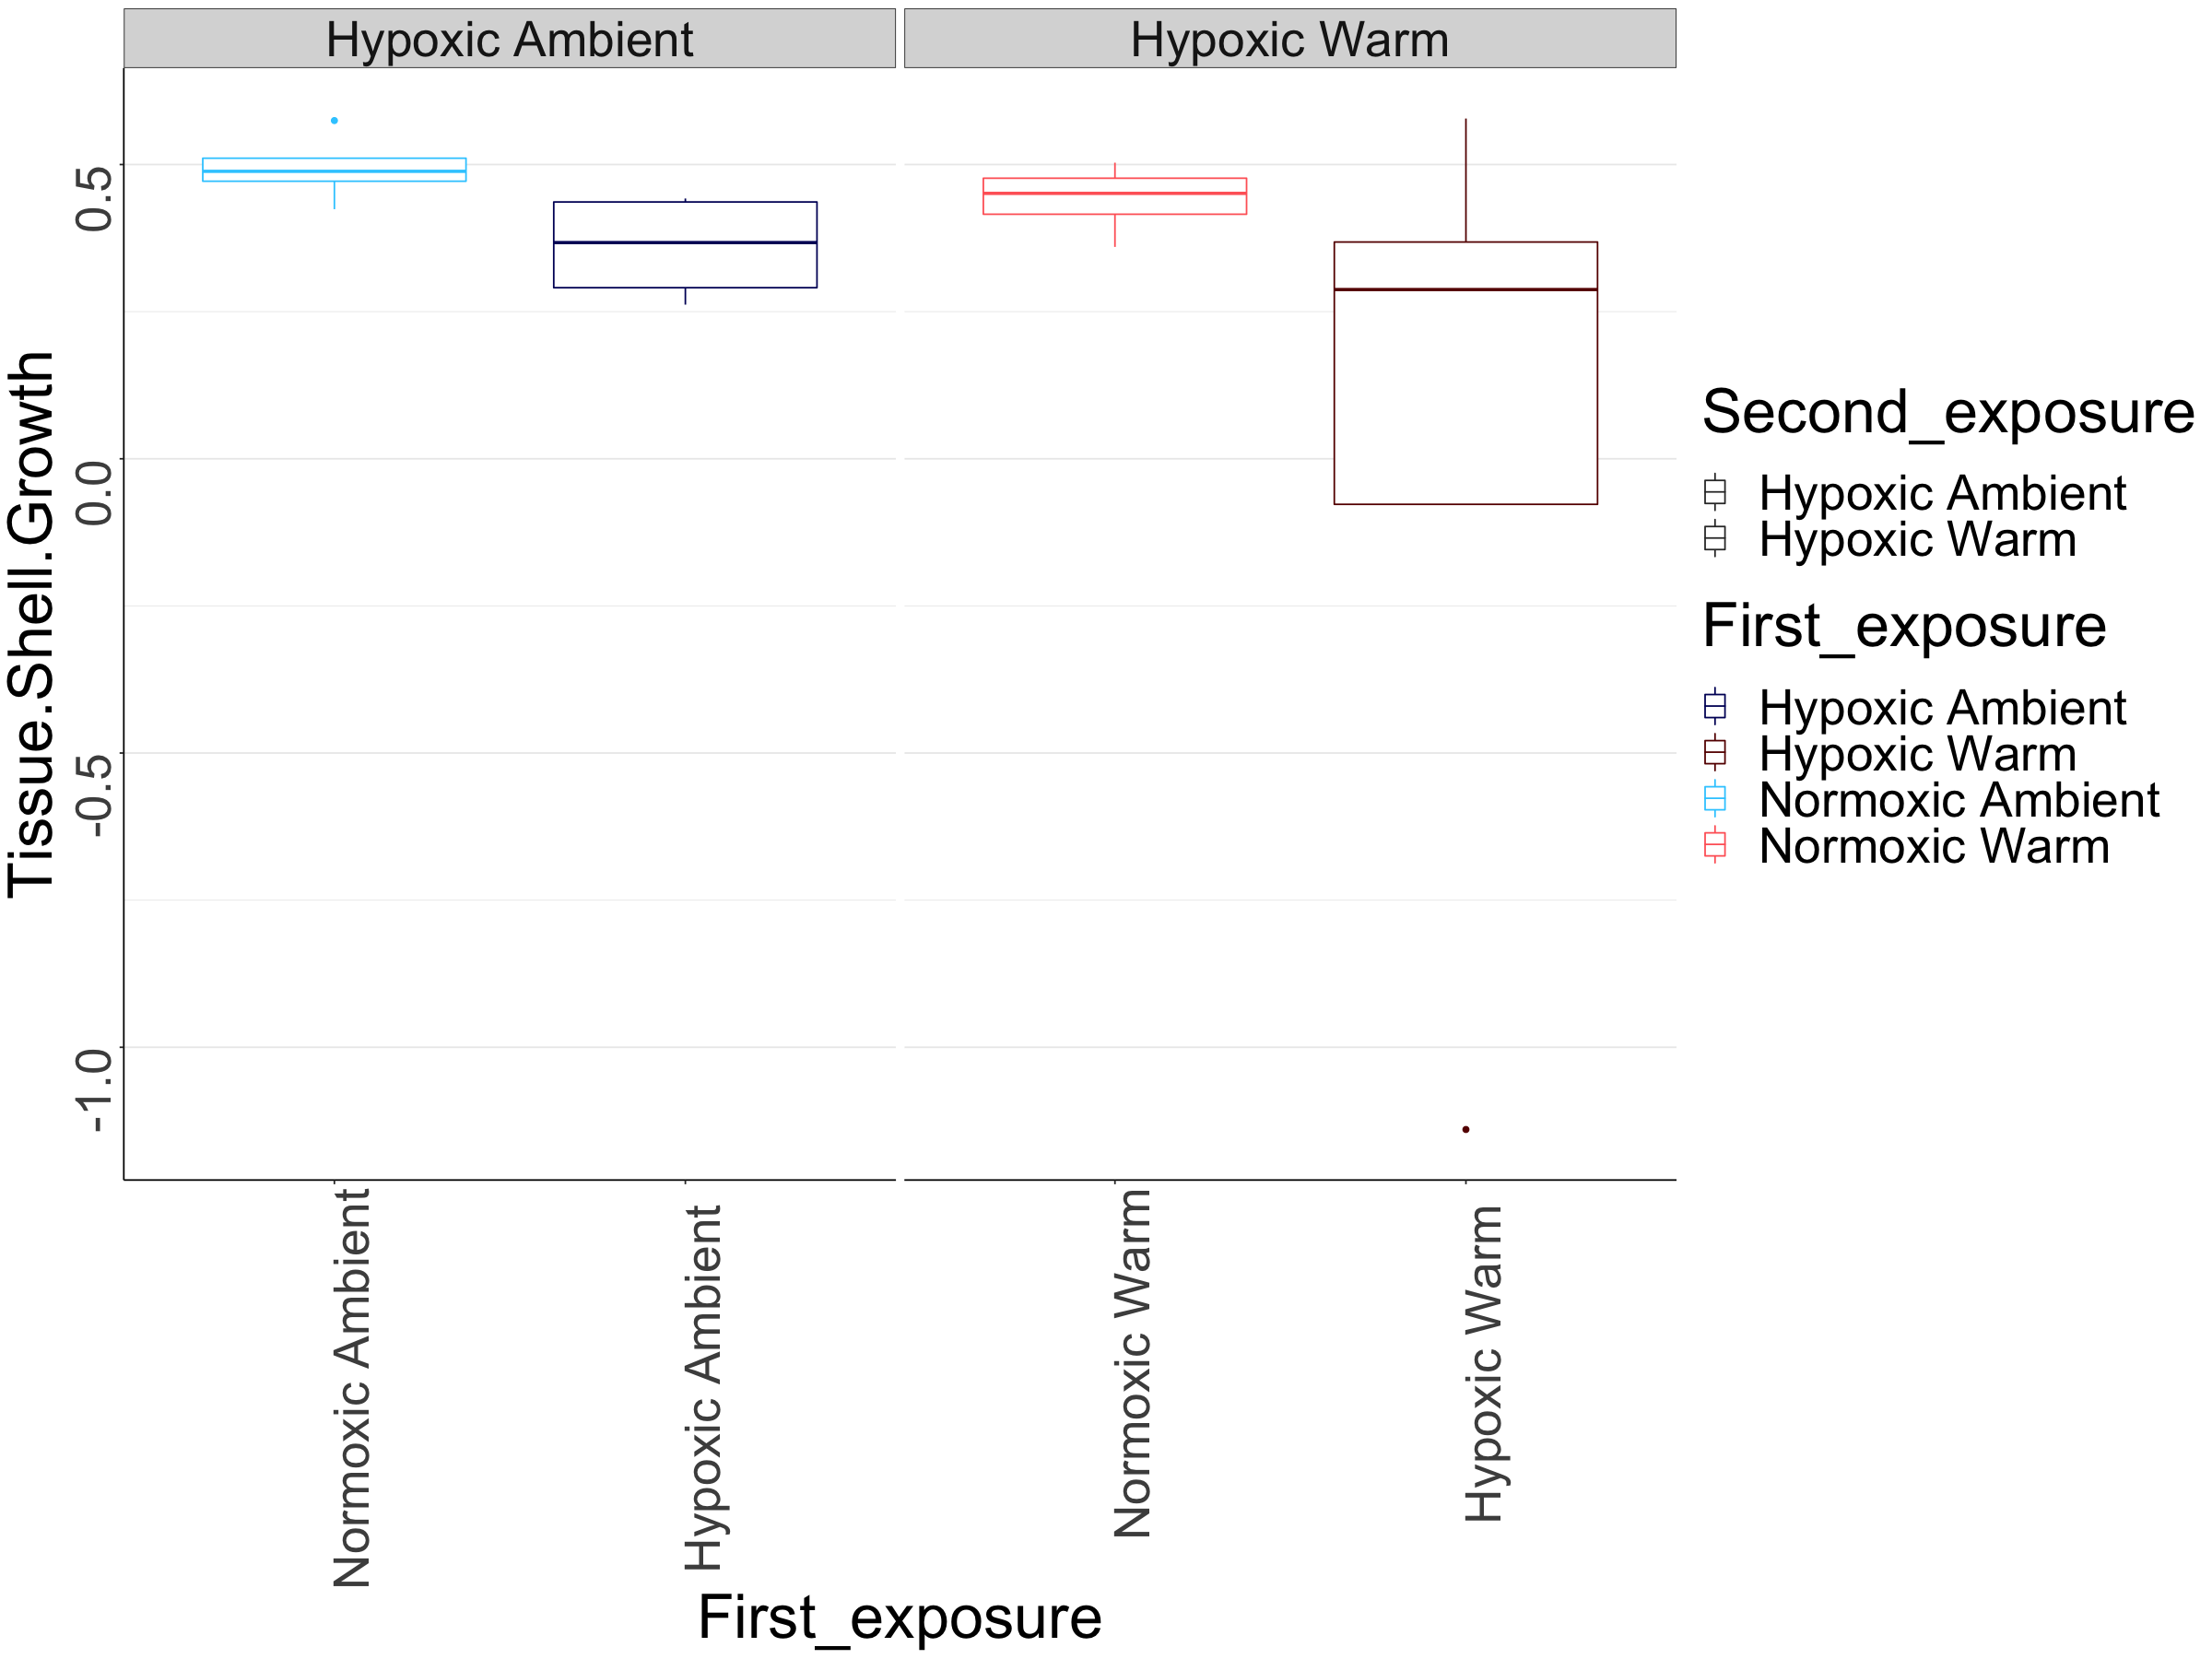

In [325]:
ggplot(meta_ce_g, aes(x=First_exposure, y=Tissue.Shell.Growth)) + 
  geom_boxplot(aes(color=First_exposure, shape=Second_exposure))+
facet_grid(.~Second_exposure, scales="free_x")+
theme_bw()+
scale_x_discrete(limits = rev)+
scale_color_manual(values=c("#000066", "#660000", "#33CCFF","#FF6666" ))+
scale_shape_manual(values=c(18, 17))+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=40))

## Limit to phase 2 hypoxic warm, compare phase 1 normoxic vs. hypoxic

In [348]:
CE_hw=subset_samples(CE, Phase_2_Temp=="Warm")

In [349]:
CE_hw

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2968 taxa and 8 samples ]
sample_data() Sample Data:       [ 8 samples by 20 sample variables ]
tax_table()   Taxonomy Table:    [ 2968 taxa by 6 taxonomic ranks ]

In [350]:
#convert to DEseq
CE_hwdds = phyloseq_to_deseq2(CE_hw, ~ Phase_1_DO)
#calculate arithmetic means because of zeros.
#arith_mean=function(row) if (all(row == 0)) 0 else exp(mean(log(row[row != 0])))
#arithmeans = apply(otu_table(CEdds), 1, arith_mean) 
#CEdds = estimateSizeFactors(CEdds, geoMeans=arithmeans, locfunc=shorth)
#run GLMs
CE_hwdds = DESeq(CE_hwdds, test="Wald", fitType="parametric")

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [426]:
res=results(CE_hwdds)
sighw = as.data.frame(res[which(res$padj < 0.05), ])
sighw = cbind(as(sighw, "data.frame"), as(tax_table(CE)[rownames(sighw), ], "matrix"))

In [381]:
resultsNames(CE_hwdds)

[1] "Intercept"                      "Phase_1_DO_Normoxic_vs_Hypoxic"

In [390]:
x = tapply(sighw$log2FoldChange, sighw$Phylum, function(x) max(x))
x = sort(x, TRUE)
sighw$Phylum = factor(as.character(sighw$Phylum), levels= names(x))

#Class = Variable 2
x = tapply(sighw$log2FoldChange, sighw$Class, function(x) max(x))
x = sort(x, TRUE)
sighw$Class = factor(as.character(sighw$Class), levels= names(x))


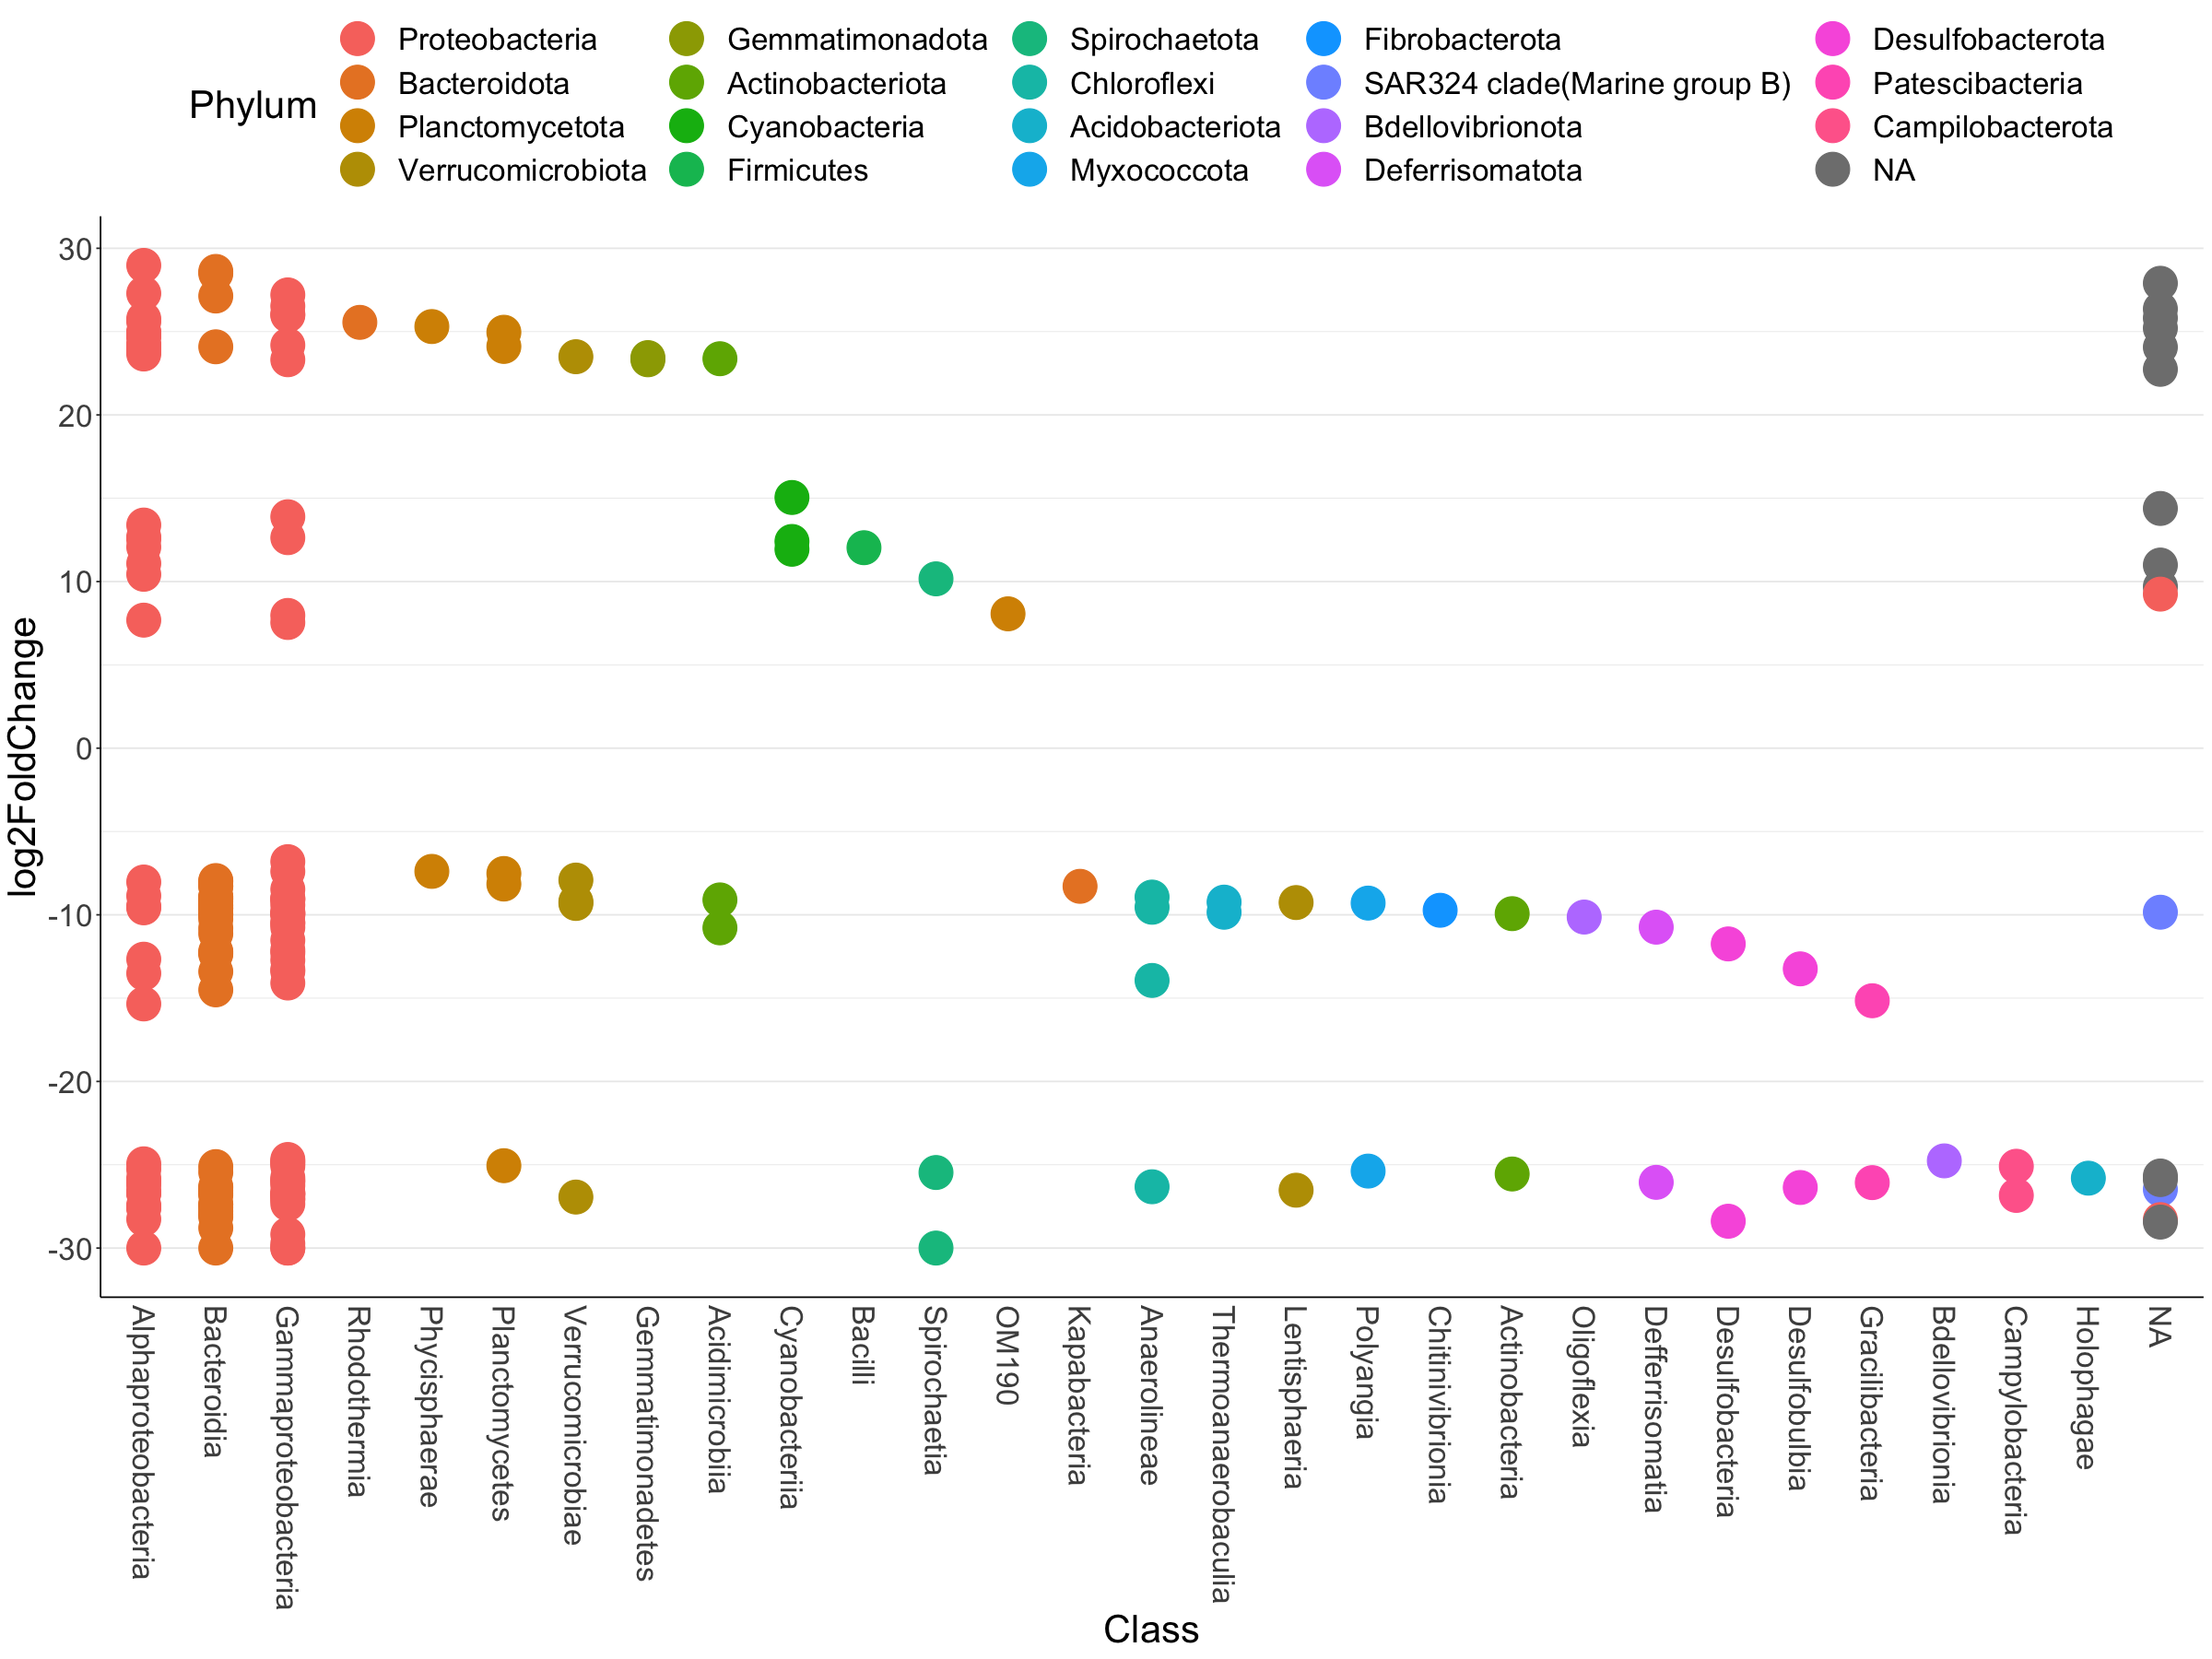

In [402]:
ggplot(sighw, aes(x=Class, y=log2FoldChange, color=Phylum))+
  geom_point(size=10)+ 
theme_bw()+
theme(legend.position="top",legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=25), axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))


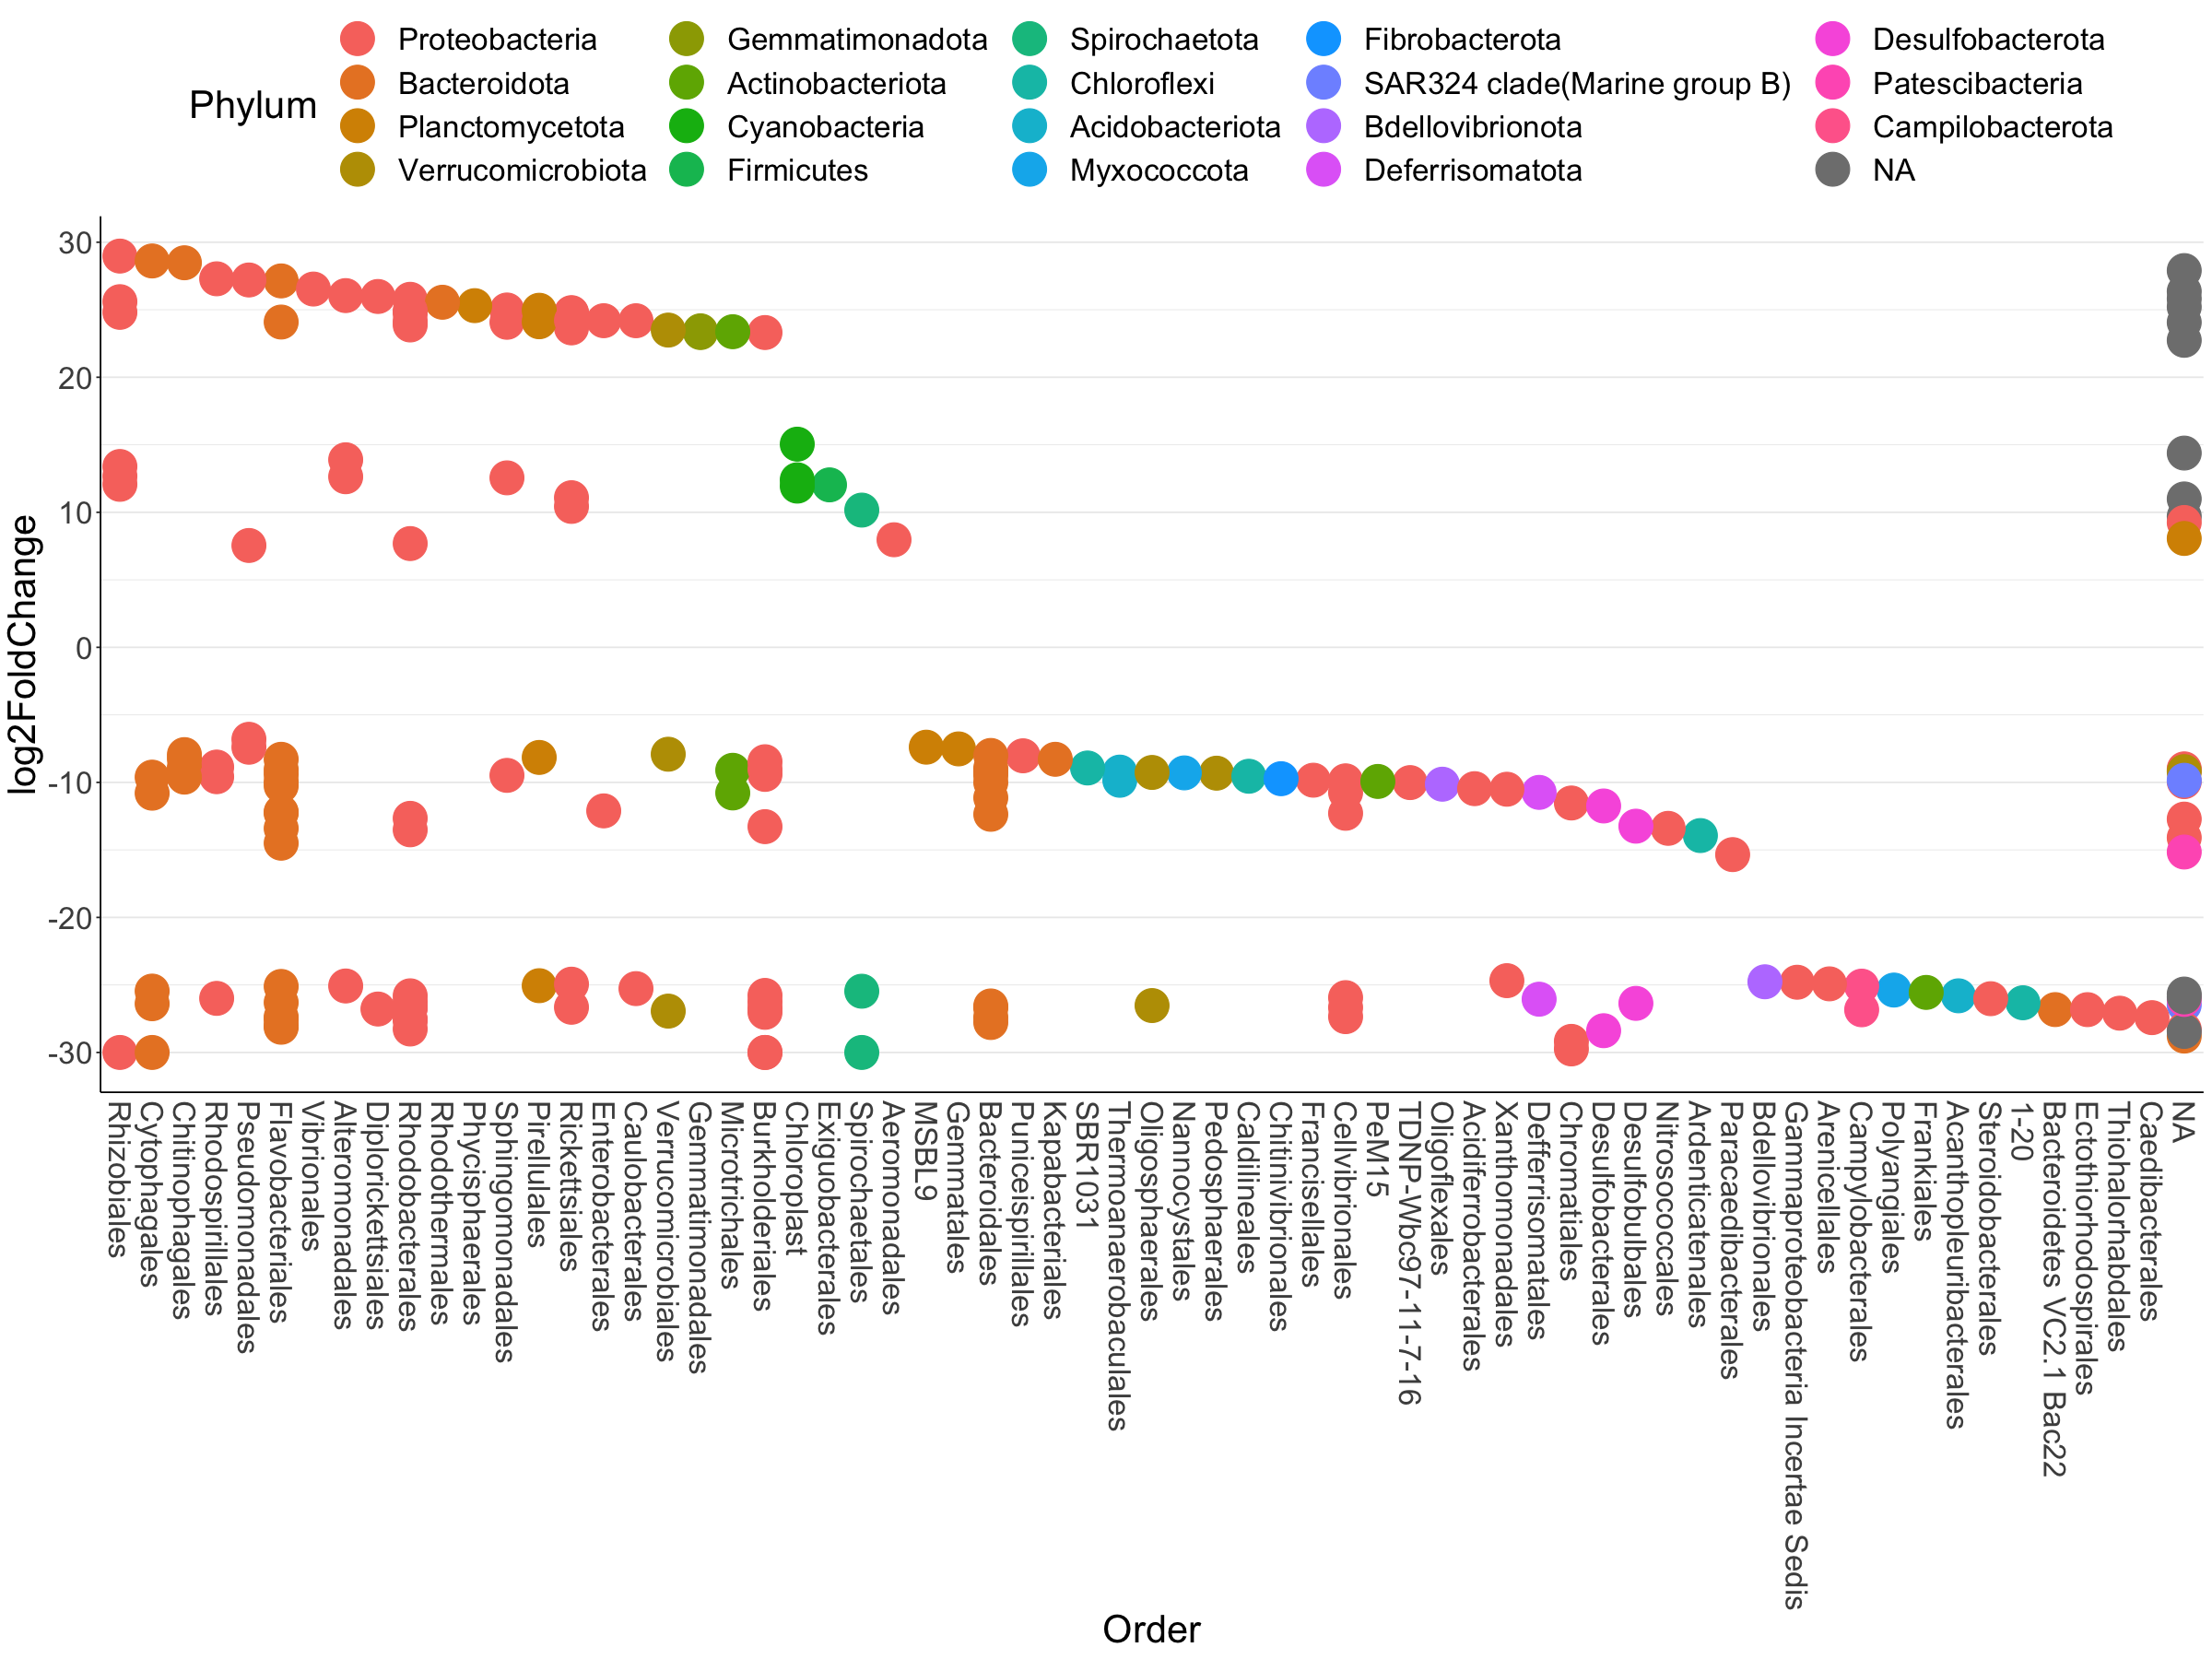

In [387]:
ggplot(sighw, aes(x=Order, y=log2FoldChange, color=Phylum))+
  geom_point(size=10)+ 
theme_bw()+
theme(legend.position="top",legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=25), axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))


In [353]:
CE_hwsig=prune_taxa(rownames(sighw), CE_hw)

In [371]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(19)


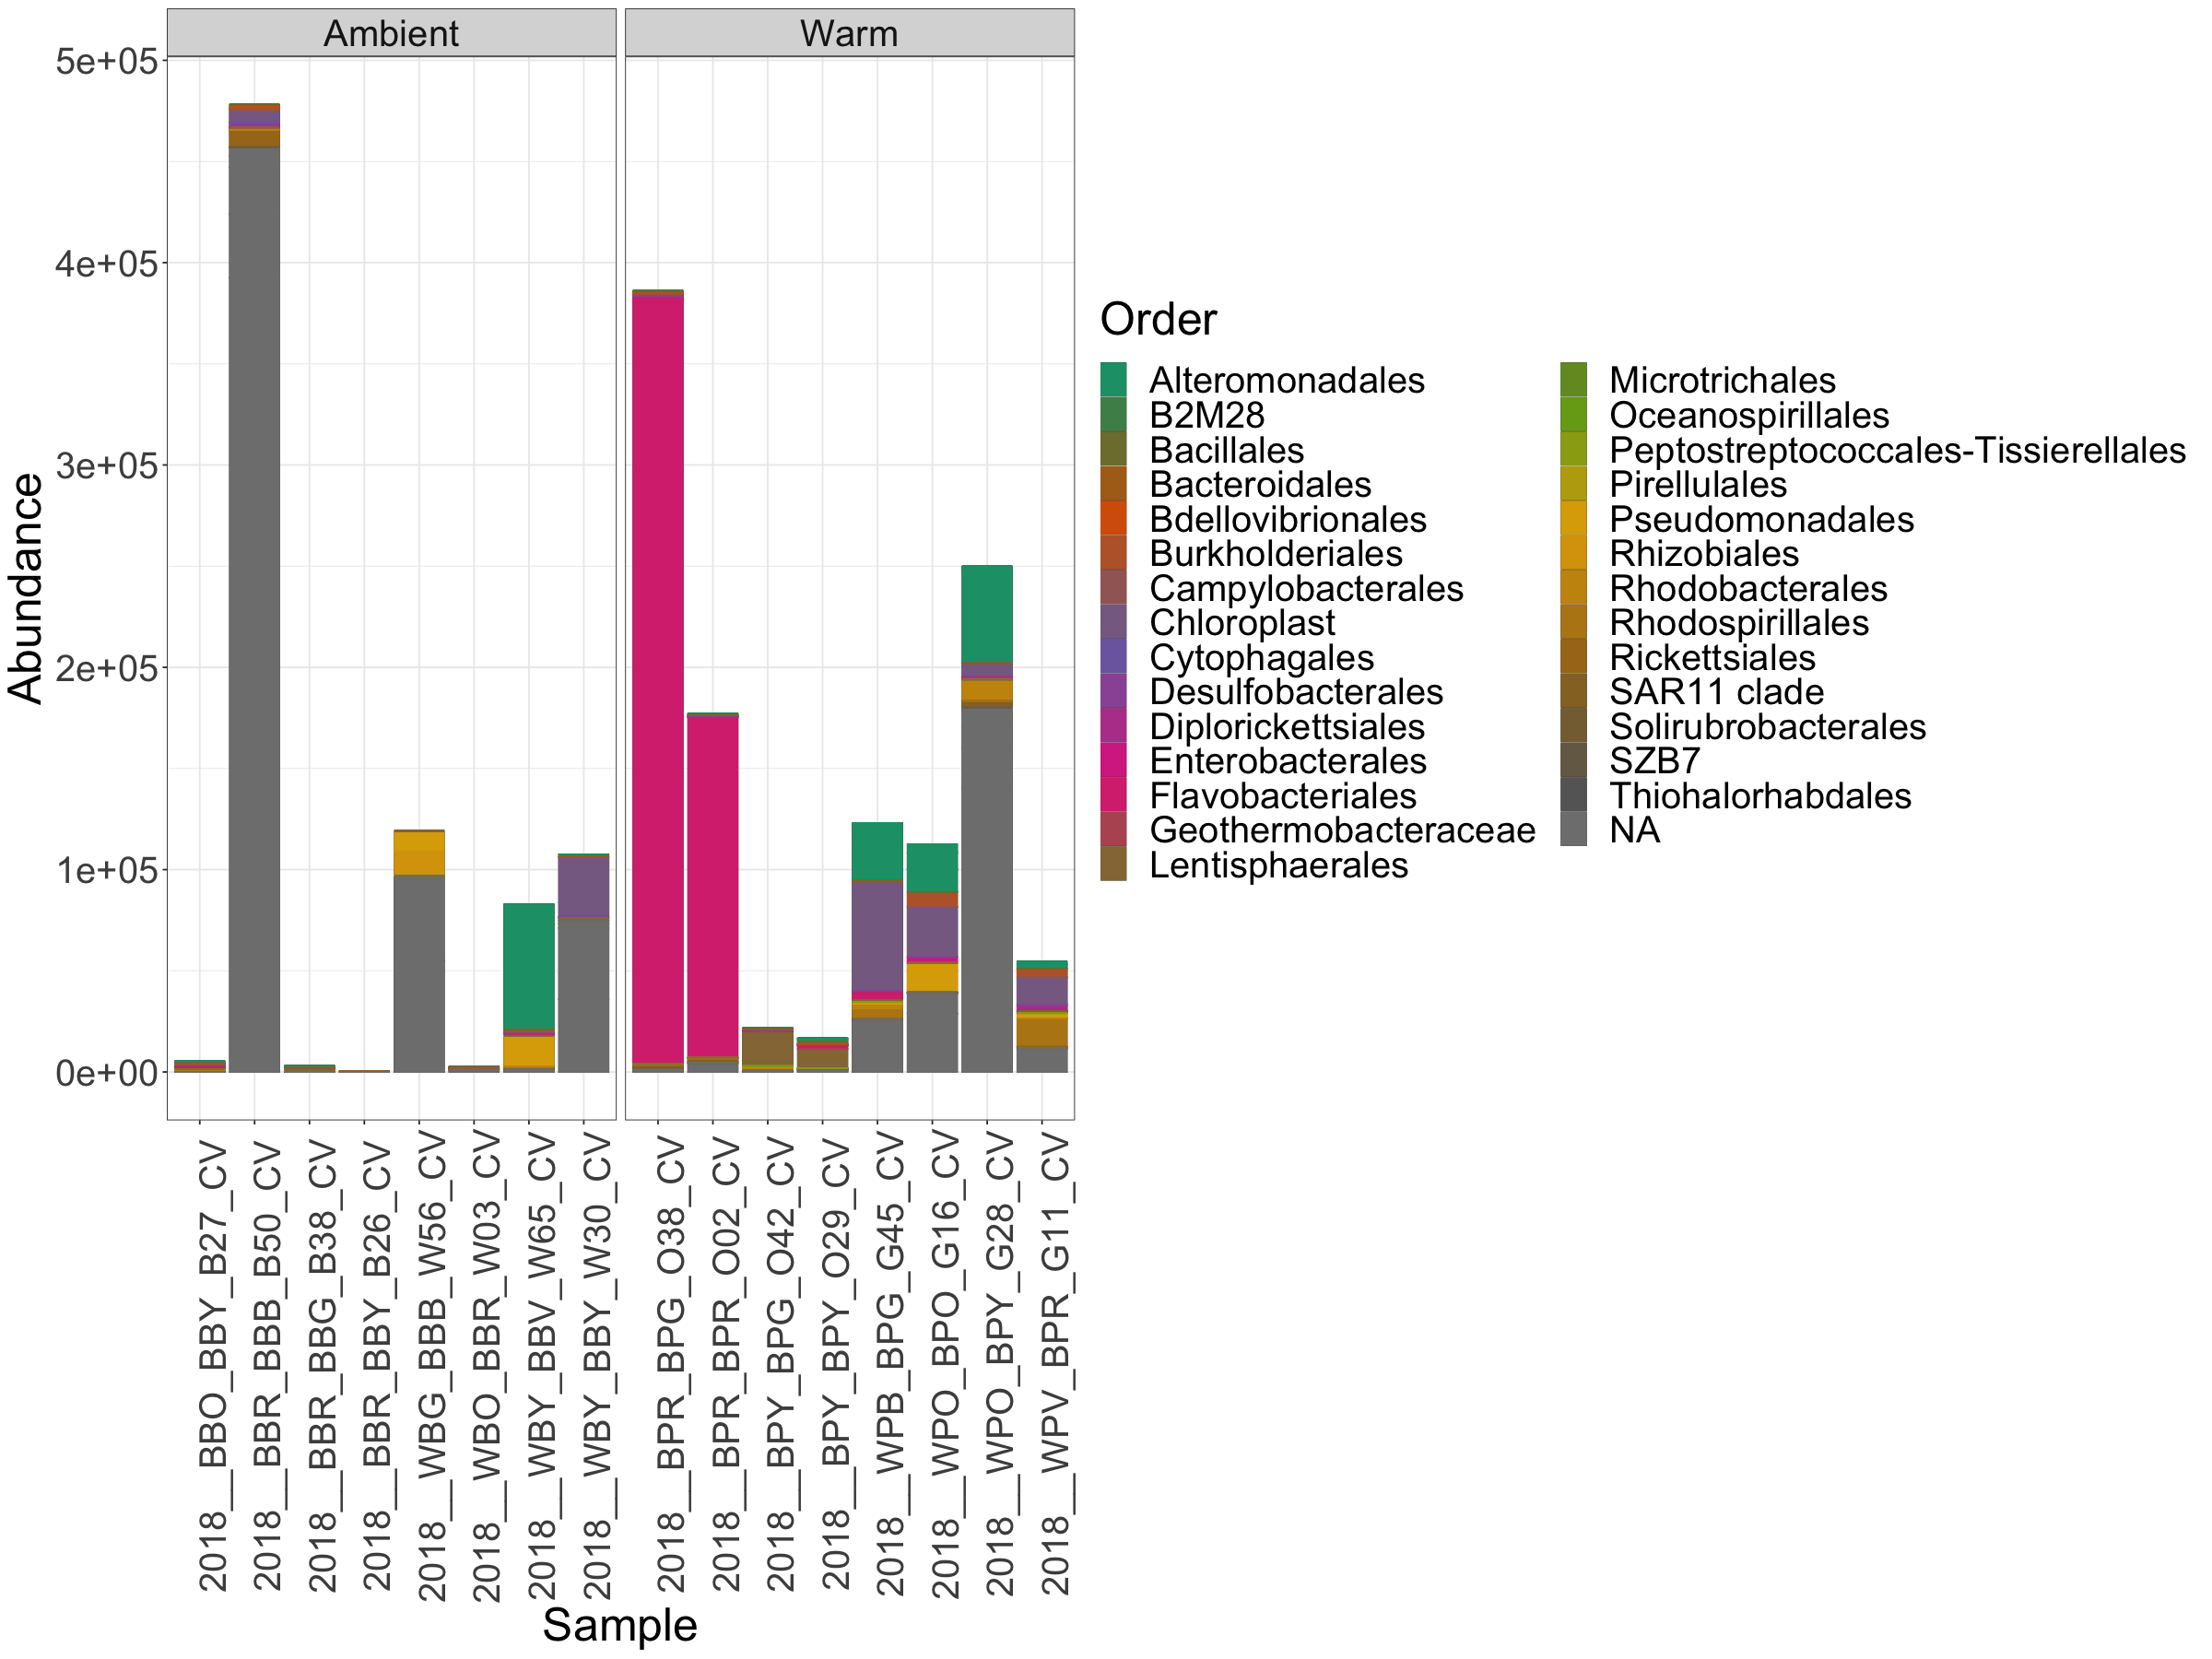

In [507]:
plot_bar(CE_temp, fill="Order")+
geom_bar(aes(color=Order), stat="identity", position="stack")+

scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
facet_grid(.~Phase_1_temp, scales="free_x")+
theme(legend.position = "right", text = element_text(size=30), axis.text.x = element_text(angle=90))

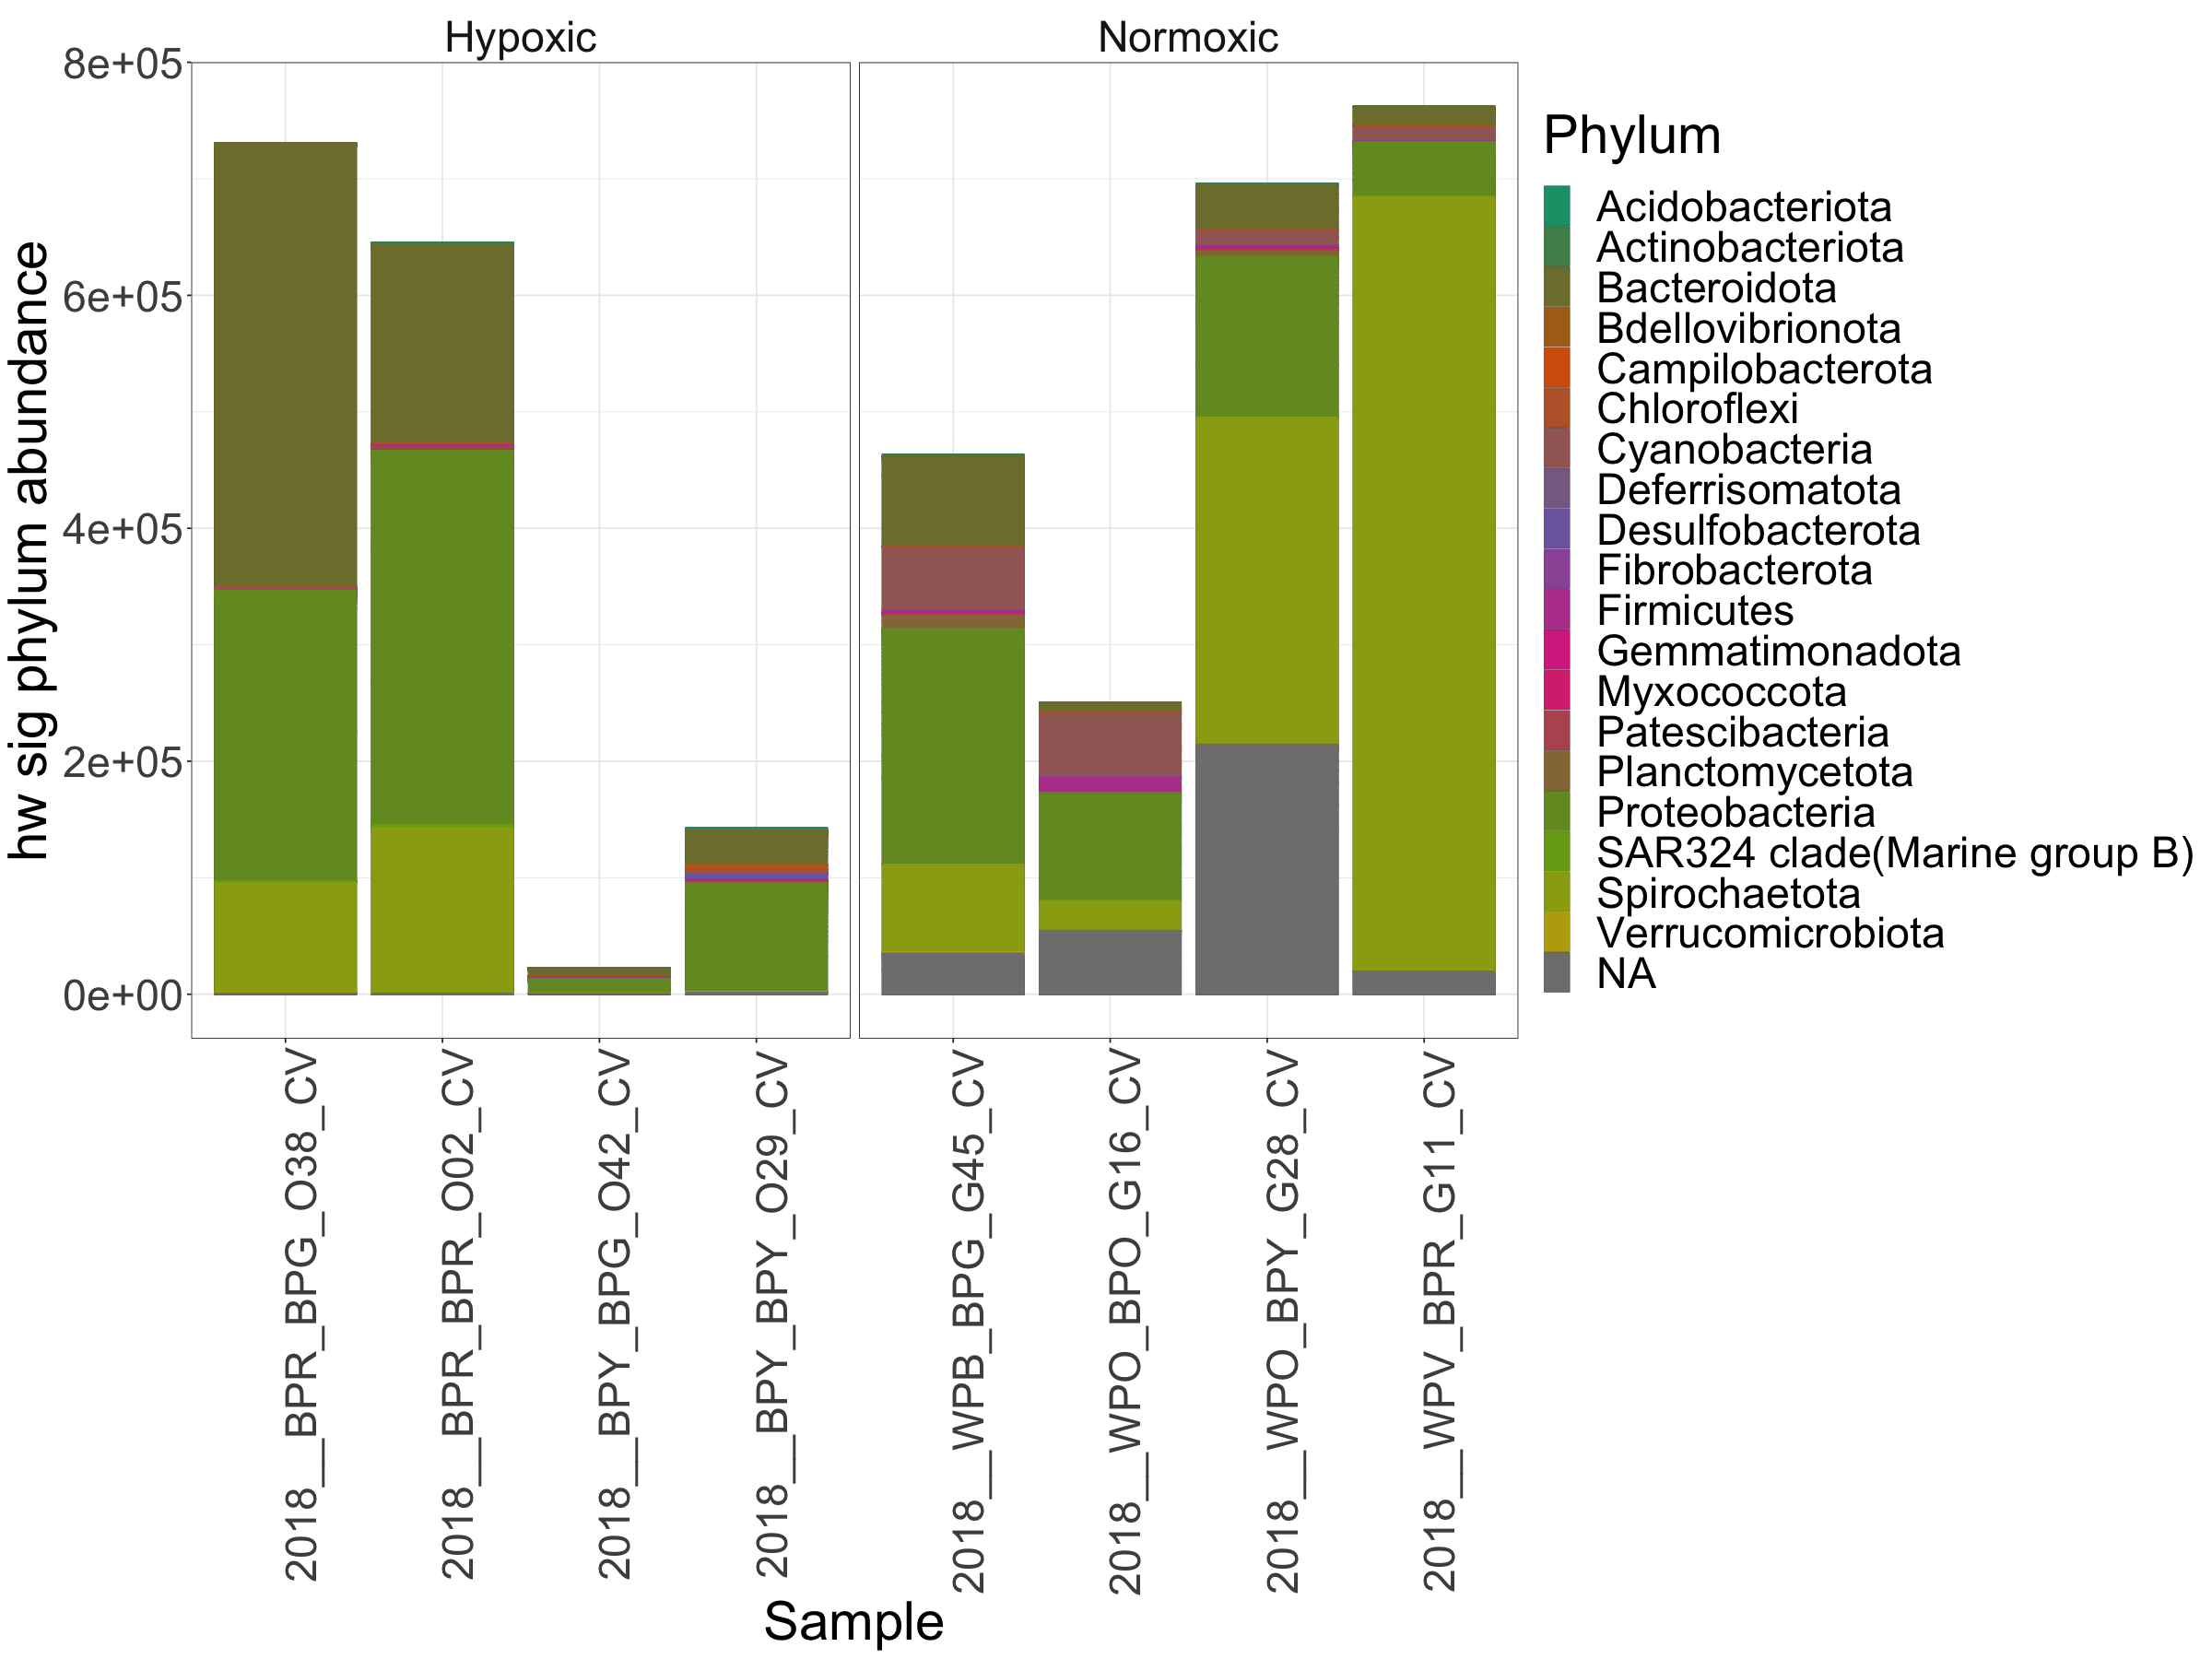

In [501]:
plot_bar(CE_hwsig, fill="Phylum")+
geom_bar(aes(color=Phylum), stat="identity", position="stack")+
scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
facet_grid(.~Phase_1_DO, scales="free_x")+
 ylab("hw sig phylum abundance")+
theme(legend.position = "right",  text = element_text(size=35), axis.text.x = element_text(angle=90), strip.background = element_blank())


In [364]:
names=sample_data(CE_hwsig)
nameorder=names$UniqueID

Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”
Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


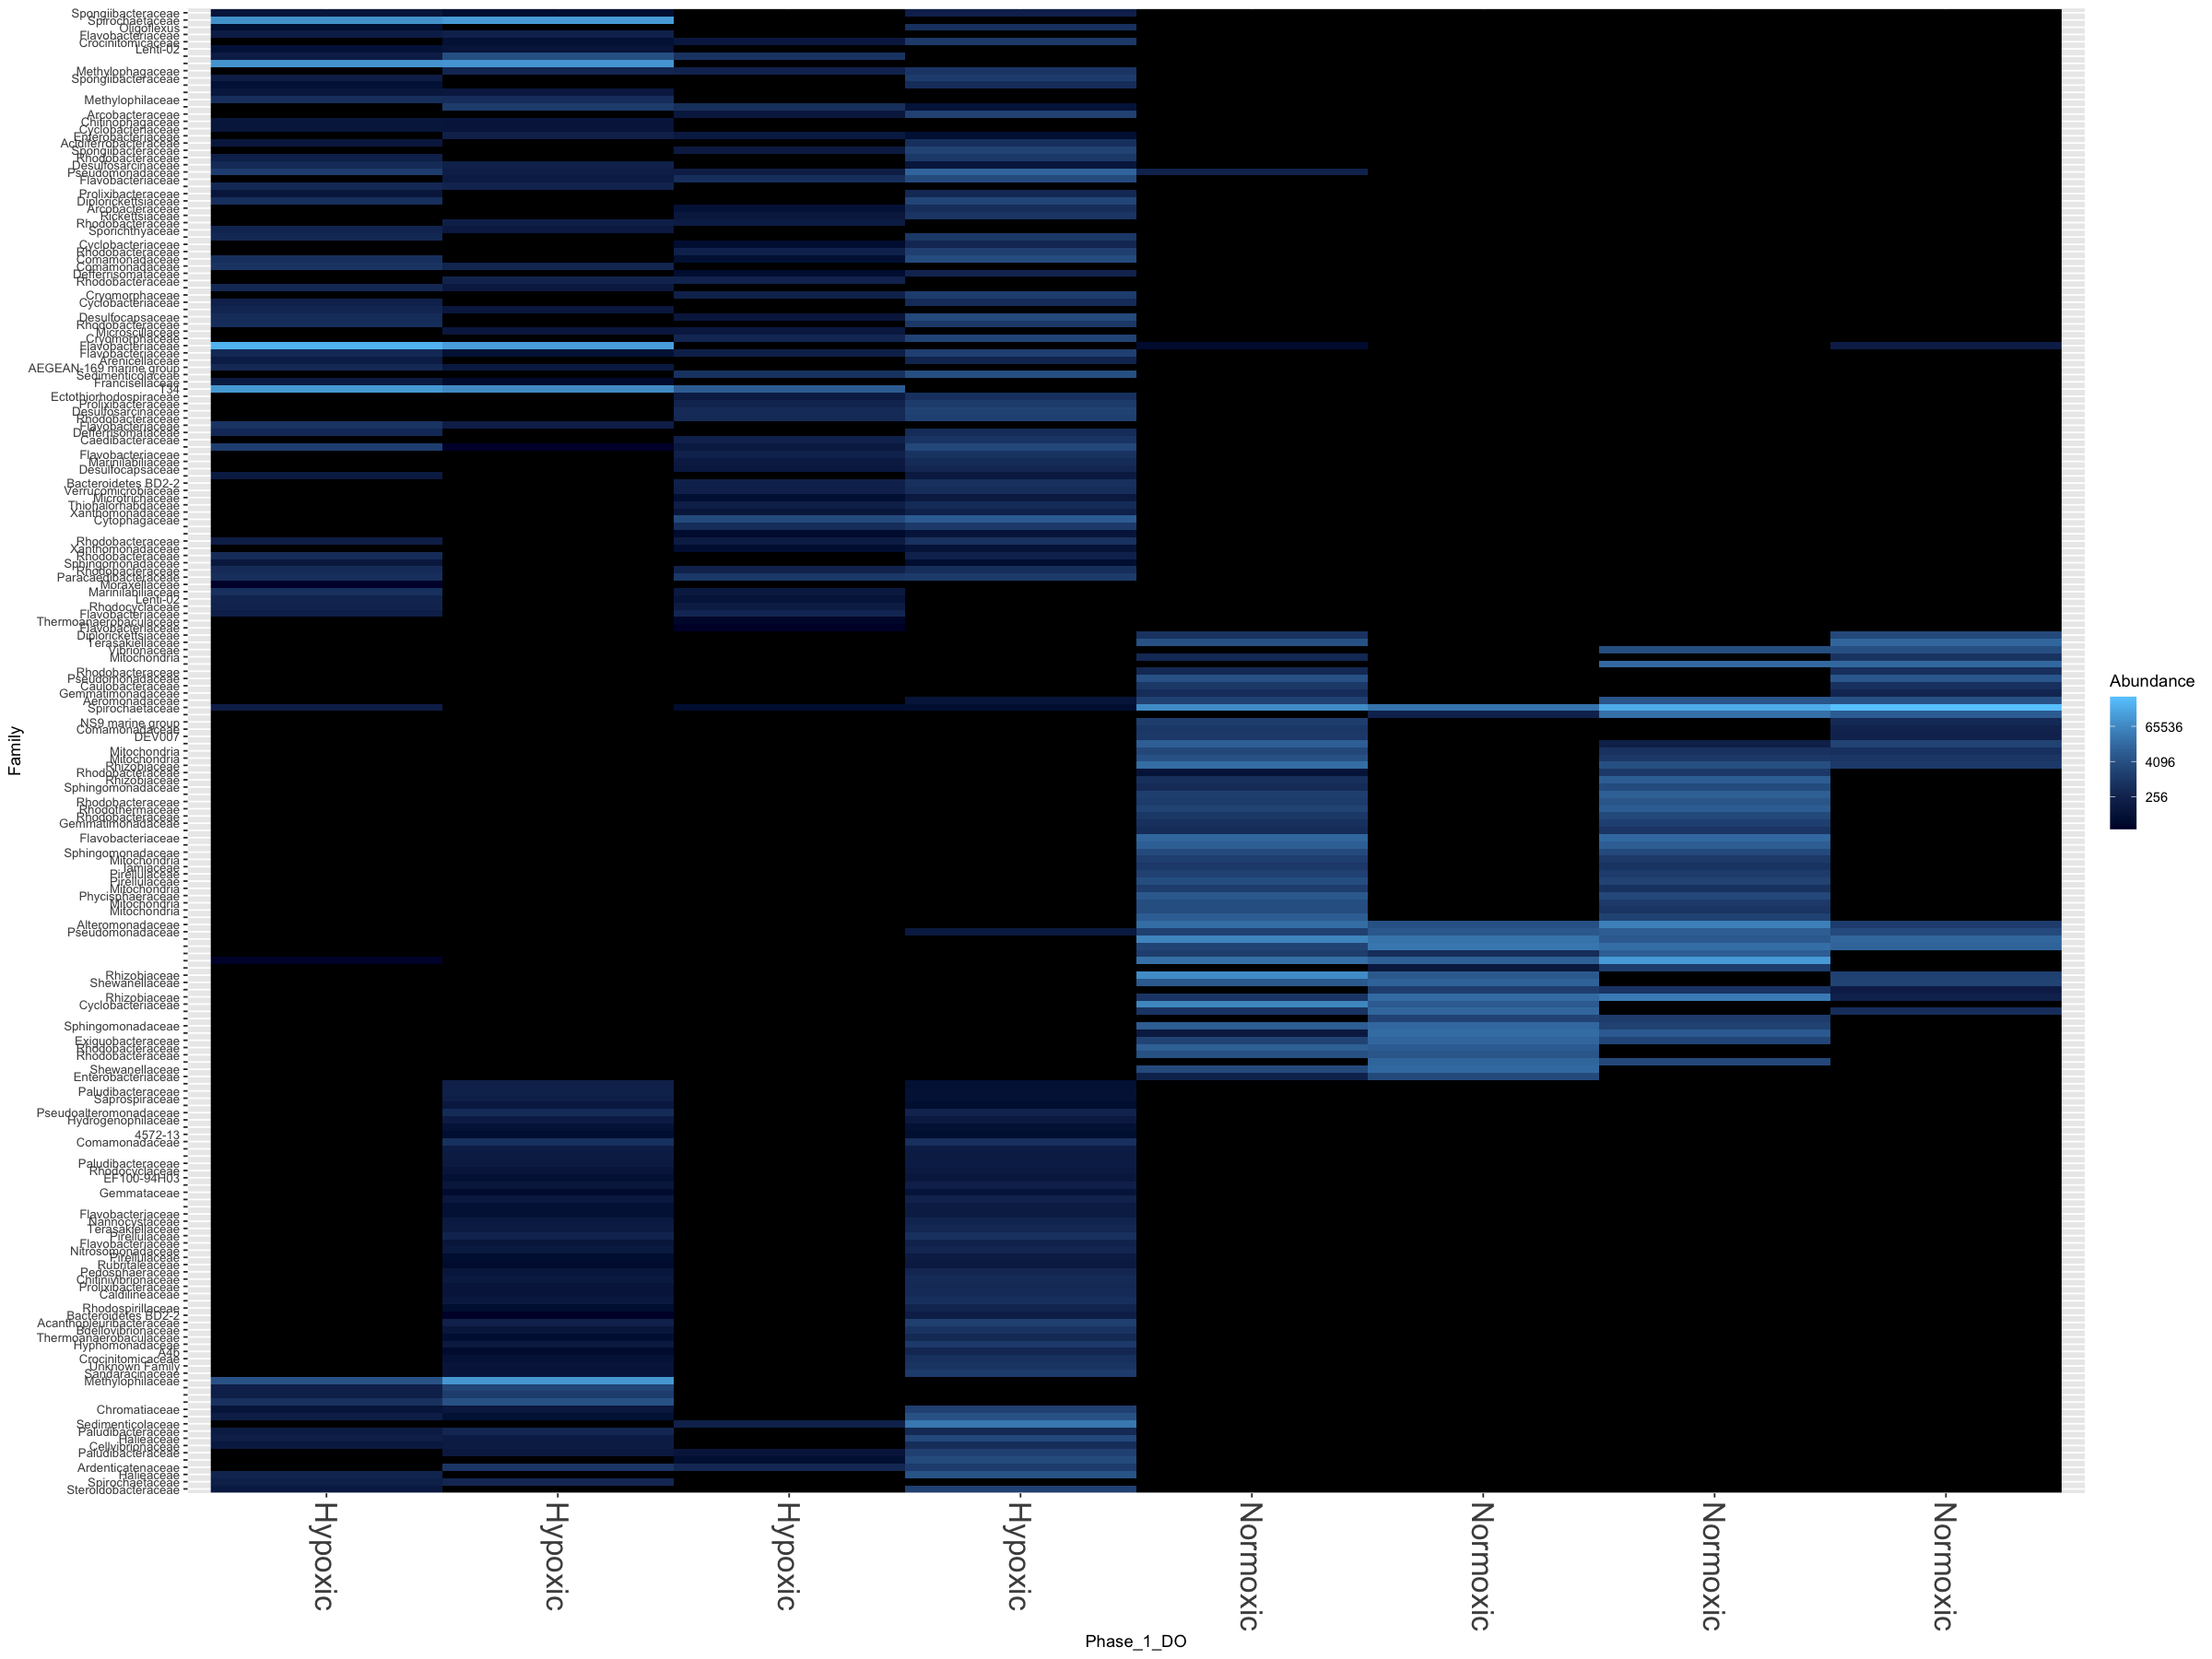

In [365]:
plot_heatmap(CE_hwsig, "NMDS", "bray", "Phase_1_DO", "Family", sample.order = nameorder )+
theme(legend.position = "right", axis.text.y = element_text(size=8), axis.text.x = element_text(size=20))


## otus only found associated with phase 1 do in phase 2 hypoxic warm oysters

In [502]:
sigpheno=sighw[!(rownames(sighw) %in% rownames(sig1_oxy)),]

In [503]:
dim(sigpheno)

[1] 117  12

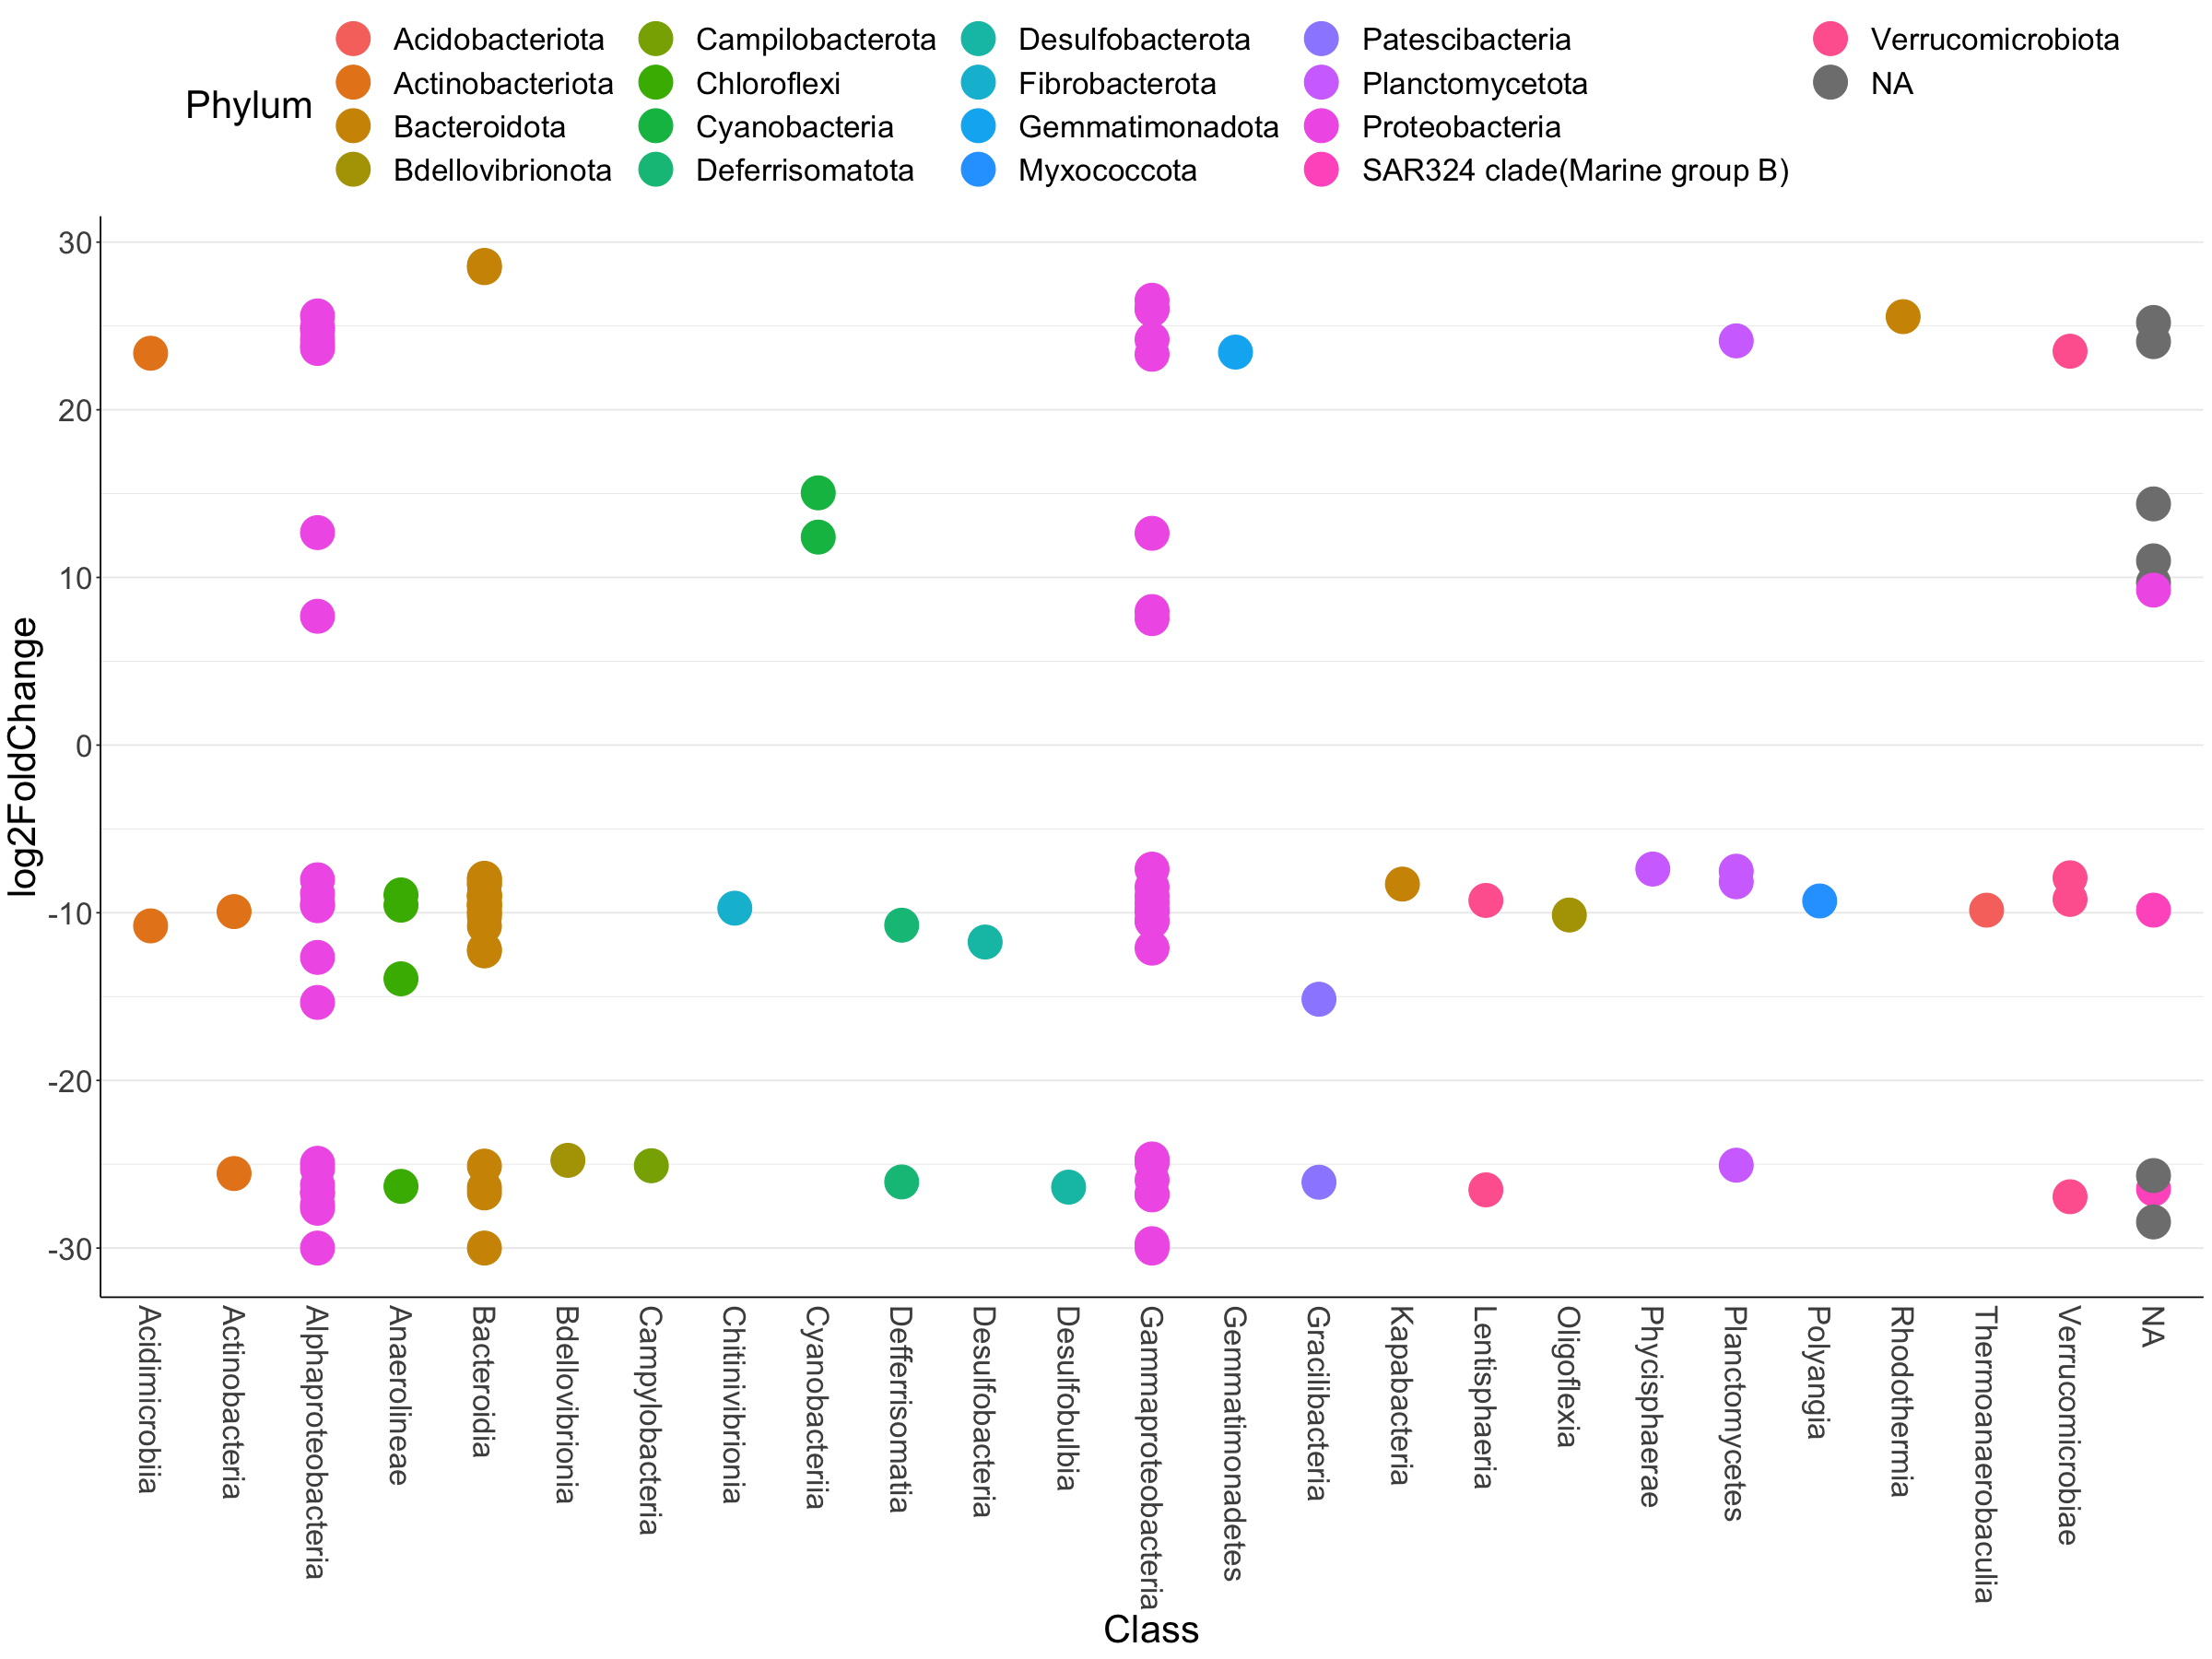

In [504]:
ggplot(sigpheno, aes(x=Class, y=log2FoldChange, color=Phylum))+
  geom_point(size=10)+ 
theme_bw()+
theme(legend.position="top",legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=25), axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))


Spirochetes associated regardless of phase 2 treatment. 
four strains of Anaerolinea more abundant in hypoxic oysters 

In [505]:
CE_sigpheno=prune_taxa(rownames(sigpheno), CE_hw)

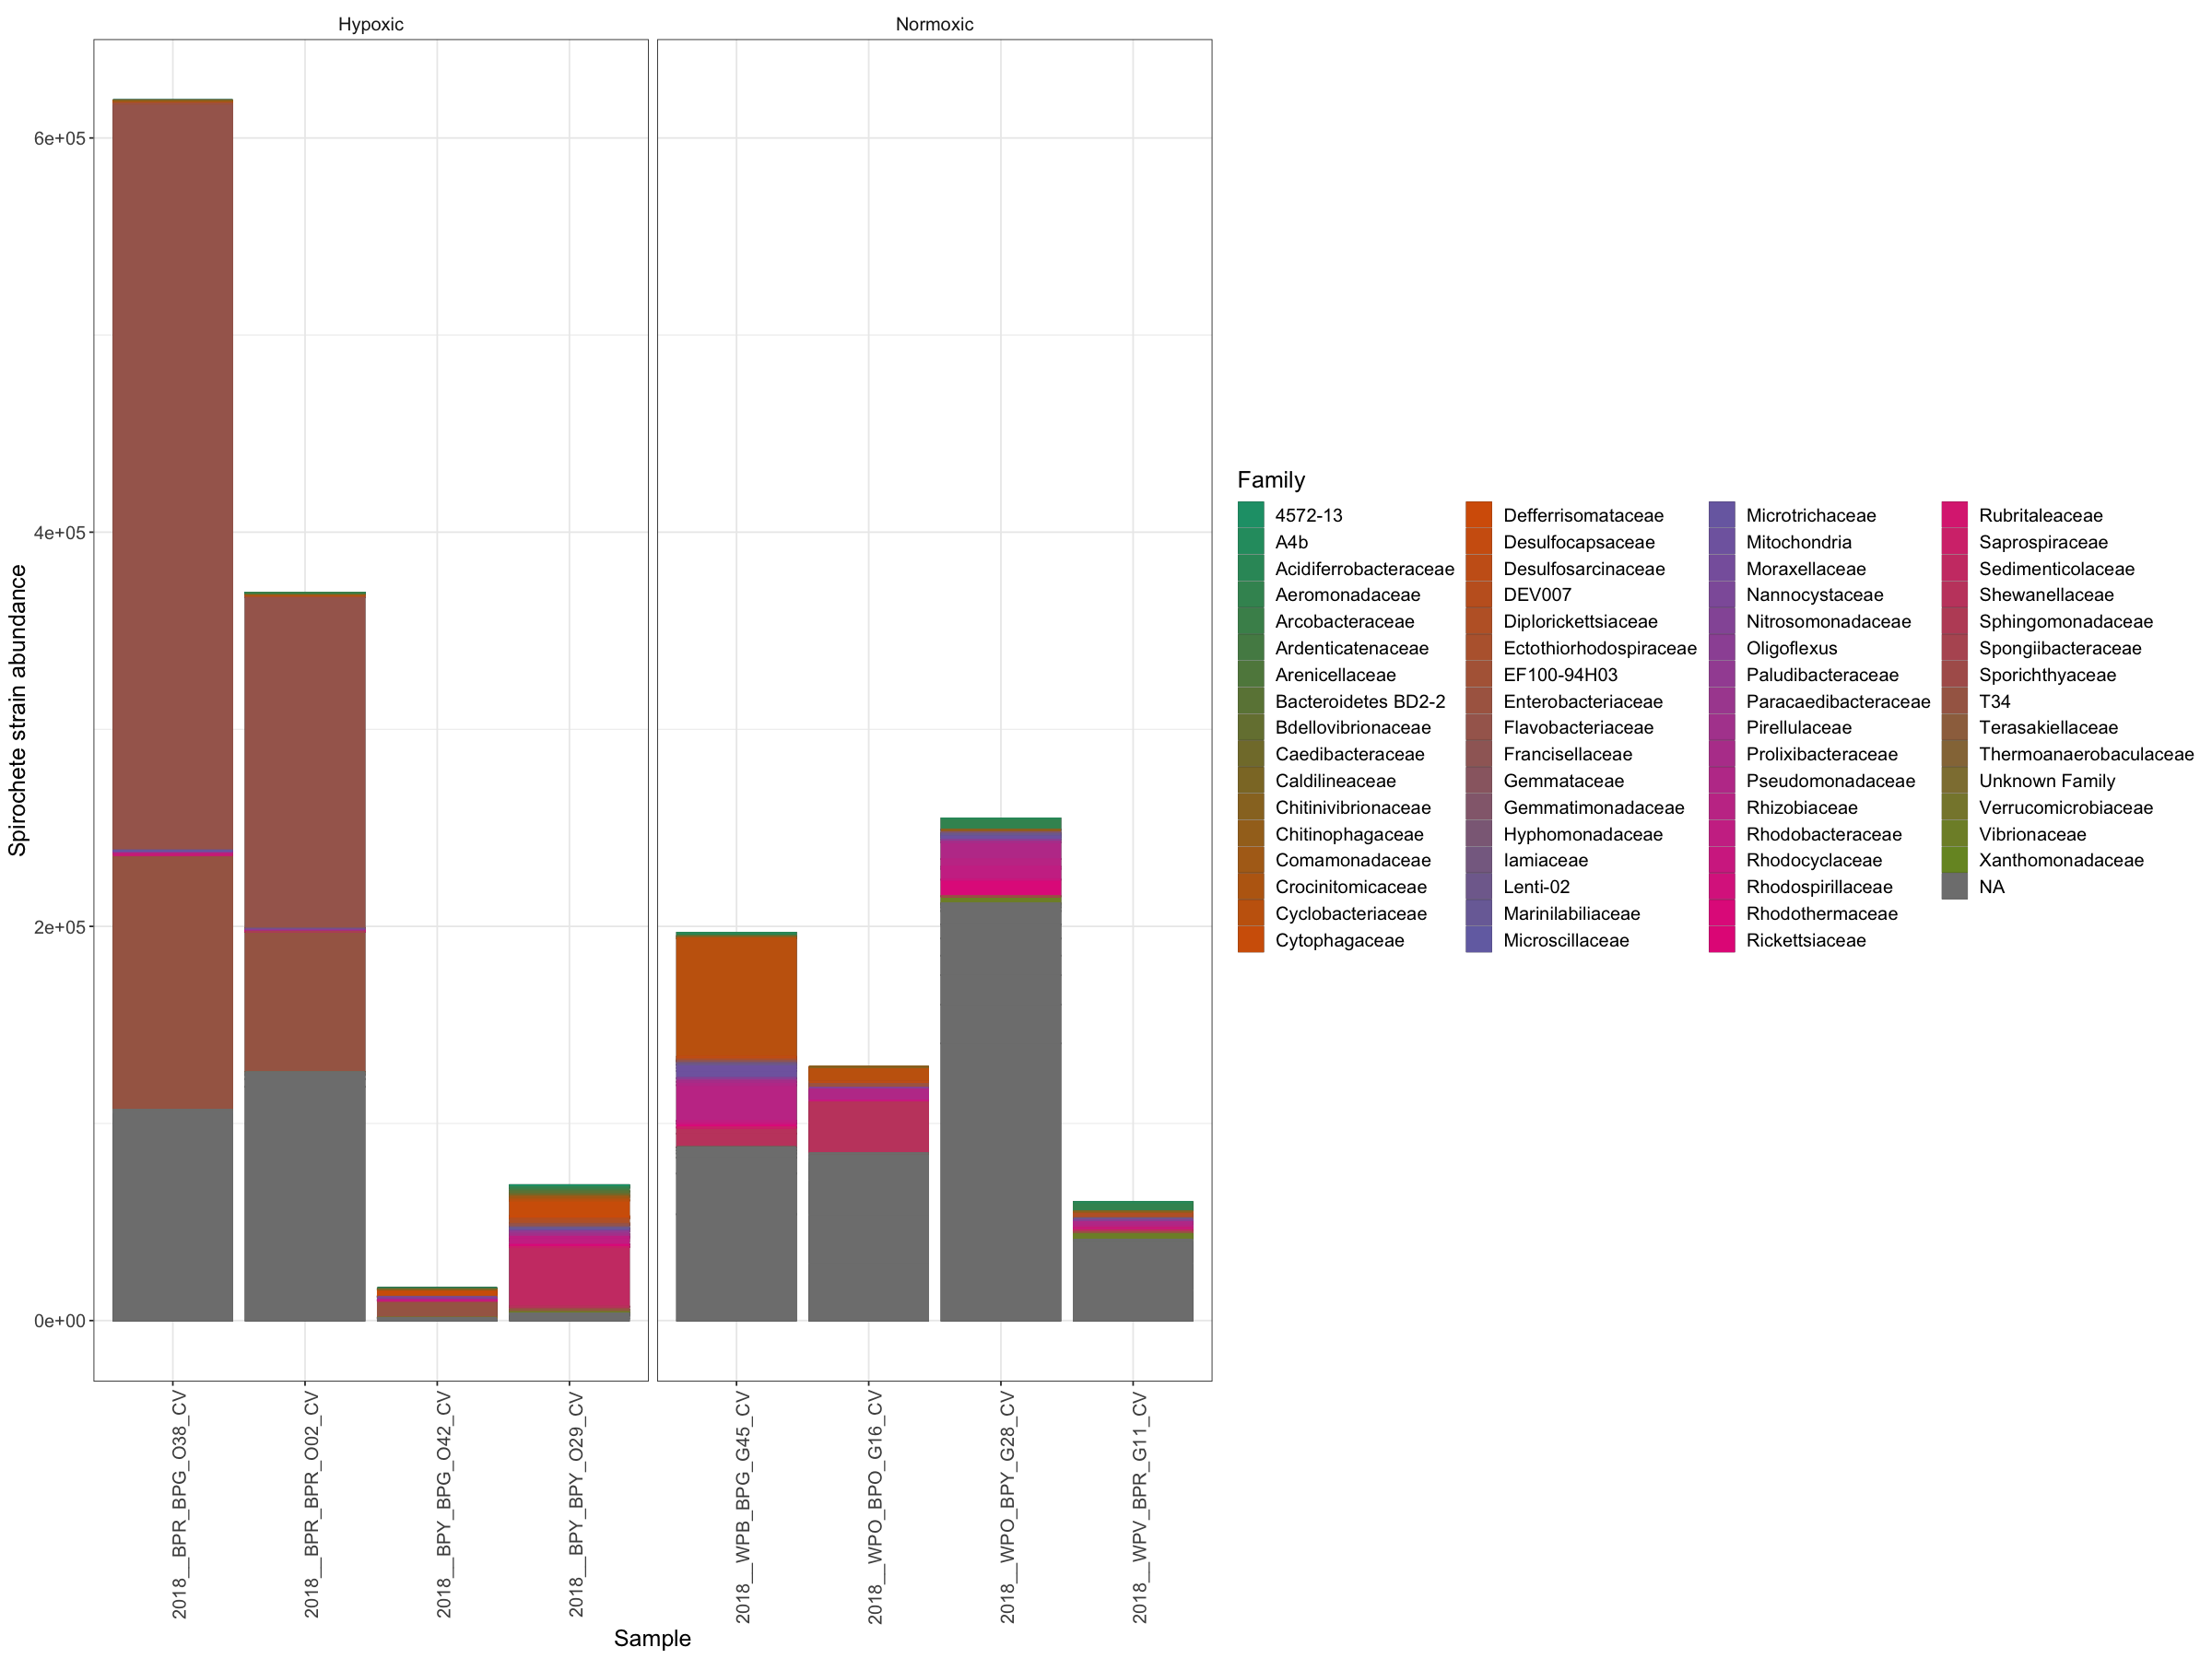

In [521]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(117)
plot_bar(CE_sigpheno, fill="Family")+
geom_bar(aes(color=Family), stat="identity", position="stack")+
scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
facet_grid(.~Phase_1_DO, scales="free_x")+
 ylab("Spirochete strain abundance")+
theme(legend.position = "right",  text = element_text(size=15), axis.text.x = element_text(angle=90), strip.background = element_blank())


Warning message in metaMDS(veganifyOTU(physeq), distance, ...):
“stress is (nearly) zero: you may have insufficient data”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


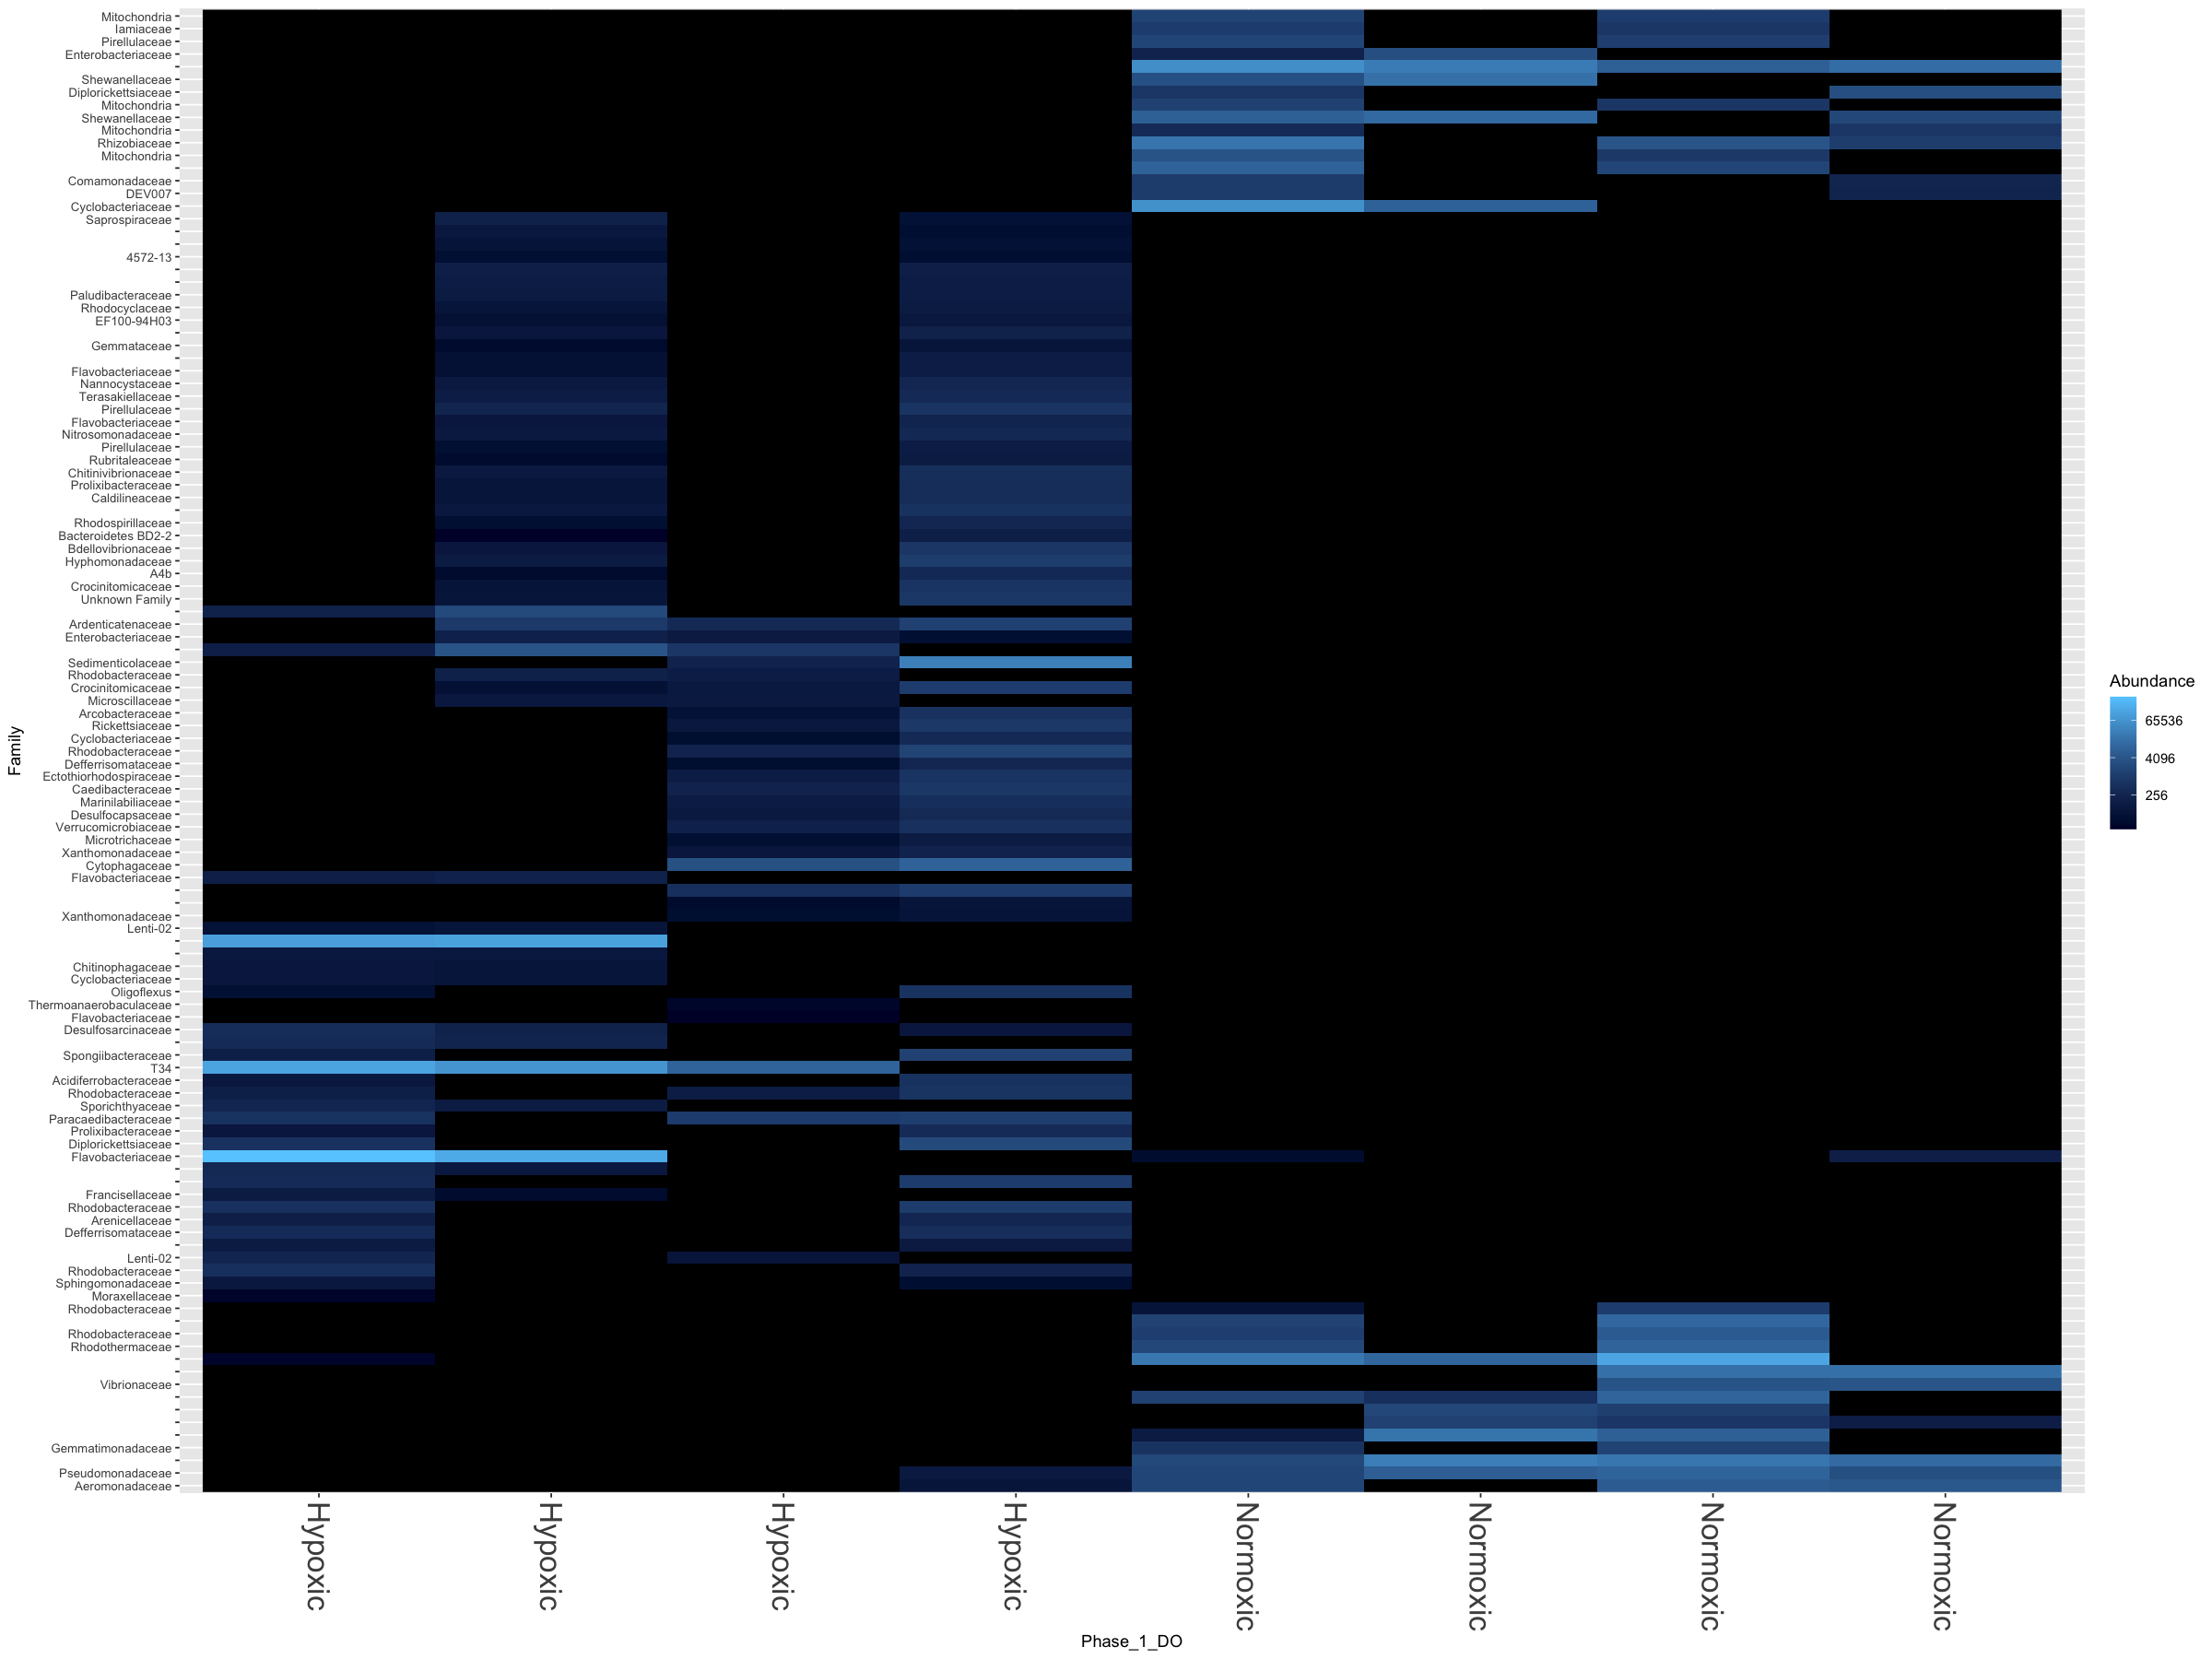

In [526]:
plot_heatmap(CE_sigpheno, "NMDS", "bray", "Phase_1_DO", "Family", sample.order = nameorder )+
theme(legend.position = "right", axis.text.y = element_text(size=8), axis.text.x = element_text(size=20))


# bacteria associated with growth

In [528]:
#convert to DEseq
CEdds = phyloseq_to_deseq2(CE, ~ Tissue.Shell.Growth)
#calculate arithmetic means because of zeros.
#arith_mean=function(row) if (all(row == 0)) 0 else exp(mean(log(row[row != 0])))
#arithmeans = apply(otu_table(CEdds), 1, arith_mean) 
#CEdds = estimateSizeFactors(CEdds, geoMeans=arithmeans, locfunc=shorth)
#run GLMs
CEdds = DESeq(CEdds, test="Wald", fitType="parametric")

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [529]:
res=results(CEdds)
siggrowth = as.data.frame(res[which(res$padj < 0.05), ])
siggrowth = cbind(as(siggrowth, "data.frame"), as(tax_table(CE)[rownames(siggrowth), ], "matrix"))


In [222]:
x = tapply(siggrowth$log2FoldChange, siggrowth$Phylum, function(x) max(x))
x = sort(x, TRUE)
siggrowth$Phylum = factor(as.character(siggrowth$Phylum), levels= names(x))

#Class = Variable 2
x = tapply(siggrowth$log2FoldChange, siggrowth$Genus, function(x) max(x))
x = sort(x, TRUE)
siggrowth$Genus = factor(as.character(siggrowth$Genus), levels= names(x))


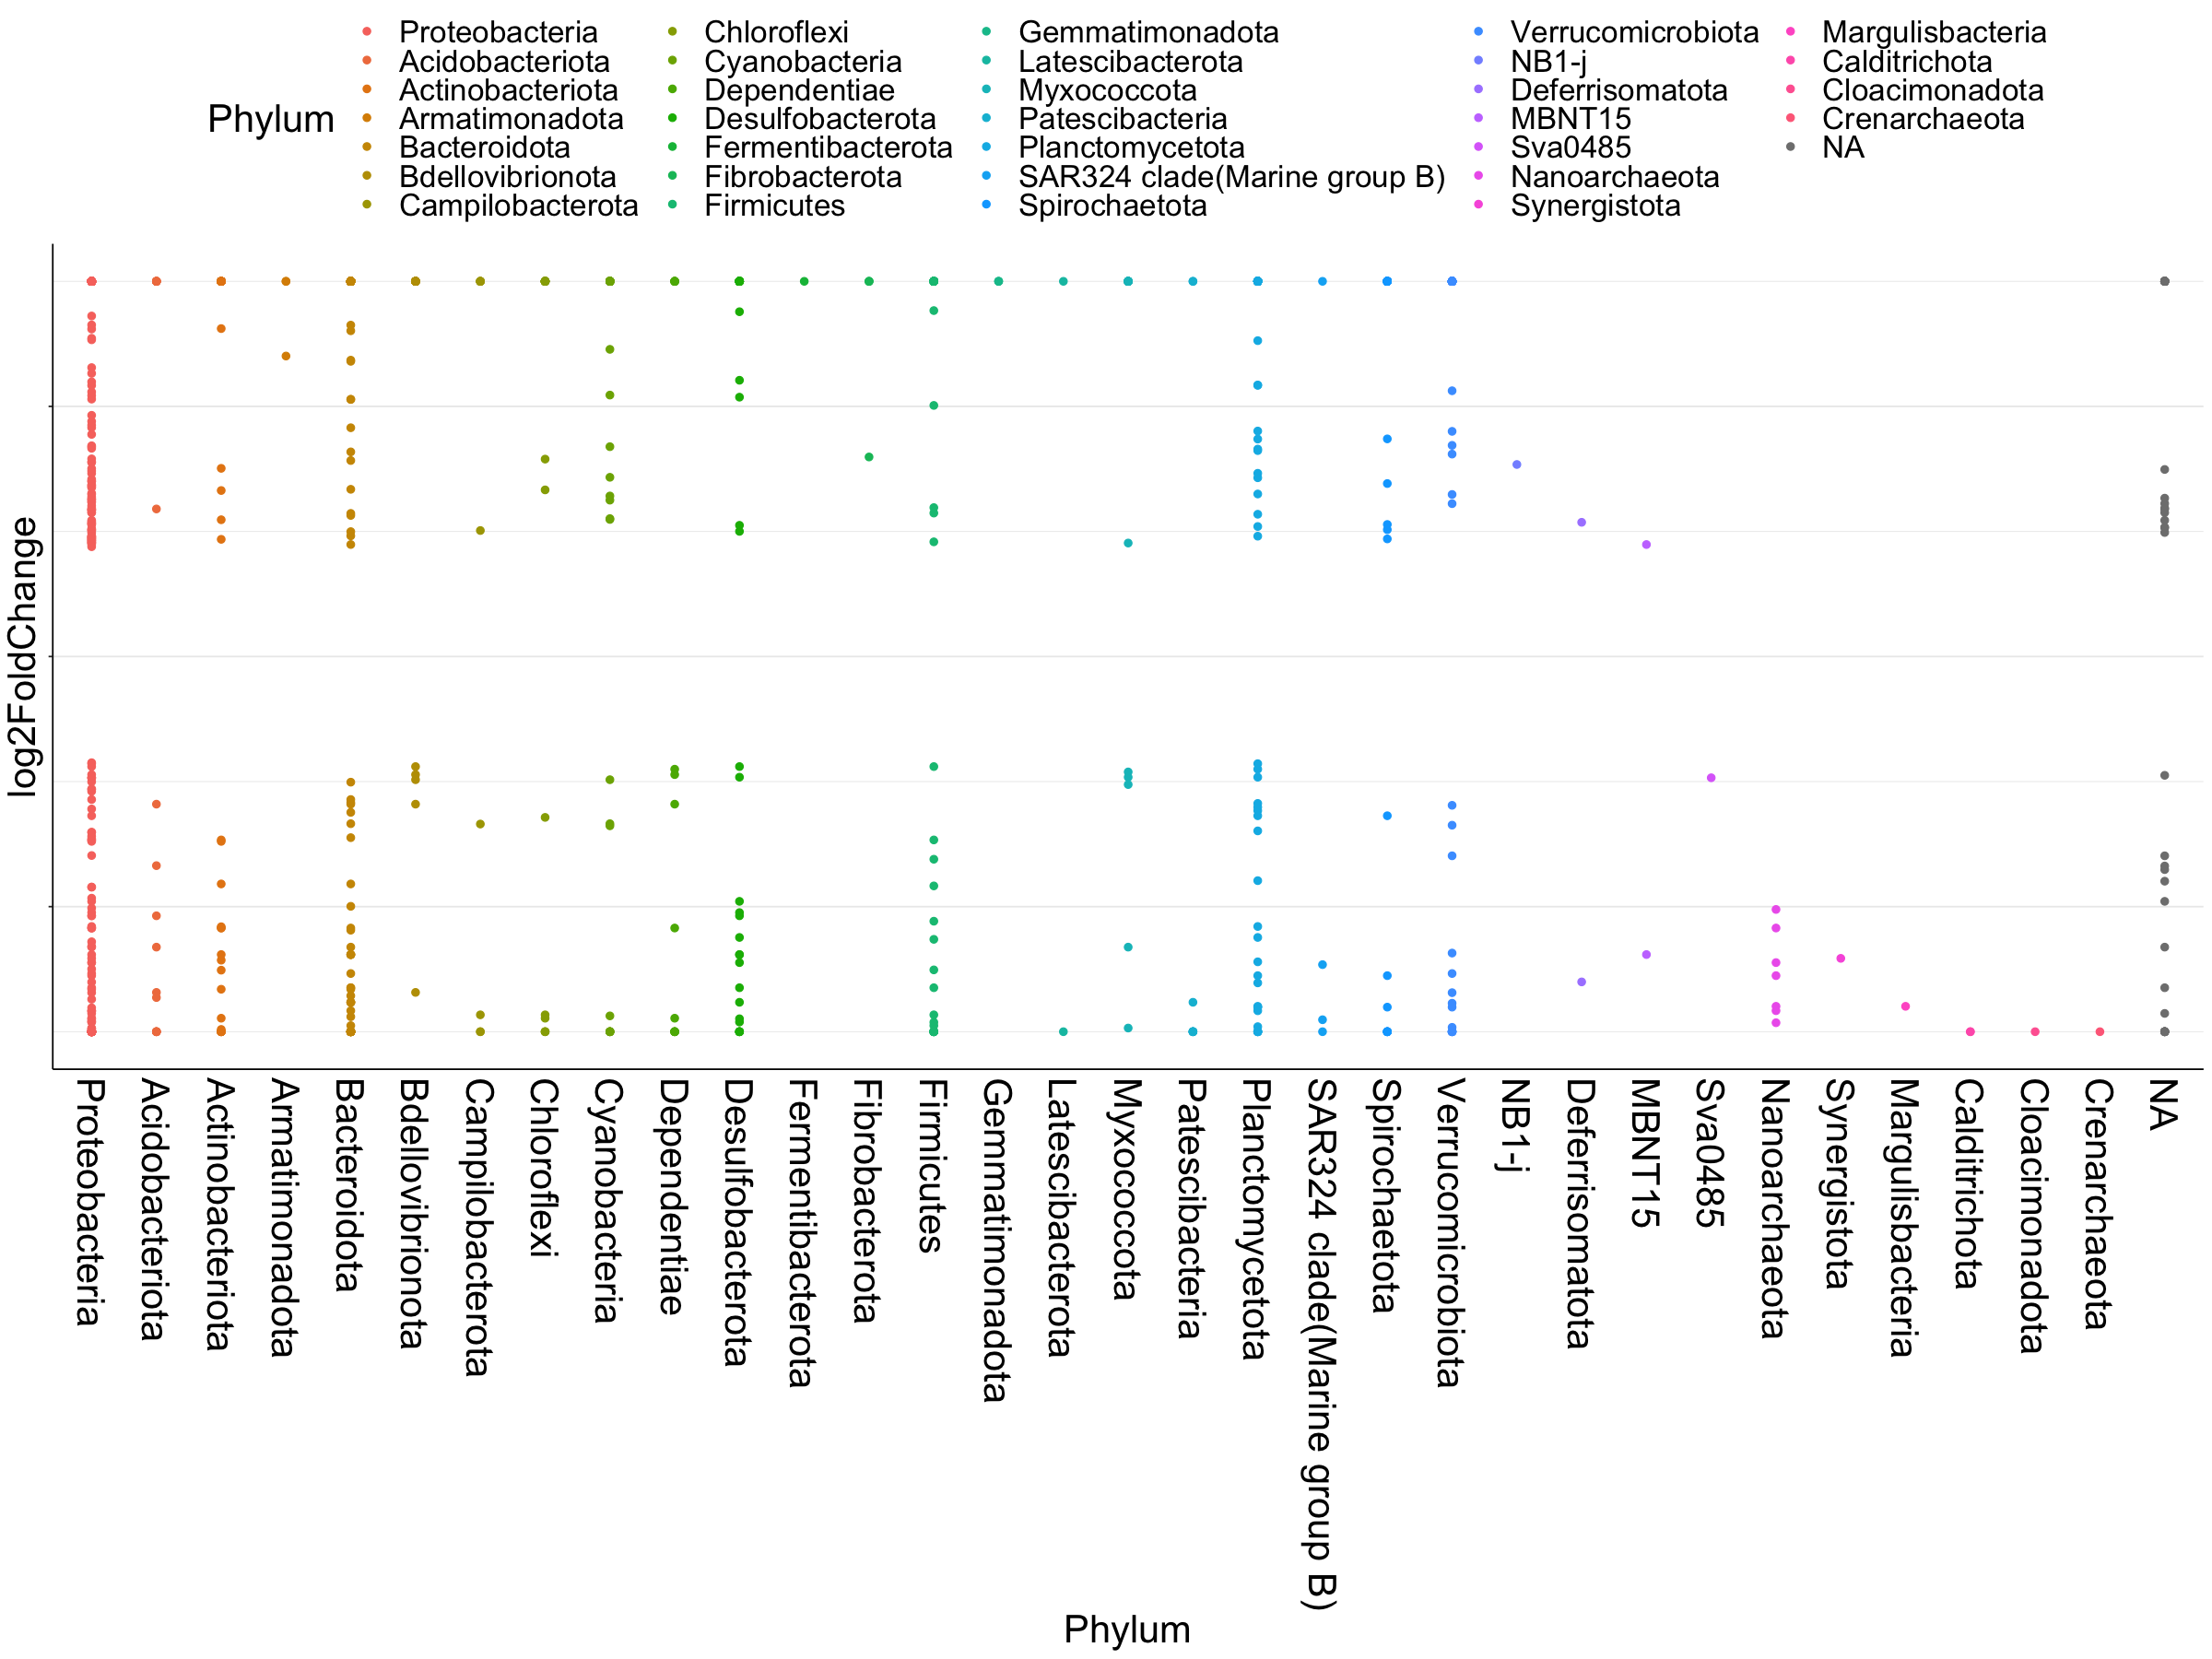

In [231]:
ggplot(siggrowth, aes(x=Phylum, y=log2FoldChange, color=Phylum))+
  geom_point(size=2)+ 
theme_bw()+
theme(legend.position="top",legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_blank(),
          text = element_text(size=25), axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
